In [1]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Pre procesing

In [2]:
df=pd.read_csv('nba_games.csv')
df88=pd.read_csv('nba_games2.csv')

df

Unnamed: 0     mp   mp.1    fg    fga    fg%    3p   3pa    3p%    ft  \
0               0  240.0  240.0  39.0   81.0  0.481   6.0  20.0  0.300  14.0   
1               1  240.0  240.0  36.0  100.0  0.360   7.0  31.0  0.226  16.0   
2               2  240.0  240.0  37.0   85.0  0.435   8.0  19.0  0.421  17.0   
3               3  240.0  240.0  41.0   89.0  0.461   8.0  21.0  0.381  17.0   
4               4  240.0  240.0  27.0   86.0  0.314   6.0  26.0  0.231  15.0   
...           ...    ...    ...   ...    ...    ...   ...   ...    ...   ...   
17767       17767  240.0  240.0  35.0   81.0  0.432  11.0  26.0  0.423  27.0   
17768       17768  240.0  240.0  37.0   74.0  0.500  13.0  25.0  0.520  26.0   
17769       17769  240.0  240.0  42.0   89.0  0.472  14.0  33.0  0.424  10.0   
17770       17770  240.0  240.0  41.0   85.0  0.482   9.0  26.0  0.346  26.0   
17771       17771  240.0  240.0  33.0   85.0  0.388  12.0  44.0  0.273  28.0   

       ...  tov%_max_opp  usg%_max_opp  ortg_max_opp  drtg_max_opp  team_opp  \
0      ...          22.8          29.0         178.0         111.0       DAL   
1      ...          50.0          32.6         152.0         111.0       ATL   
2      ...          20.0          30.9         148.0         116.0       SAS   
3      ...          28.6          30.9         138.0         118.0       MIN   
4      ...          16.8          30.9         157.0          90.0       MEM   
...    ...           ...           ...           ...           ...       ...   
17767  ...          34.2          33.7         160.0         118.0       OKC   
17768  ...          25.0          30.0         139.0         129.0       ORL   
17769  ...          25.6          29.9         175.0         126.0       LAC   
17770  ...          27.7          27.1         150.0         126.0       MIA   
17771  ...          51.5          36.2         141.0         114.0       BOS   

       total_opp  home_opp  season        date    won  
0             95         1    2016  2015-12-09   True  
1             98         0    2016  2015-12-09  False  
2            107         1    2018  2017-10-18  False  
3             99         0    2018  2017-10-18   True  
4             92         1    2021  2021-04-30  False  
...          ...       ...     ...         ...    ...  
17767         92         0    2019  2018-10-19   True  
17768        108         1    2017  2016-12-14   True  
17769        113         0    2017  2016-12-14  False  
17770        106         1    2020  2020-09-19   True  
17771        117         0    2020  2020-09-19  False  

[17772 rows x 151 columns]

In [3]:
df88

Unnamed: 0     mp   mp.1    fg    fga    fg%    3p   3pa    3p%    ft  \
0              0  240.0  240.0  38.0   72.0  0.528  16.0  37.0  0.432  18.0   
1              1  240.0  240.0  40.0   84.0  0.476  14.0  39.0  0.359  13.0   
2              2  240.0  240.0  41.0   78.0  0.526   8.0  24.0  0.333  15.0   
3              3  240.0  240.0  29.0   74.0  0.392  13.0  38.0  0.342  19.0   
4              4  240.0  240.0  37.0   87.0  0.425   7.0  33.0  0.212  32.0   
...          ...    ...    ...   ...    ...    ...   ...   ...    ...   ...   
5463        5463  265.0  265.0  46.0  106.0  0.434  14.0  50.0  0.280  13.0   
5464        5464  240.0  240.0  32.0   89.0  0.360   9.0  43.0  0.209  18.0   
5465        5465  240.0  240.0  39.0   93.0  0.419  14.0  46.0  0.304  23.0   
5466        5466  240.0  240.0  49.0   85.0  0.576  12.0  27.0  0.444  16.0   
5467        5467  240.0  240.0  47.0   89.0  0.528  14.0  31.0  0.452  19.0   

      ...  tov%_max_opp  usg%_max_opp  ortg_max_opp  drtg_max_opp  team_opp  \
0     ...          26.2          26.8         155.0         123.0       MIA   
1     ...          41.0          37.3         160.0         121.0       POR   
2     ...          28.6          41.1         250.0         125.0       DAL   
3     ...          12.6          33.0         183.0         110.0       CLE   
4     ...          20.0          32.3         226.0         117.0       TOR   
...   ...           ...           ...           ...           ...       ...   
5463  ...          30.6          29.5         181.0         112.0       GSW   
5464  ...          33.7          37.2         158.0         101.0       GSW   
5465  ...          42.9          28.1         136.0         124.0       LAC   
5466  ...          66.7          36.6         198.0         135.0       SAC   
5467  ...          41.0          45.3         162.0         135.0       DEN   

      total_opp  home_opp  season        date    won  
0           107         1    2023  2022-11-07   True  
1           110         0    2023  2022-11-07  False  
2            90         1    2023  2022-12-14   True  
3           105         0    2023  2022-12-14  False  
4           126         1    2023  2022-12-07  False  
...         ...       ...     ...         ...    ...  
5463        114         0    2023  2023-02-01   True  
5464        115         1    2023  2023-03-02  False  
5465         91         0    2023  2023-03-02   True  
5466        127         1    2023  2022-12-28  False  
5467        126         0    2023  2022-12-28   True  

[5468 rows x 151 columns]

In [4]:
df88.drop(df88[df88['season'] == 2022].index, inplace=True)
df88

Unnamed: 0     mp   mp.1    fg    fga    fg%    3p   3pa    3p%    ft  \
0              0  240.0  240.0  38.0   72.0  0.528  16.0  37.0  0.432  18.0   
1              1  240.0  240.0  40.0   84.0  0.476  14.0  39.0  0.359  13.0   
2              2  240.0  240.0  41.0   78.0  0.526   8.0  24.0  0.333  15.0   
3              3  240.0  240.0  29.0   74.0  0.392  13.0  38.0  0.342  19.0   
4              4  240.0  240.0  37.0   87.0  0.425   7.0  33.0  0.212  32.0   
...          ...    ...    ...   ...    ...    ...   ...   ...    ...   ...   
5463        5463  265.0  265.0  46.0  106.0  0.434  14.0  50.0  0.280  13.0   
5464        5464  240.0  240.0  32.0   89.0  0.360   9.0  43.0  0.209  18.0   
5465        5465  240.0  240.0  39.0   93.0  0.419  14.0  46.0  0.304  23.0   
5466        5466  240.0  240.0  49.0   85.0  0.576  12.0  27.0  0.444  16.0   
5467        5467  240.0  240.0  47.0   89.0  0.528  14.0  31.0  0.452  19.0   

      ...  tov%_max_opp  usg%_max_opp  ortg_max_opp  drtg_max_opp  team_opp  \
0     ...          26.2          26.8         155.0         123.0       MIA   
1     ...          41.0          37.3         160.0         121.0       POR   
2     ...          28.6          41.1         250.0         125.0       DAL   
3     ...          12.6          33.0         183.0         110.0       CLE   
4     ...          20.0          32.3         226.0         117.0       TOR   
...   ...           ...           ...           ...           ...       ...   
5463  ...          30.6          29.5         181.0         112.0       GSW   
5464  ...          33.7          37.2         158.0         101.0       GSW   
5465  ...          42.9          28.1         136.0         124.0       LAC   
5466  ...          66.7          36.6         198.0         135.0       SAC   
5467  ...          41.0          45.3         162.0         135.0       DEN   

      total_opp  home_opp  season        date    won  
0           107         1    2023  2022-11-07   True  
1           110         0    2023  2022-11-07  False  
2            90         1    2023  2022-12-14   True  
3           105         0    2023  2022-12-14  False  
4           126         1    2023  2022-12-07  False  
...         ...       ...     ...         ...    ...  
5463        114         0    2023  2023-02-01   True  
5464        115         1    2023  2023-03-02  False  
5465         91         0    2023  2023-03-02   True  
5466        127         1    2023  2022-12-28  False  
5467        126         0    2023  2022-12-28   True  

[2822 rows x 151 columns]

In [5]:
df = pd.concat([df, df88], ignore_index=True)


In [6]:
df['season'].max()

2024

In [7]:
df['season'].min()

2016

In [8]:
df.isnull().sum()

Unnamed: 0    0
mp            0
mp.1          0
fg            0
fga           0
             ..
total_opp     0
home_opp      0
season        0
date          0
won           0
Length: 151, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20594 entries, 0 to 20593
Columns: 151 entries, Unnamed: 0 to won
dtypes: bool(1), float64(140), int64(7), object(3)
memory usage: 23.6+ MB


In [10]:
pd.set_option('display.max_columns', None)
print(df)

       Unnamed: 0     mp   mp.1    fg    fga    fg%    3p   3pa    3p%    ft  \
0               0  240.0  240.0  39.0   81.0  0.481   6.0  20.0  0.300  14.0   
1               1  240.0  240.0  36.0  100.0  0.360   7.0  31.0  0.226  16.0   
2               2  240.0  240.0  37.0   85.0  0.435   8.0  19.0  0.421  17.0   
3               3  240.0  240.0  41.0   89.0  0.461   8.0  21.0  0.381  17.0   
4               4  240.0  240.0  27.0   86.0  0.314   6.0  26.0  0.231  15.0   
...           ...    ...    ...   ...    ...    ...   ...   ...    ...   ...   
20589        5463  265.0  265.0  46.0  106.0  0.434  14.0  50.0  0.280  13.0   
20590        5464  240.0  240.0  32.0   89.0  0.360   9.0  43.0  0.209  18.0   
20591        5465  240.0  240.0  39.0   93.0  0.419  14.0  46.0  0.304  23.0   
20592        5466  240.0  240.0  49.0   85.0  0.576  12.0  27.0  0.444  16.0   
20593        5467  240.0  240.0  47.0   89.0  0.528  14.0  31.0  0.452  19.0   

        fta    ft%   orb   drb   trb   

In [11]:
df.isnull()


Unnamed: 0     mp   mp.1     fg    fga    fg%     3p    3pa    3p%  \
0           False  False  False  False  False  False  False  False  False   
1           False  False  False  False  False  False  False  False  False   
2           False  False  False  False  False  False  False  False  False   
3           False  False  False  False  False  False  False  False  False   
4           False  False  False  False  False  False  False  False  False   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
20589       False  False  False  False  False  False  False  False  False   
20590       False  False  False  False  False  False  False  False  False   
20591       False  False  False  False  False  False  False  False  False   
20592       False  False  False  False  False  False  False  False  False   
20593       False  False  False  False  False  False  False  False  False   

          ft    fta    ft%    orb    drb    trb    ast    stl    blk    tov  \
0      False  False  False  False  False  False  False  False  False  False   
1      False  False  False  False  False  False  False  False  False  False   
2      False  False  False  False  False  False  False  False  False  False   
3      False  False  False  False  False  False  False  False  False  False   
4      False  False  False  False  False  False  False  False  False  False   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
20589  False  False  False  False  False  False  False  False  False  False   
20590  False  False  False  False  False  False  False  False  False  False   
20591  False  False  False  False  False  False  False  False  False  False   
20592  False  False  False  False  False  False  False  False  False  False   
20593  False  False  False  False  False  False  False  False  False  False   

          pf    pts   +/-    ts%   efg%   3par    ftr   orb%   drb%   trb%  \
0      False  False  True  False  False  False  False  False  False  False   
1      False  False  True  False  False  False  False  False  False  False   
2      False  False  True  False  False  False  False  False  False  False   
3      False  False  True  False  False  False  False  False  False  False   
4      False  False  True  False  False  False  False  False  False  False   
...      ...    ...   ...    ...    ...    ...    ...    ...    ...    ...   
20589  False  False  True  False  False  False  False  False  False  False   
20590  False  False  True  False  False  False  False  False  False  False   
20591  False  False  True  False  False  False  False  False  False  False   
20592  False  False  True  False  False  False  False  False  False  False   
20593  False  False  True  False  False  False  False  False  False  False   

        ast%   stl%   blk%   tov%   usg%   ortg   drtg  mp_max  mp_max.1  \
0      False  False  False  False  False  False  False    True      True   
1      False  False  False  False  False  False  False    True      True   
2      False  False  False  False  False  False  False    True      True   
3      False  False  False  False  False  False  False    True      True   
4      False  False  False  False  False  False  False    True      True   
...      ...    ...    ...    ...    ...    ...    ...     ...       ...   
20589  False  False  False  False  False  False  False    True      True   
20590  False  False  False  False  False  False  False    True      True   
20591  False  False  False  False  False  False  False    True      True   
20592  False  False  False  False  False  False  False    True      True   
20593  False  False  False  False  False  False  False    True      True   

       fg_max  fga_max  fg%_max  3p_max  3pa_max  3p%_max  ft_max  fta_max  \
0       False    False    False   False    False    False   False    False   
1       False    False    False   False    False    False   False    False   
2       False    False    False   False    False 

In [12]:
df.sort_values('date')

Unnamed: 0     mp   mp.1    fg   fga    fg%    3p   3pa    3p%    ft  \
16905       16905  240.0  240.0  37.0  87.0  0.425   7.0  19.0  0.368  16.0   
16087       16087  240.0  240.0  41.0  96.0  0.427   9.0  30.0  0.300  20.0   
16086       16086  240.0  240.0  35.0  83.0  0.422   6.0  18.0  0.333  19.0   
1224         1224  240.0  240.0  37.0  96.0  0.385  12.0  29.0  0.414  20.0   
16904       16904  240.0  240.0  38.0  94.0  0.404   9.0  29.0  0.310  10.0   
...           ...    ...    ...   ...   ...    ...   ...   ...    ...   ...   
18065         605  240.0  240.0  37.0  95.0  0.389  14.0  45.0  0.311  12.0   
19116        2700  240.0  240.0  49.0  99.0  0.495   8.0  30.0  0.267  12.0   
19117        2701  240.0  240.0  43.0  91.0  0.473  14.0  42.0  0.333  24.0   
18850        2148  265.0  265.0  44.0  97.0  0.454  19.0  48.0  0.396  16.0   
19402        3206  240.0  240.0  43.0  86.0  0.500   8.0  21.0  0.381  26.0   

        fta    ft%   orb   drb   trb   ast   stl   blk   tov    pf    pts  \
16905  23.0  0.696   7.0  40.0  47.0  13.0   6.0  10.0  13.0  22.0   97.0   
16087  22.0  0.909  21.0  35.0  56.0  29.0   8.0   7.0  20.0  29.0  111.0   
16086  27.0  0.704   8.0  25.0  33.0  21.0   9.0   3.0  18.0  26.0   95.0   
1224   26.0  0.769  23.0  36.0  59.0  23.0   5.0   3.0  15.0  15.0  106.0   
16904  17.0  0.588  11.0  39.0  50.0  26.0   5.0   7.0  10.0  21.0   95.0   
...     ...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   
18065  15.0  0.800  16.0  31.0  47.0  23.0  11.0   5.0  14.0  21.0  100.0   
19116  21.0  0.571  10.0  33.0  43.0  30.0   5.0   2.0   8.0  25.0  118.0   
19117  32.0  0.750   9.0  38.0  47.0  31.0   3.0   6.0  10.0  19.0  124.0   
18850  26.0  0.615  13.0  35.0  48.0  29.0  11.0   7.0  14.0  15.0  123.0   
19402  29.0  0.897  14.0  29.0  43.0  29.0   8.0  10.0  18.0  13.0  120.0   

       +/-    ts%   efg%   3par    ftr  orb%  drb%  trb%  ast%  stl%  blk%  \
16905  NaN  0.499  0.466  0.218  0.264  15.2  78.4  48.5  35.1   6.0  15.4   
16087  NaN  0.525  0.474  0.313  0.229  45.7  81.4  62.9  70.7   8.0  10.8   
16086  NaN  0.501  0.458  0.217  0.325  18.6  54.3  37.1  60.0   9.0   4.5   
1224   NaN  0.493  0.448  0.302  0.271  41.1  83.7  59.6  62.2   5.2   5.5   
16904  NaN  0.468  0.452  0.309  0.181  21.6  84.8  51.5  68.4   5.0  10.3   
...    ...    ...    ...    ...    ...   ...   ...   ...   ...   ...   ...   
18065  NaN  0.492  0.463  0.474  0.158  29.1  75.6  49.0  62.2  11.2   8.8   
19116  NaN  0.545  0.535  0.303  0.212  20.8  78.6  47.8  61.2   4.8   4.1   
19117  NaN  0.590  0.549  0.462  0.352  21.4  79.2  52.2  72.1   2.9   8.7   
18850  NaN  0.567  0.552  0.495  0.268  26.0  79.5  51.1  65.9  10.3  10.8   
19402  NaN  0.608  0.547  0.244  0.337  37.8  74.4  56.6  67.4   8.2  15.6   

       tov%   usg%   ortg   drtg  mp_max  mp_max.1  fg_max  fga_max  fg%_max  \
16905  11.8  100.0   97.5   95.5     NaN       NaN     8.0     22.0    0.750   
16087  15.9  100.0  110.9   94.9     NaN       NaN    14.0     26.0    1.000   
16086  15.9  100.0   94.9  110.9     NaN       NaN     7.0     20.0    1.000   
1224   12.3  100.0  111.2   98.6     NaN       NaN     7.0     19.0    0.600   
16904   9.0  100.0   95.5   97.5     NaN       NaN    12.0     22.0    0.571   
...     ...    ...    ...    ...     ...       ...     ...      ...      ...   
18065  12.1  100.0  102.2  114.5     NaN       NaN    10.0     22.0    0.667   
19116   6.9  100.0  114.0  119.8     NaN       NaN    11.0     23.0    1.000   
19117   8.7  100.0  119.8  114.0     NaN       NaN     8.0     19.0    1.000   
18850  11.4  100.0  114.9  108.3     NaN       NaN    10.0     20.0    0.800   
19402  15.4  100.0  123.3  108.9     NaN       NaN    14.0     27.0    1.000   

       3p_max  3pa_max  3p%_max  ft_max  fta_max  ft%_max  orb_max  drb_max  \
16905     3.0      5.0    0.750     5.0      5.0      1.0      2.0      8.0   
16087     5.0     12.0    1.000     7.0      7.0      1.0      5.0      5.0  

In [13]:
df=df.reset_index(drop=True)
df

Unnamed: 0     mp   mp.1    fg    fga    fg%    3p   3pa    3p%    ft  \
0               0  240.0  240.0  39.0   81.0  0.481   6.0  20.0  0.300  14.0   
1               1  240.0  240.0  36.0  100.0  0.360   7.0  31.0  0.226  16.0   
2               2  240.0  240.0  37.0   85.0  0.435   8.0  19.0  0.421  17.0   
3               3  240.0  240.0  41.0   89.0  0.461   8.0  21.0  0.381  17.0   
4               4  240.0  240.0  27.0   86.0  0.314   6.0  26.0  0.231  15.0   
...           ...    ...    ...   ...    ...    ...   ...   ...    ...   ...   
20589        5463  265.0  265.0  46.0  106.0  0.434  14.0  50.0  0.280  13.0   
20590        5464  240.0  240.0  32.0   89.0  0.360   9.0  43.0  0.209  18.0   
20591        5465  240.0  240.0  39.0   93.0  0.419  14.0  46.0  0.304  23.0   
20592        5466  240.0  240.0  49.0   85.0  0.576  12.0  27.0  0.444  16.0   
20593        5467  240.0  240.0  47.0   89.0  0.528  14.0  31.0  0.452  19.0   

        fta    ft%   orb   drb   trb   ast   stl   blk   tov    pf    pts  \
0      18.0  0.778   6.0  41.0  47.0  26.0   7.0   7.0  14.0  19.0   98.0   
1      19.0  0.842  20.0  31.0  51.0  18.0   7.0   3.0   9.0  15.0   95.0   
2      23.0  0.739  11.0  31.0  42.0  23.0   7.0   4.0  13.0  16.0   99.0   
3      19.0  0.895  12.0  38.0  50.0  22.0   8.0  11.0  11.0  18.0  107.0   
4      20.0  0.750  12.0  44.0  56.0  16.0   4.0   6.0  20.0  19.0   75.0   
...     ...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   
20589  24.0  0.542  10.0  43.0  53.0  26.0   5.0   7.0  11.0  23.0  119.0   
20590  21.0  0.857   9.0  38.0  47.0  19.0   5.0   5.0  16.0  24.0   91.0   
20591  27.0  0.852  15.0  45.0  60.0  25.0   9.0   6.0  11.0  20.0  115.0   
20592  18.0  0.889   7.0  27.0  34.0  31.0   6.0   8.0  16.0  24.0  126.0   
20593  25.0  0.760  11.0  23.0  34.0  32.0  10.0   6.0  12.0  17.0  127.0   

       +/-    ts%   efg%   3par    ftr  orb%  drb%  trb%  ast%  stl%  blk%  \
0      NaN  0.551  0.519  0.247  0.222  16.2  67.2  48.0  66.7   7.4  10.1   
1      NaN  0.438  0.395  0.310  0.190  32.8  83.8  52.0  50.0   7.4   4.9   
2      NaN  0.520  0.482  0.224  0.271  22.4  72.1  45.7  62.2   7.4   5.9   
3      NaN  0.550  0.506  0.236  0.213  27.9  77.6  54.3  53.7   8.5  16.7   
4      NaN  0.396  0.349  0.302  0.233  22.2  74.6  49.6  59.3   4.1  10.0   
...    ...    ...    ...    ...    ...   ...   ...   ...   ...   ...   ...   
20589  NaN  0.510  0.500  0.472  0.226  16.9  82.7  47.7  56.5   4.4  12.5   
20590  NaN  0.463  0.410  0.483  0.236  16.7  71.7  43.9  59.4   5.0  10.6   
20591  NaN  0.548  0.495  0.495  0.290  28.3  83.3  56.1  64.1   8.9  13.0   
20592  NaN  0.678  0.647  0.318  0.212  23.3  71.1  50.0  63.3   6.1  13.8   
20593  NaN  0.635  0.607  0.348  0.281  28.9  76.7  50.0  68.1  10.1  10.3   

       tov%   usg%   ortg   drtg  mp_max  mp_max.1  fg_max  fga_max  fg%_max  \
0      13.6  100.0  103.7  100.5     NaN       NaN     7.0     13.0    0.667   
1       7.7  100.0  100.5  103.7     NaN       NaN     8.0     20.0    1.000   
2      12.0  100.0  104.8  113.3     NaN       NaN     9.0     15.0    0.643   
3      10.2  100.0  113.3  104.8     NaN       NaN     9.0     21.0    0.875   
4      17.4  100.0   76.7   94.0     NaN       NaN     7.0     14.0    0.667   
...     ...    ...    ...    ...     ...       ...     ...      ...      ...   
20589   8.6  100.0  104.6  100.2     NaN       NaN    11.0     26.0    0.667   
20590  14.0  100.0   90.2  114.0     NaN       NaN     8.0     16.0    0.667   
20591   9.5  100.0  114.0   90.2     NaN       NaN     9.0     20.0    0.714   
20592  14.7  100.0  127.8  128.8     NaN       NaN    15.0     24.0    0.800   
20593  10.7  100.0  128.8  127.8     NaN       NaN    12.0     21.0    1.000   

       3p_max  3pa_max  3p%_max  ft_max  fta_max  ft%_max  orb_max  drb_max  \
0         2.0      6.0    1.000     6.0      9.0      1.0      2.0      9.0   
1         2.0      8.0    0.500     6.0      7.0      1.0      7.

In [14]:
del df['mp.1']
del df['mp_opp.1']
del df['Unnamed: 0']
del df['index_opp'] 

In [15]:
df['won'].value_counts()

True     10297
False    10297
Name: won, dtype: int64

In [16]:
nulls= pd.isnull(df)
nulls= nulls.sum()
nulls=nulls[nulls>0]
nulls

+/-             20594
mp_max          20594
mp_max.1        20594
+/-_max            15
+/-_opp         20594
mp_max_opp      20594
mp_max_opp.1    20594
+/-_max_opp        15
dtype: int64

In [17]:
df.dropna(subset=['+/-_max'], inplace=True)
df.dropna(subset=['+/-_max_opp'], inplace=True)


In [18]:
nulls= pd.isnull(df)
nulls= nulls.sum()
nulls=nulls[nulls>0]
nulls

+/-             20578
mp_max          20578
mp_max.1        20578
+/-_opp         20578
mp_max_opp      20578
mp_max_opp.1    20578
dtype: int64

In [19]:
valid= df.columns[~df.columns.isin(nulls.index)]
valid

Index(['mp', 'fg', 'fga', 'fg%', '3p', '3pa', '3p%', 'ft', 'fta', 'ft%',
       ...
       'tov%_max_opp', 'usg%_max_opp', 'ortg_max_opp', 'drtg_max_opp',
       'team_opp', 'total_opp', 'home_opp', 'season', 'date', 'won'],
      dtype='object', length=141)

In [20]:
df=df[valid].copy()
df

mp    fg    fga    fg%    3p   3pa    3p%    ft   fta    ft%   orb  \
0      240.0  39.0   81.0  0.481   6.0  20.0  0.300  14.0  18.0  0.778   6.0   
1      240.0  36.0  100.0  0.360   7.0  31.0  0.226  16.0  19.0  0.842  20.0   
2      240.0  37.0   85.0  0.435   8.0  19.0  0.421  17.0  23.0  0.739  11.0   
3      240.0  41.0   89.0  0.461   8.0  21.0  0.381  17.0  19.0  0.895  12.0   
4      240.0  27.0   86.0  0.314   6.0  26.0  0.231  15.0  20.0  0.750  12.0   
...      ...   ...    ...    ...   ...   ...    ...   ...   ...    ...   ...   
20589  265.0  46.0  106.0  0.434  14.0  50.0  0.280  13.0  24.0  0.542  10.0   
20590  240.0  32.0   89.0  0.360   9.0  43.0  0.209  18.0  21.0  0.857   9.0   
20591  240.0  39.0   93.0  0.419  14.0  46.0  0.304  23.0  27.0  0.852  15.0   
20592  240.0  49.0   85.0  0.576  12.0  27.0  0.444  16.0  18.0  0.889   7.0   
20593  240.0  47.0   89.0  0.528  14.0  31.0  0.452  19.0  25.0  0.760  11.0   

        drb   trb   ast   stl   blk   tov    pf    pts    ts%   efg%   3par  \
0      41.0  47.0  26.0   7.0   7.0  14.0  19.0   98.0  0.551  0.519  0.247   
1      31.0  51.0  18.0   7.0   3.0   9.0  15.0   95.0  0.438  0.395  0.310   
2      31.0  42.0  23.0   7.0   4.0  13.0  16.0   99.0  0.520  0.482  0.224   
3      38.0  50.0  22.0   8.0  11.0  11.0  18.0  107.0  0.550  0.506  0.236   
4      44.0  56.0  16.0   4.0   6.0  20.0  19.0   75.0  0.396  0.349  0.302   
...     ...   ...   ...   ...   ...   ...   ...    ...    ...    ...    ...   
20589  43.0  53.0  26.0   5.0   7.0  11.0  23.0  119.0  0.510  0.500  0.472   
20590  38.0  47.0  19.0   5.0   5.0  16.0  24.0   91.0  0.463  0.410  0.483   
20591  45.0  60.0  25.0   9.0   6.0  11.0  20.0  115.0  0.548  0.495  0.495   
20592  27.0  34.0  31.0   6.0   8.0  16.0  24.0  126.0  0.678  0.647  0.318   
20593  23.0  34.0  32.0  10.0   6.0  12.0  17.0  127.0  0.635  0.607  0.348   

         ftr  orb%  drb%  trb%  ast%  stl%  blk%  tov%   usg%   ortg   drtg  \
0      0.222  16.2  67.2  48.0  66.7   7.4  10.1  13.6  100.0  103.7  100.5   
1      0.190  32.8  83.8  52.0  50.0   7.4   4.9   7.7  100.0  100.5  103.7   
2      0.271  22.4  72.1  45.7  62.2   7.4   5.9  12.0  100.0  104.8  113.3   
3      0.213  27.9  77.6  54.3  53.7   8.5  16.7  10.2  100.0  113.3  104.8   
4      0.233  22.2  74.6  49.6  59.3   4.1  10.0  17.4  100.0   76.7   94.0   
...      ...   ...   ...   ...   ...   ...   ...   ...    ...    ...    ...   
20589  0.226  16.9  82.7  47.7  56.5   4.4  12.5   8.6  100.0  104.6  100.2   
20590  0.236  16.7  71.7  43.9  59.4   5.0  10.6  14.0  100.0   90.2  114.0   
20591  0.290  28.3  83.3  56.1  64.1   8.9  13.0   9.5  100.0  114.0   90.2   
20592  0.212  23.3  71.1  50.0  63.3   6.1  13.8  14.7  100.0  127.8  128.8   
20593  0.281  28.9  76.7  50.0  68.1  10.1  10.3  10.7  100.0  128.8  127.8   

       fg_max  fga_max  fg%_max  3p_max  3pa_max  3p%_max  ft_max  fta_max  \
0         7.0     13.0    0.667     2.0      6.0    1.000     6.0      9.0   
1         8.0     20.0    1.000     2.0      8.0    0.500     6.0      7.0   
2         9.0     15.0    0.643     4.0      6.0    0.667     4.0      9.0   
3         9.0     21.0    0.875     3.0      7.0    1.000     6.0      7.0   
4         7.0     14.0    0.667     2.0      5.0    0.667     5.0      6.0   
...       ...      ...      ...     ...      ...      ...     ...      ...   
20589    11.0     26.0    0.667     7.0     17.0    0.667     5.0      6.0   
20590     8.0     16.0    0.667     2.0     10.0    1.000     6.0      6.0   
20591     9.0     20.0    0.714     5.0     12.0    0.750    11.0     12.0   
20592    15.0     24.0    0.800     4.0      8.0    1.000    10.0     10.0   
20593    12.0     21.0    1.000     4.0      8.0    1.000     5.0      8.0   

       ft%_max  orb_max  drb_max  trb_max  ast_max  stl_max  blk_max  tov_max  \
0          1.0      2.0      9.0     11.0      6.0      3.0      2.0      4.0   
1          1.0      7.0     10.0     17.0      6.0  

In [21]:
df['mov'] = df['total'] - df['total_opp']
df

mp    fg    fga    fg%    3p   3pa    3p%    ft   fta    ft%   orb  \
0      240.0  39.0   81.0  0.481   6.0  20.0  0.300  14.0  18.0  0.778   6.0   
1      240.0  36.0  100.0  0.360   7.0  31.0  0.226  16.0  19.0  0.842  20.0   
2      240.0  37.0   85.0  0.435   8.0  19.0  0.421  17.0  23.0  0.739  11.0   
3      240.0  41.0   89.0  0.461   8.0  21.0  0.381  17.0  19.0  0.895  12.0   
4      240.0  27.0   86.0  0.314   6.0  26.0  0.231  15.0  20.0  0.750  12.0   
...      ...   ...    ...    ...   ...   ...    ...   ...   ...    ...   ...   
20589  265.0  46.0  106.0  0.434  14.0  50.0  0.280  13.0  24.0  0.542  10.0   
20590  240.0  32.0   89.0  0.360   9.0  43.0  0.209  18.0  21.0  0.857   9.0   
20591  240.0  39.0   93.0  0.419  14.0  46.0  0.304  23.0  27.0  0.852  15.0   
20592  240.0  49.0   85.0  0.576  12.0  27.0  0.444  16.0  18.0  0.889   7.0   
20593  240.0  47.0   89.0  0.528  14.0  31.0  0.452  19.0  25.0  0.760  11.0   

        drb   trb   ast   stl   blk   tov    pf    pts    ts%   efg%   3par  \
0      41.0  47.0  26.0   7.0   7.0  14.0  19.0   98.0  0.551  0.519  0.247   
1      31.0  51.0  18.0   7.0   3.0   9.0  15.0   95.0  0.438  0.395  0.310   
2      31.0  42.0  23.0   7.0   4.0  13.0  16.0   99.0  0.520  0.482  0.224   
3      38.0  50.0  22.0   8.0  11.0  11.0  18.0  107.0  0.550  0.506  0.236   
4      44.0  56.0  16.0   4.0   6.0  20.0  19.0   75.0  0.396  0.349  0.302   
...     ...   ...   ...   ...   ...   ...   ...    ...    ...    ...    ...   
20589  43.0  53.0  26.0   5.0   7.0  11.0  23.0  119.0  0.510  0.500  0.472   
20590  38.0  47.0  19.0   5.0   5.0  16.0  24.0   91.0  0.463  0.410  0.483   
20591  45.0  60.0  25.0   9.0   6.0  11.0  20.0  115.0  0.548  0.495  0.495   
20592  27.0  34.0  31.0   6.0   8.0  16.0  24.0  126.0  0.678  0.647  0.318   
20593  23.0  34.0  32.0  10.0   6.0  12.0  17.0  127.0  0.635  0.607  0.348   

         ftr  orb%  drb%  trb%  ast%  stl%  blk%  tov%   usg%   ortg   drtg  \
0      0.222  16.2  67.2  48.0  66.7   7.4  10.1  13.6  100.0  103.7  100.5   
1      0.190  32.8  83.8  52.0  50.0   7.4   4.9   7.7  100.0  100.5  103.7   
2      0.271  22.4  72.1  45.7  62.2   7.4   5.9  12.0  100.0  104.8  113.3   
3      0.213  27.9  77.6  54.3  53.7   8.5  16.7  10.2  100.0  113.3  104.8   
4      0.233  22.2  74.6  49.6  59.3   4.1  10.0  17.4  100.0   76.7   94.0   
...      ...   ...   ...   ...   ...   ...   ...   ...    ...    ...    ...   
20589  0.226  16.9  82.7  47.7  56.5   4.4  12.5   8.6  100.0  104.6  100.2   
20590  0.236  16.7  71.7  43.9  59.4   5.0  10.6  14.0  100.0   90.2  114.0   
20591  0.290  28.3  83.3  56.1  64.1   8.9  13.0   9.5  100.0  114.0   90.2   
20592  0.212  23.3  71.1  50.0  63.3   6.1  13.8  14.7  100.0  127.8  128.8   
20593  0.281  28.9  76.7  50.0  68.1  10.1  10.3  10.7  100.0  128.8  127.8   

       fg_max  fga_max  fg%_max  3p_max  3pa_max  3p%_max  ft_max  fta_max  \
0         7.0     13.0    0.667     2.0      6.0    1.000     6.0      9.0   
1         8.0     20.0    1.000     2.0      8.0    0.500     6.0      7.0   
2         9.0     15.0    0.643     4.0      6.0    0.667     4.0      9.0   
3         9.0     21.0    0.875     3.0      7.0    1.000     6.0      7.0   
4         7.0     14.0    0.667     2.0      5.0    0.667     5.0      6.0   
...       ...      ...      ...     ...      ...      ...     ...      ...   
20589    11.0     26.0    0.667     7.0     17.0    0.667     5.0      6.0   
20590     8.0     16.0    0.667     2.0     10.0    1.000     6.0      6.0   
20591     9.0     20.0    0.714     5.0     12.0    0.750    11.0     12.0   
20592    15.0     24.0    0.800     4.0      8.0    1.000    10.0     10.0   
20593    12.0     21.0    1.000     4.0      8.0    1.000     5.0      8.0   

       ft%_max  orb_max  drb_max  trb_max  ast_max  stl_max  blk_max  tov_max  \
0          1.0      2.0      9.0     11.0      6.0      3.0      2.0      4.0   
1          1.0      7.0     10.0     17.0      6.0  

In [22]:
df['mov_next'] = df.groupby('team')['mov'].shift(-1)
df

mp    fg    fga    fg%    3p   3pa    3p%    ft   fta    ft%   orb  \
0      240.0  39.0   81.0  0.481   6.0  20.0  0.300  14.0  18.0  0.778   6.0   
1      240.0  36.0  100.0  0.360   7.0  31.0  0.226  16.0  19.0  0.842  20.0   
2      240.0  37.0   85.0  0.435   8.0  19.0  0.421  17.0  23.0  0.739  11.0   
3      240.0  41.0   89.0  0.461   8.0  21.0  0.381  17.0  19.0  0.895  12.0   
4      240.0  27.0   86.0  0.314   6.0  26.0  0.231  15.0  20.0  0.750  12.0   
...      ...   ...    ...    ...   ...   ...    ...   ...   ...    ...   ...   
20589  265.0  46.0  106.0  0.434  14.0  50.0  0.280  13.0  24.0  0.542  10.0   
20590  240.0  32.0   89.0  0.360   9.0  43.0  0.209  18.0  21.0  0.857   9.0   
20591  240.0  39.0   93.0  0.419  14.0  46.0  0.304  23.0  27.0  0.852  15.0   
20592  240.0  49.0   85.0  0.576  12.0  27.0  0.444  16.0  18.0  0.889   7.0   
20593  240.0  47.0   89.0  0.528  14.0  31.0  0.452  19.0  25.0  0.760  11.0   

        drb   trb   ast   stl   blk   tov    pf    pts    ts%   efg%   3par  \
0      41.0  47.0  26.0   7.0   7.0  14.0  19.0   98.0  0.551  0.519  0.247   
1      31.0  51.0  18.0   7.0   3.0   9.0  15.0   95.0  0.438  0.395  0.310   
2      31.0  42.0  23.0   7.0   4.0  13.0  16.0   99.0  0.520  0.482  0.224   
3      38.0  50.0  22.0   8.0  11.0  11.0  18.0  107.0  0.550  0.506  0.236   
4      44.0  56.0  16.0   4.0   6.0  20.0  19.0   75.0  0.396  0.349  0.302   
...     ...   ...   ...   ...   ...   ...   ...    ...    ...    ...    ...   
20589  43.0  53.0  26.0   5.0   7.0  11.0  23.0  119.0  0.510  0.500  0.472   
20590  38.0  47.0  19.0   5.0   5.0  16.0  24.0   91.0  0.463  0.410  0.483   
20591  45.0  60.0  25.0   9.0   6.0  11.0  20.0  115.0  0.548  0.495  0.495   
20592  27.0  34.0  31.0   6.0   8.0  16.0  24.0  126.0  0.678  0.647  0.318   
20593  23.0  34.0  32.0  10.0   6.0  12.0  17.0  127.0  0.635  0.607  0.348   

         ftr  orb%  drb%  trb%  ast%  stl%  blk%  tov%   usg%   ortg   drtg  \
0      0.222  16.2  67.2  48.0  66.7   7.4  10.1  13.6  100.0  103.7  100.5   
1      0.190  32.8  83.8  52.0  50.0   7.4   4.9   7.7  100.0  100.5  103.7   
2      0.271  22.4  72.1  45.7  62.2   7.4   5.9  12.0  100.0  104.8  113.3   
3      0.213  27.9  77.6  54.3  53.7   8.5  16.7  10.2  100.0  113.3  104.8   
4      0.233  22.2  74.6  49.6  59.3   4.1  10.0  17.4  100.0   76.7   94.0   
...      ...   ...   ...   ...   ...   ...   ...   ...    ...    ...    ...   
20589  0.226  16.9  82.7  47.7  56.5   4.4  12.5   8.6  100.0  104.6  100.2   
20590  0.236  16.7  71.7  43.9  59.4   5.0  10.6  14.0  100.0   90.2  114.0   
20591  0.290  28.3  83.3  56.1  64.1   8.9  13.0   9.5  100.0  114.0   90.2   
20592  0.212  23.3  71.1  50.0  63.3   6.1  13.8  14.7  100.0  127.8  128.8   
20593  0.281  28.9  76.7  50.0  68.1  10.1  10.3  10.7  100.0  128.8  127.8   

       fg_max  fga_max  fg%_max  3p_max  3pa_max  3p%_max  ft_max  fta_max  \
0         7.0     13.0    0.667     2.0      6.0    1.000     6.0      9.0   
1         8.0     20.0    1.000     2.0      8.0    0.500     6.0      7.0   
2         9.0     15.0    0.643     4.0      6.0    0.667     4.0      9.0   
3         9.0     21.0    0.875     3.0      7.0    1.000     6.0      7.0   
4         7.0     14.0    0.667     2.0      5.0    0.667     5.0      6.0   
...       ...      ...      ...     ...      ...      ...     ...      ...   
20589    11.0     26.0    0.667     7.0     17.0    0.667     5.0      6.0   
20590     8.0     16.0    0.667     2.0     10.0    1.000     6.0      6.0   
20591     9.0     20.0    0.714     5.0     12.0    0.750    11.0     12.0   
20592    15.0     24.0    0.800     4.0      8.0    1.000    10.0     10.0   
20593    12.0     21.0    1.000     4.0      8.0    1.000     5.0      8.0   

       ft%_max  orb_max  drb_max  trb_max  ast_max  stl_max  blk_max  tov_max  \
0          1.0      2.0      9.0     11.0      6.0      3.0      2.0      4.0   
1          1.0      7.0     10.0     17.0      6.0  

In [23]:
rows_with_nulls = df[df.isnull().any(axis=1)]
#this will be our test data
rows_with_nulls

mp    fg    fga    fg%    3p   3pa    3p%    ft   fta    ft%   orb  \
20507  240.0  41.0   84.0  0.488   9.0  36.0  0.250  18.0  24.0  0.750   7.0   
20511  240.0  36.0   86.0  0.419  16.0  40.0  0.400  19.0  25.0  0.760  14.0   
20516  240.0  40.0   79.0  0.506  13.0  32.0  0.406  19.0  25.0  0.760   8.0   
20529  240.0  50.0   88.0  0.568   7.0  22.0  0.318  13.0  16.0  0.813   8.0   
20537  240.0  44.0   83.0  0.530  10.0  37.0  0.270  22.0  36.0  0.611   6.0   
20542  240.0  48.0   86.0  0.558  10.0  28.0  0.357  17.0  19.0  0.895   7.0   
20543  240.0  41.0   89.0  0.461   7.0  31.0  0.226  16.0  20.0  0.800   6.0   
20545  240.0  38.0   88.0  0.432  10.0  31.0  0.323  22.0  27.0  0.815  11.0   
20559  240.0  39.0   90.0  0.433  13.0  35.0  0.371  11.0  14.0  0.786   7.0   
20561  240.0  41.0   82.0  0.500   9.0  24.0  0.375  17.0  23.0  0.739   7.0   
20563  240.0  37.0   91.0  0.407   9.0  36.0  0.250  25.0  29.0  0.862   1.0   
20565  240.0  44.0   97.0  0.454  11.0  34.0  0.324  16.0  22.0  0.727  15.0   
20566  240.0  44.0   90.0  0.489   6.0  21.0  0.286  20.0  28.0  0.714  13.0   
20567  240.0  41.0   97.0  0.423  14.0  45.0  0.311  13.0  21.0  0.619  14.0   
20571  240.0  43.0   94.0  0.457  11.0  34.0  0.324  18.0  27.0  0.667  12.0   
20573  265.0  43.0  108.0  0.398  13.0  41.0  0.317  22.0  30.0  0.733  18.0   
20576  240.0  40.0   86.0  0.465  18.0  43.0  0.419  17.0  21.0  0.810   8.0   
20578  240.0  41.0   91.0  0.451  14.0  42.0  0.333  18.0  23.0  0.783  12.0   
20579  240.0  45.0   93.0  0.484  10.0  27.0  0.370  22.0  26.0  0.846  15.0   
20581  240.0  46.0   89.0  0.517  18.0  35.0  0.514  16.0  24.0  0.667  12.0   
20582  240.0  36.0   86.0  0.419   7.0  35.0  0.200  23.0  27.0  0.852  13.0   
20583  240.0  43.0   93.0  0.462  11.0  37.0  0.297  18.0  25.0  0.720  18.0   
20584  240.0  38.0   85.0  0.447  15.0  39.0  0.385   8.0  12.0  0.667   8.0   
20585  240.0  45.0   84.0  0.536  16.0  33.0  0.485  15.0  17.0  0.882   8.0   
20586  240.0  34.0   77.0  0.442  10.0  29.0  0.345  21.0  27.0  0.778   7.0   
20589  265.0  46.0  106.0  0.434  14.0  50.0  0.280  13.0  24.0  0.542  10.0   
20590  240.0  32.0   89.0  0.360   9.0  43.0  0.209  18.0  21.0  0.857   9.0   
20591  240.0  39.0   93.0  0.419  14.0  46.0  0.304  23.0  27.0  0.852  15.0   
20592  240.0  49.0   85.0  0.576  12.0  27.0  0.444  16.0  18.0  0.889   7.0   
20593  240.0  47.0   89.0  0.528  14.0  31.0  0.452  19.0  25.0  0.760  11.0   

        drb   trb   ast   stl   blk   tov    pf    pts    ts%   efg%   3par  \
20507  38.0  45.0  25.0   3.0   4.0  10.0  19.0  109.0  0.576  0.542  0.429   
20511  38.0  52.0  27.0   6.0   7.0  19.0  21.0  107.0  0.552  0.512  0.465   
20516  32.0  40.0  20.0   5.0   2.0  12.0  19.0  112.0  0.622  0.589  0.405   
20529  29.0  37.0  33.0  12.0   4.0  13.0  17.0  120.0  0.631  0.608  0.250   
20537  37.0  43.0  32.0   5.0   8.0  10.0  23.0  120.0  0.607  0.590  0.446   
20542  41.0  48.0  26.0   5.0   7.0  16.0  18.0  123.0  0.652  0.616  0.326   
20543  26.0  32.0  16.0   8.0   6.0   8.0  18.0  105.0  0.537  0.500  0.348   
20545  37.0  48.0  20.0  10.0   2.0  15.0  22.0  108.0  0.541  0.489  0.352   
20559  33.0  40.0  21.0   6.0   8.0   9.0  18.0  102.0  0.530  0.506  0.389   
20561  37.0  44.0  26.0   7.0   4.0  14.0  16.0  108.0  0.586  0.555  0.293   
20563  27.0  28.0  23.0   5.0   2.0   8.0  20.0  108.0  0.520  0.456  0.396   
20565  27.0  42.0  22.0  10.0   7.0   8.0  19.0  115.0  0.539  0.510  0.351   
20566  38.0  51.0  24.0   8.0   6.0  15.0  15.0  114.0  0.557  0.522  0.233   
20567  37.0  51.0  28.0  11.0   5.0  12.0  21.0  109.0  0.513  0.495  0.464   
20571  30.0  42.0  25.0   7.0   7.0  12.0  24.0  115.0  0.543  0.516  0.362   
20573  45.0  63.0  21.0  10.0   5.0  17.0  19.0  121.0  0.499  0.458  0.380   
20576  26.0  34.0  25.0   5.0   6.0  11.0  20.0  115.0  0.604  0.570  0.500   
20578  24.0  36.0  26.0   5.0  11.0  11.0  27.0  114.0  0.564  0.527  0.462   
20579  35.0  50.0  24.0   4.

In [24]:
rows_with_nulls = rows_with_nulls.set_index('team')
rows_with_nulls

mp    fg    fga    fg%    3p   3pa    3p%    ft   fta    ft%   orb  \
team                                                                          
DAL   240.0  41.0   84.0  0.488   9.0  36.0  0.250  18.0  24.0  0.750   7.0   
SAS   240.0  36.0   86.0  0.419  16.0  40.0  0.400  19.0  25.0  0.760  14.0   
UTA   240.0  40.0   79.0  0.506  13.0  32.0  0.406  19.0  25.0  0.760   8.0   
PHO   240.0  50.0   88.0  0.568   7.0  22.0  0.318  13.0  16.0  0.813   8.0   
LAL   240.0  44.0   83.0  0.530  10.0  37.0  0.270  22.0  36.0  0.611   6.0   
ATL   240.0  48.0   86.0  0.558  10.0  28.0  0.357  17.0  19.0  0.895   7.0   
CHI   240.0  41.0   89.0  0.461   7.0  31.0  0.226  16.0  20.0  0.800   6.0   
CHO   240.0  38.0   88.0  0.432  10.0  31.0  0.323  22.0  27.0  0.815  11.0   
BRK   240.0  39.0   90.0  0.433  13.0  35.0  0.371  11.0  14.0  0.786   7.0   
OKC   240.0  41.0   82.0  0.500   9.0  24.0  0.375  17.0  23.0  0.739   7.0   
POR   240.0  37.0   91.0  0.407   9.0  36.0  0.250  25.0  29.0  0.862   1.0   
MEM   240.0  44.0   97.0  0.454  11.0  34.0  0.324  16.0  22.0  0.727  15.0   
HOU   240.0  44.0   90.0  0.489   6.0  21.0  0.286  20.0  28.0  0.714  13.0   
WAS   240.0  41.0   97.0  0.423  14.0  45.0  0.311  13.0  21.0  0.619  14.0   
DET   240.0  43.0   94.0  0.457  11.0  34.0  0.324  18.0  27.0  0.667  12.0   
BOS   265.0  43.0  108.0  0.398  13.0  41.0  0.317  22.0  30.0  0.733  18.0   
CLE   240.0  40.0   86.0  0.465  18.0  43.0  0.419  17.0  21.0  0.810   8.0   
TOR   240.0  41.0   91.0  0.451  14.0  42.0  0.333  18.0  23.0  0.783  12.0   
IND   240.0  45.0   93.0  0.484  10.0  27.0  0.370  22.0  26.0  0.846  15.0   
PHI   240.0  46.0   89.0  0.517  18.0  35.0  0.514  16.0  24.0  0.667  12.0   
ORL   240.0  36.0   86.0  0.419   7.0  35.0  0.200  23.0  27.0  0.852  13.0   
NYK   240.0  43.0   93.0  0.462  11.0  37.0  0.297  18.0  25.0  0.720  18.0   
MIL   240.0  38.0   85.0  0.447  15.0  39.0  0.385   8.0  12.0  0.667   8.0   
MIA   240.0  45.0   84.0  0.536  16.0  33.0  0.485  15.0  17.0  0.882   8.0   
NOP   240.0  34.0   77.0  0.442  10.0  29.0  0.345  21.0  27.0  0.778   7.0   
MIN   265.0  46.0  106.0  0.434  14.0  50.0  0.280  13.0  24.0  0.542  10.0   
LAC   240.0  32.0   89.0  0.360   9.0  43.0  0.209  18.0  21.0  0.857   9.0   
GSW   240.0  39.0   93.0  0.419  14.0  46.0  0.304  23.0  27.0  0.852  15.0   
DEN   240.0  49.0   85.0  0.576  12.0  27.0  0.444  16.0  18.0  0.889   7.0   
SAC   240.0  47.0   89.0  0.528  14.0  31.0  0.452  19.0  25.0  0.760  11.0   

       drb   trb   ast   stl   blk   tov    pf    pts    ts%   efg%   3par  \
team                                                                         
DAL   38.0  45.0  25.0   3.0   4.0  10.0  19.0  109.0  0.576  0.542  0.429   
SAS   38.0  52.0  27.0   6.0   7.0  19.0  21.0  107.0  0.552  0.512  0.465   
UTA   32.0  40.0  20.0   5.0   2.0  12.0  19.0  112.0  0.622  0.589  0.405   
PHO   29.0  37.0  33.0  12.0   4.0  13.0  17.0  120.0  0.631  0.608  0.250   
LAL   37.0  43.0  32.0   5.0   8.0  10.0  23.0  120.0  0.607  0.590  0.446   
ATL   41.0  48.0  26.0   5.0   7.0  16.0  18.0  123.0  0.652  0.616  0.326   
CHI   26.0  32.0  16.0   8.0   6.0   8.0  18.0  105.0  0.537  0.500  0.348   
CHO   37.0  48.0  20.0  10.0   2.0  15.0  22.0  108.0  0.541  0.489  0.352   
BRK   33.0  40.0  21.0   6.0   8.0   9.0  18.0  102.0  0.530  0.506  0.389   
OKC   37.0  44.0  26.0   7.0   4.0  14.0  16.0  108.0  0.586  0.555  0.293   
POR   27.0  28.0  23.0   5.0   2.0   8.0  20.0  108.0  0.520  0.456  0.396   
MEM   27.0  42.0  22.0  10.0   7.0   8.0  19.0  115.0  0.539  0.510  0.351   
HOU   38.0  51.0  24.0   8.0   6.0  15.0  15.0  114.0  0.557  0.522  0.233   
WAS   37.0  51.0  28.0  11.0   5.0  12.0  21.0  109.0  0.513  0.495  0.464   
DET   30.0  42.0  25.0   7.0   7.0  12.0  24.0  115.0  0.543  0.516  0.362   
BOS   45.0  63.0  21.0  10.0   5.0  17.0  19.0  121.0  0.499  0.458  0.380   
CLE   26.0  34.0  25.0   5.0   6.0  11.0  20.0  115.0  0.604  0.570  0.500  

In [25]:
df=df.dropna()

In [26]:
df.dtypes

mp          float64
fg          float64
fga         float64
fg%         float64
3p          float64
             ...   
season        int64
date         object
won            bool
mov           int64
mov_next    float64
Length: 143, dtype: object

In [27]:
df

mp    fg    fga    fg%    3p   3pa    3p%    ft   fta    ft%   orb  \
0      240.0  39.0   81.0  0.481   6.0  20.0  0.300  14.0  18.0  0.778   6.0   
1      240.0  36.0  100.0  0.360   7.0  31.0  0.226  16.0  19.0  0.842  20.0   
2      240.0  37.0   85.0  0.435   8.0  19.0  0.421  17.0  23.0  0.739  11.0   
3      240.0  41.0   89.0  0.461   8.0  21.0  0.381  17.0  19.0  0.895  12.0   
4      240.0  27.0   86.0  0.314   6.0  26.0  0.231  15.0  20.0  0.750  12.0   
...      ...   ...    ...    ...   ...   ...    ...   ...   ...    ...   ...   
20575  240.0  46.0   88.0  0.523  14.0  38.0  0.368  25.0  29.0  0.862   8.0   
20577  240.0  42.0   82.0  0.512  14.0  29.0  0.483  21.0  23.0  0.913  11.0   
20580  240.0  44.0   81.0  0.543  14.0  34.0  0.412  17.0  20.0  0.850   6.0   
20587  240.0  40.0   78.0  0.513  10.0  31.0  0.323  18.0  20.0  0.900   9.0   
20588  265.0  38.0   91.0  0.418  11.0  35.0  0.314  27.0  34.0  0.794   9.0   

        drb   trb   ast   stl   blk   tov    pf    pts    ts%   efg%   3par  \
0      41.0  47.0  26.0   7.0   7.0  14.0  19.0   98.0  0.551  0.519  0.247   
1      31.0  51.0  18.0   7.0   3.0   9.0  15.0   95.0  0.438  0.395  0.310   
2      31.0  42.0  23.0   7.0   4.0  13.0  16.0   99.0  0.520  0.482  0.224   
3      38.0  50.0  22.0   8.0  11.0  11.0  18.0  107.0  0.550  0.506  0.236   
4      44.0  56.0  16.0   4.0   6.0  20.0  19.0   75.0  0.396  0.349  0.302   
...     ...   ...   ...   ...   ...   ...   ...    ...    ...    ...    ...   
20575  28.0  36.0  28.0  10.0   4.0  11.0  20.0  131.0  0.650  0.602  0.432   
20577  35.0  46.0  22.0   7.0   4.0  16.0  20.0  119.0  0.646  0.598  0.354   
20580  30.0  36.0  28.0   6.0   6.0  14.0  14.0  119.0  0.663  0.630  0.420   
20587  34.0  43.0  28.0   7.0   4.0  18.0  22.0  108.0  0.622  0.577  0.397   
20588  49.0  58.0  21.0   7.0   4.0  17.0  24.0  114.0  0.538  0.478  0.385   

         ftr  orb%  drb%  trb%  ast%  stl%  blk%  tov%   usg%   ortg   drtg  \
0      0.222  16.2  67.2  48.0  66.7   7.4  10.1  13.6  100.0  103.7  100.5   
1      0.190  32.8  83.8  52.0  50.0   7.4   4.9   7.7  100.0  100.5  103.7   
2      0.271  22.4  72.1  45.7  62.2   7.4   5.9  12.0  100.0  104.8  113.3   
3      0.213  27.9  77.6  54.3  53.7   8.5  16.7  10.2  100.0  113.3  104.8   
4      0.233  22.2  74.6  49.6  59.3   4.1  10.0  17.4  100.0   76.7   94.0   
...      ...   ...   ...   ...   ...   ...   ...   ...    ...    ...    ...   
20575  0.330  20.5  77.8  48.0  60.9  10.0   8.7   9.8  100.0  131.5  130.5   
20577  0.280  29.7  81.4  57.5  52.4   7.3   9.3  14.8  100.0  124.8  120.6   
20580  0.247  18.2  71.4  48.0  63.6   6.2  11.1  13.5  100.0  123.8  131.1   
20587  0.256  29.0  82.9  59.7  70.0   7.6   8.3  17.2  100.0  116.7  106.9   
20588  0.374  17.3  83.1  52.3  55.3   6.2   7.1  13.8  100.0  100.2  104.6   

       fg_max  fga_max  fg%_max  3p_max  3pa_max  3p%_max  ft_max  fta_max  \
0         7.0     13.0    0.667     2.0      6.0    1.000     6.0      9.0   
1         8.0     20.0    1.000     2.0      8.0    0.500     6.0      7.0   
2         9.0     15.0    0.643     4.0      6.0    0.667     4.0      9.0   
3         9.0     21.0    0.875     3.0      7.0    1.000     6.0      7.0   
4         7.0     14.0    0.667     2.0      5.0    0.667     5.0      6.0   
...       ...      ...      ...     ...      ...      ...     ...      ...   
20575    11.0     17.0    0.667     5.0     12.0    1.000    10.0     10.0   
20577    12.0     16.0    0.750     5.0      7.0    1.000     8.0      9.0   
20580     8.0     16.0    0.800     5.0      9.0    1.000     6.0      7.0   
20587    10.0     17.0    0.833     4.0      9.0    0.500    12.0     12.0   
20588     8.0     21.0    0.800     5.0     12.0    0.500     9.0     10.0   

       ft%_max  orb_max  drb_max  trb_max  ast_max  stl_max  blk_max  tov_max  \
0          1.0      2.0      9.0     11.0      6.0      3.0      2.0      4.0   
1          1.0      7.0     10.0     17.0      6.0  

In [28]:
# Create DataFrames for different column categories
player_stats = df.filter(like='_max')
opp_player_stats = df.filter(like='_max_opp')

In [29]:
opp_player_stats['Date'] = df['date']
player_stats['Date'] = df['date']

<ipython-input-29-900423f0c2d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opp_player_stats['Date'] = df['date']
<ipython-input-29-900423f0c2d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_stats['Date'] = df['date']


In [30]:
opp_player_stats

fg_max_opp  fga_max_opp  fg%_max_opp  3p_max_opp  3pa_max_opp  \
0             8.0         20.0        1.000         2.0          8.0   
1             7.0         13.0        0.667         2.0          6.0   
2             9.0         21.0        0.875         3.0          7.0   
3             9.0         15.0        0.643         4.0          6.0   
4             7.0         18.0        0.667         3.0          9.0   
...           ...          ...          ...         ...          ...   
20575        15.0         25.0        1.000         7.0         13.0   
20577        15.0         30.0        0.667         8.0         15.0   
20580        18.0         31.0        1.000         4.0          7.0   
20587         8.0         21.0        1.000         3.0         10.0   
20588        11.0         26.0        0.667         7.0         17.0   

       3p%_max_opp  ft_max_opp  fta_max_opp  ft%_max_opp  orb_max_opp  \
0            0.500         6.0          7.0          1.0          7.0   
1            1.000         6.0          9.0          1.0          2.0   
2            1.000         6.0          7.0          1.0          5.0   
3            0.667         4.0          9.0          1.0          3.0   
4            1.000         3.0          4.0          1.0          4.0   
...            ...         ...          ...          ...          ...   
20575        1.000         8.0          8.0          1.0          3.0   
20577        0.533         4.0          6.0          1.0          4.0   
20580        0.600         7.0         10.0          1.0          6.0   
20587        1.000         6.0          8.0          1.0          2.0   
20588        0.667         5.0          6.0          1.0          3.0   

       drb_max_opp  trb_max_opp  ast_max_opp  stl_max_opp  blk_max_opp  \
0             10.0         17.0          6.0          3.0          2.0   
1              9.0         11.0          6.0          3.0          2.0   
2              9.0         10.0          4.0          2.0          3.0   
3             11.0         13.0          6.0          2.0          1.0   
4             11.0         15.0          6.0          3.0          3.0   
...            ...          ...          ...          ...          ...   
20575          7.0          9.0          7.0          3.0          3.0   
20577          9.0         13.0          8.0          2.0          4.0   
20580         12.0         18.0         13.0          3.0          2.0   
20587          5.0          6.0          5.0          4.0          2.0   
20588         12.0         13.0          5.0          2.0          2.0   

       tov_max_opp  pf_max_opp  pts_max_opp  +/-_max_opp  ts%_max_opp  \
0              2.0         4.0         18.0         11.0        0.862   
1              4.0         4.0         20.0          9.0        0.667   
2              3.0         4.0         25.0         15.0        0.901   
3              3.0         4.0         26.0         15.0        0.740   
4              4.0         4.0         20.0         22.0        0.717   
...            ...         ...          ...          ...          ...   
20575          4.0         5.0         45.0          6.0        1.000   
20577          4.0         4.0         42.0          8.0        0.775   
20580          6.0         4.0         47.0         14.0        1.000   
20587          4.0         6.0         25.0          3.0        1.308   
20588          6.0         6.0         29.0         17.0        0.727   

       efg%_max_opp  3par_max_opp  ftr_max_opp  orb%_max_opp  drb%_max_opp  \
0             1.000         0.500        3.000          14.6          34.3   
1             0.667         1.000        0.692          23.0          27.6   
2             0.875         1.000        0.571          17.3          45.9   
3             0.786         0.429        0.833          21.8          35.6   
4             0.688         0.700        0.500          21.6          51.3   
...             ...           .

In [31]:
player_stats

fg_max  fga_max  fg%_max  3p_max  3pa_max  3p%_max  ft_max  fta_max  \
0         7.0     13.0    0.667     2.0      6.0    1.000     6.0      9.0   
1         8.0     20.0    1.000     2.0      8.0    0.500     6.0      7.0   
2         9.0     15.0    0.643     4.0      6.0    0.667     4.0      9.0   
3         9.0     21.0    0.875     3.0      7.0    1.000     6.0      7.0   
4         7.0     14.0    0.667     2.0      5.0    0.667     5.0      6.0   
...       ...      ...      ...     ...      ...      ...     ...      ...   
20575    11.0     17.0    0.667     5.0     12.0    1.000    10.0     10.0   
20577    12.0     16.0    0.750     5.0      7.0    1.000     8.0      9.0   
20580     8.0     16.0    0.800     5.0      9.0    1.000     6.0      7.0   
20587    10.0     17.0    0.833     4.0      9.0    0.500    12.0     12.0   
20588     8.0     21.0    0.800     5.0     12.0    0.500     9.0     10.0   

       ft%_max  orb_max  drb_max  trb_max  ast_max  stl_max  blk_max  tov_max  \
0          1.0      2.0      9.0     11.0      6.0      3.0      2.0      4.0   
1          1.0      7.0     10.0     17.0      6.0      3.0      2.0      2.0   
2          1.0      3.0     11.0     13.0      6.0      2.0      1.0      3.0   
3          1.0      5.0      9.0     10.0      4.0      2.0      3.0      3.0   
4          1.0      4.0      9.0     11.0      4.0      3.0      4.0      5.0   
...        ...      ...      ...      ...      ...      ...      ...      ...   
20575      1.0      2.0      6.0      8.0     10.0      4.0      1.0      3.0   
20577      1.0      4.0      9.0      9.0      4.0      3.0      1.0      4.0   
20580      1.0      1.0      7.0      8.0      9.0      3.0      2.0      7.0   
20587      1.0      3.0      9.0     11.0      7.0      4.0      2.0      4.0   
20588      1.0      3.0     12.0     12.0      5.0      2.0      2.0      5.0   

       pf_max  pts_max  +/-_max  ts%_max  efg%_max  3par_max  ftr_max  \
0         4.0     20.0      9.0    0.667     0.667     1.000    0.692   
1         4.0     18.0     11.0    0.862     1.000     0.500    3.000   
2         4.0     26.0     15.0    0.740     0.786     0.429    0.833   
3         4.0     25.0     15.0    0.901     0.875     1.000    0.571   
4         4.0     15.0     -2.0    0.759     0.778     0.667    0.857   
...       ...      ...      ...      ...       ...       ...      ...   
20575     6.0     34.0      8.0    0.847     0.833     0.750    1.111   
20577     5.0     33.0     17.0    0.875     0.875     0.875    0.563   
20580     3.0     24.0      8.0    0.874     0.864     0.818    0.500   
20587     6.0     27.0     13.0    0.833     0.833     1.000    0.923   
20588     5.0     29.0     12.0    0.850     0.800     1.000    0.769   

       orb%_max  drb%_max  trb%_max  ast%_max  stl%_max  blk%_max  tov%_max  \
0          23.0      27.6      21.7      26.5       4.3       6.2      50.0   
1          14.6      34.3      22.0      31.0       4.9       4.4      22.8   
2          21.8      35.6      19.7      37.1       3.8       5.0      28.6   
3          17.3      45.9      24.5      25.4       4.5       7.6      20.0   
4          16.1      42.5      27.1      28.2       4.8      13.8      33.9   
...         ...       ...       ...       ...       ...       ...       ...   
20575      17.2      29.3      17.8      42.5       6.7       3.2      37.5   
20577      48.6      26.1      33.7      17.2       6.7      10.4      22.5   
20580      15.0      24.0      13.5      33.2       5.2       9.2      32.3   
20587      26.3      43.2      30.1      28.5       6.5      13.0     100.0   
20588      10.7      27.3      15.0      33.7       3.2       6.6      30.6   

       usg%_max  ortg_max  drtg_max  fg_max_opp  fga_max_opp  fg%_max_opp  \
0          32.6     152.0     111.0         8.0         20.0        1.000   
1          29.0     178.0     111.0         7.0         13.0        0.667   
2          30.9     138.0     118.0     

In [32]:
df.describe()

mp            fg           fga           fg%            3p  \
count  20548.000000  20548.000000  20548.000000  20548.000000  20548.000000   
mean     241.593829     40.208341     87.192038      0.462072     11.200019   
std        7.016490      5.247610      7.250807      0.054884      3.985922   
min      240.000000     19.000000     60.000000      0.269000      0.000000   
25%      240.000000     37.000000     82.000000      0.424000      8.000000   
50%      240.000000     40.000000     87.000000      0.461000     11.000000   
75%      240.000000     44.000000     92.000000      0.500000     14.000000   
max      340.000000     65.000000    128.000000      0.687000     29.000000   

                3pa           3p%            ft           fta           ft%  \
count  20548.000000  20548.000000  20548.000000  20548.000000  20548.000000   
mean      31.268688      0.357177     17.527594     22.722503      0.772040   
std        7.877714      0.089130      5.955756      7.228500      0.102385   
min        4.000000      0.000000      1.000000      1.000000      0.143000   
25%       26.000000      0.297000     13.000000     18.000000      0.706000   
50%       31.000000      0.355000     17.000000     22.000000      0.778000   
75%       36.000000      0.417000     21.000000     27.000000      0.842000   
max       70.000000      0.842000     44.000000     64.000000      1.000000   

                orb           drb           trb           ast           stl  \
count  20548.000000  20548.000000  20548.000000  20548.000000  20548.000000   
mean      10.146048     33.898725     44.044773     23.869476      7.598404   
std        3.758352      5.412197      6.577247      5.166522      2.915614   
min        0.000000     16.000000     22.000000      7.000000      0.000000   
25%        7.000000     30.000000     40.000000     20.000000      6.000000   
50%       10.000000     34.000000     44.000000     24.000000      7.000000   
75%       13.000000     37.000000     48.000000     27.000000      9.000000   
max       29.000000     60.000000     73.000000     50.000000     22.000000   

                blk           tov            pf           pts           ts%  \
count  20548.000000  20548.000000  20548.000000  20548.000000  20548.000000   
mean       4.819301     13.441843     20.136802    109.144296      0.562560   
std        2.479743      3.857915      4.231881     12.854187      0.061958   
min        0.000000      1.000000      6.000000     64.000000      0.329000   
25%        3.000000     11.000000     17.000000    100.000000      0.520000   
50%        5.000000     13.000000     20.000000    109.000000      0.561000   
75%        6.000000     16.000000     23.000000    118.000000      0.604000   
max       20.000000     30.000000     42.000000    176.000000      0.808000   

               efg%          3par           ftr          orb%          drb%  \
count  20548.000000  20548.000000  20548.000000  20548.000000  20548.000000   
mean       0.526458      0.358709      0.263933     22.849032     77.154463   
std        0.066347      0.085944      0.091836      7.273618      7.273699   
min        0.286000      0.045000      0.012000      0.000000     44.200000   
25%        0.480000      0.300000      0.200000     17.600000     72.300000   
50%        0.524000      0.357000      0.256000     22.600000     77.400000   
75%        0.571000      0.416000      0.321000     27.700000     82.400000   
max        0.795000      0.692000      0.806000     55.800000    100.000000   

               trb%          ast%          stl%          blk%          tov%  \
count  20548.000000  20548.000000  20548.000000  20548.000000  20548.000000   
mean      50.002789     59.295425      7.728947      8.649387     12.142228   
std        5.285317      9.846243      2.896626      4.326535      3.373465   
min       31.500000     21.200000      0.000000      0.000000      1.000000   
25%       46.500000     52.600000      5.600000      5.600000 

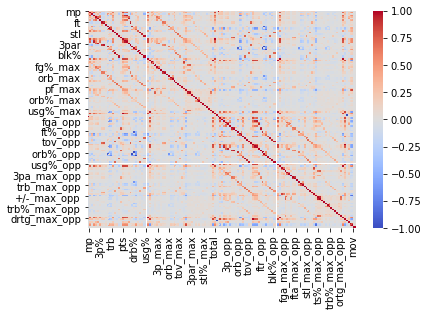

In [33]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix,cmap='coolwarm')
plt.show()

# lets orginitze our data 

In [34]:
east_teams= ['NYK','BOS','DET', 'BRK', "PHI","CLE","CHO","CHI", "WAS", 'TOR', "MIA", "MIL", "IND", "ATL", "ORL"]
west_teams=['LAL',"LAC",'HOU',"GSW",'DEN','DAL',"UTA","SAS","SAC","MEM",'POR','PHO','NOP','OKC','MIN']

In [35]:
df['conference'] = df['team'].apply(lambda x: 'East' if x in east_teams else ('West' if x in west_teams else None))

<ipython-input-35-f1b5b0001cf8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['conference'] = df['team'].apply(lambda x: 'East' if x in east_teams else ('West' if x in west_teams else None))


In [36]:
team_conference_mapping = {
    'NYK': 'East', 'BOS': 'East', 'DET': 'East', 'BRK': 'East', 'PHI': 'East',
    'CLE': 'East', 'CHO': 'East', 'CHI': 'East', 'WAS': 'East', 'TOR': 'East',
    'MIA': 'East', 'MIL': 'East', 'IND': 'East', 'ATL': 'East', 'ORL': 'East',
    'LAL': 'West', 'LAC': 'West', 'HOU': 'West', 'GSW': 'West', 'DEN': 'West',
    'DAL': 'West', 'UTA': 'West', 'SAS': 'West', 'SAC': 'West', 'MEM': 'West',
    'POR': 'West', 'PHO': 'West', 'NOP': 'West', 'OKC': 'West', 'MIN': 'West'
}

# Add a new column 'opponent_conference' based on the opponent's team
df['opponent_conference'] = df['team_opp'].map(team_conference_mapping)
df

<ipython-input-36-dfc554c5105d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['opponent_conference'] = df['team_opp'].map(team_conference_mapping)


mp    fg    fga    fg%    3p   3pa    3p%    ft   fta    ft%   orb  \
0      240.0  39.0   81.0  0.481   6.0  20.0  0.300  14.0  18.0  0.778   6.0   
1      240.0  36.0  100.0  0.360   7.0  31.0  0.226  16.0  19.0  0.842  20.0   
2      240.0  37.0   85.0  0.435   8.0  19.0  0.421  17.0  23.0  0.739  11.0   
3      240.0  41.0   89.0  0.461   8.0  21.0  0.381  17.0  19.0  0.895  12.0   
4      240.0  27.0   86.0  0.314   6.0  26.0  0.231  15.0  20.0  0.750  12.0   
...      ...   ...    ...    ...   ...   ...    ...   ...   ...    ...   ...   
20575  240.0  46.0   88.0  0.523  14.0  38.0  0.368  25.0  29.0  0.862   8.0   
20577  240.0  42.0   82.0  0.512  14.0  29.0  0.483  21.0  23.0  0.913  11.0   
20580  240.0  44.0   81.0  0.543  14.0  34.0  0.412  17.0  20.0  0.850   6.0   
20587  240.0  40.0   78.0  0.513  10.0  31.0  0.323  18.0  20.0  0.900   9.0   
20588  265.0  38.0   91.0  0.418  11.0  35.0  0.314  27.0  34.0  0.794   9.0   

        drb   trb   ast   stl   blk   tov    pf    pts    ts%   efg%   3par  \
0      41.0  47.0  26.0   7.0   7.0  14.0  19.0   98.0  0.551  0.519  0.247   
1      31.0  51.0  18.0   7.0   3.0   9.0  15.0   95.0  0.438  0.395  0.310   
2      31.0  42.0  23.0   7.0   4.0  13.0  16.0   99.0  0.520  0.482  0.224   
3      38.0  50.0  22.0   8.0  11.0  11.0  18.0  107.0  0.550  0.506  0.236   
4      44.0  56.0  16.0   4.0   6.0  20.0  19.0   75.0  0.396  0.349  0.302   
...     ...   ...   ...   ...   ...   ...   ...    ...    ...    ...    ...   
20575  28.0  36.0  28.0  10.0   4.0  11.0  20.0  131.0  0.650  0.602  0.432   
20577  35.0  46.0  22.0   7.0   4.0  16.0  20.0  119.0  0.646  0.598  0.354   
20580  30.0  36.0  28.0   6.0   6.0  14.0  14.0  119.0  0.663  0.630  0.420   
20587  34.0  43.0  28.0   7.0   4.0  18.0  22.0  108.0  0.622  0.577  0.397   
20588  49.0  58.0  21.0   7.0   4.0  17.0  24.0  114.0  0.538  0.478  0.385   

         ftr  orb%  drb%  trb%  ast%  stl%  blk%  tov%   usg%   ortg   drtg  \
0      0.222  16.2  67.2  48.0  66.7   7.4  10.1  13.6  100.0  103.7  100.5   
1      0.190  32.8  83.8  52.0  50.0   7.4   4.9   7.7  100.0  100.5  103.7   
2      0.271  22.4  72.1  45.7  62.2   7.4   5.9  12.0  100.0  104.8  113.3   
3      0.213  27.9  77.6  54.3  53.7   8.5  16.7  10.2  100.0  113.3  104.8   
4      0.233  22.2  74.6  49.6  59.3   4.1  10.0  17.4  100.0   76.7   94.0   
...      ...   ...   ...   ...   ...   ...   ...   ...    ...    ...    ...   
20575  0.330  20.5  77.8  48.0  60.9  10.0   8.7   9.8  100.0  131.5  130.5   
20577  0.280  29.7  81.4  57.5  52.4   7.3   9.3  14.8  100.0  124.8  120.6   
20580  0.247  18.2  71.4  48.0  63.6   6.2  11.1  13.5  100.0  123.8  131.1   
20587  0.256  29.0  82.9  59.7  70.0   7.6   8.3  17.2  100.0  116.7  106.9   
20588  0.374  17.3  83.1  52.3  55.3   6.2   7.1  13.8  100.0  100.2  104.6   

       fg_max  fga_max  fg%_max  3p_max  3pa_max  3p%_max  ft_max  fta_max  \
0         7.0     13.0    0.667     2.0      6.0    1.000     6.0      9.0   
1         8.0     20.0    1.000     2.0      8.0    0.500     6.0      7.0   
2         9.0     15.0    0.643     4.0      6.0    0.667     4.0      9.0   
3         9.0     21.0    0.875     3.0      7.0    1.000     6.0      7.0   
4         7.0     14.0    0.667     2.0      5.0    0.667     5.0      6.0   
...       ...      ...      ...     ...      ...      ...     ...      ...   
20575    11.0     17.0    0.667     5.0     12.0    1.000    10.0     10.0   
20577    12.0     16.0    0.750     5.0      7.0    1.000     8.0      9.0   
20580     8.0     16.0    0.800     5.0      9.0    1.000     6.0      7.0   
20587    10.0     17.0    0.833     4.0      9.0    0.500    12.0     12.0   
20588     8.0     21.0    0.800     5.0     12.0    0.500     9.0     10.0   

       ft%_max  orb_max  drb_max  trb_max  ast_max  stl_max  blk_max  tov_max  \
0          1.0      2.0      9.0     11.0      6.0      3.0      2.0      4.0   
1          1.0      7.0     10.0     17.0      6.0  

### lets split data sets into seasons 

In [37]:
seasons = df['season'].unique()
seasons

array([2016, 2018, 2021, 2017, 2019, 2022, 2020, 2023, 2024])

In [38]:
season_2016_df = df[df['season'] == 2016]
season_2017_df = df[df['season'] == 2017]
season_2018_df = df[df['season'] == 2018]
season_2019_df = df[df['season'] == 2019]
season_2020_df = df[df['season'] == 2020]
season_2021_df = df[df['season'] == 2021]
season_2022_df = df[df['season'] == 2022]
season_2023_df = df[df['season'] == 2023]
season_2024_df = df[df['season'] == 2024]

In [39]:
#2016 teams
atl_16 = season_2016_df[season_2016_df['team'] == 'ATL'].copy()
ind_16 = season_2016_df[season_2016_df['team'] == 'IND'].copy()
lac_16 = season_2016_df[season_2016_df['team'] == 'LAC'].copy()
lal_16 = season_2016_df[season_2016_df['team'] == 'LAL'].copy()
mem_16 = season_2016_df[season_2016_df['team'] == 'MEM'].copy()
mia_16 = season_2016_df[season_2016_df['team'] == 'MIA'].copy()
mil_16 = season_2016_df[season_2016_df['team'] == 'MIL'].copy()
min_16 = season_2016_df[season_2016_df['team'] == 'MIN'].copy()
nop_16 = season_2016_df[season_2016_df['team'] == 'NOP'].copy()
okc_16 = season_2016_df[season_2016_df['team'] == 'OKC'].copy()
orl_16 = season_2016_df[season_2016_df['team'] == 'ORL'].copy()
phi_16 = season_2016_df[season_2016_df['team'] == 'PHI'].copy()
pho_16 = season_2016_df[season_2016_df['team'] == 'PHO'].copy()
por_16 = season_2016_df[season_2016_df['team'] == 'POR'].copy()
sac_16 = season_2016_df[season_2016_df['team'] == 'SAC'].copy()
sas_16 = season_2016_df[season_2016_df['team'] == 'SAS'].copy()
tor_16 = season_2016_df[season_2016_df['team'] == 'TOR'].copy()
uta_16 = season_2016_df[season_2016_df['team'] == 'UTA'].copy()
wiz_16 = season_2016_df[season_2016_df['team'] == 'WAS'].copy()
bos_16 = season_2016_df[season_2016_df['team'] == 'BOS'].copy()
nets_16 = season_2016_df[season_2016_df['team'] == 'BRK'].copy()
bulls_16 = season_2016_df[season_2016_df['team'] == 'CHI'].copy()
cho_16 = season_2016_df[season_2016_df['team'] == 'CHO'].copy()
cle_16 = season_2016_df[season_2016_df['team'] == 'CLE'].copy()
dal_16 = season_2016_df[season_2016_df['team'] == 'DAL'].copy()
nyk_16 = season_2016_df[season_2016_df['team'] == 'NYK'].copy()
den_16 = season_2016_df[season_2016_df['team'] == 'DEN'].copy()
det_16 = season_2016_df[season_2016_df['team'] == 'DET'].copy()
gsw_16 = season_2016_df[season_2016_df['team'] == 'GSW'].copy()
hou_16 = season_2016_df[season_2016_df['team'] == 'HOU'].copy()
#2017 teams
atl_17 = season_2017_df[season_2017_df['team'] == 'ATL'].copy()
ind_17 = season_2017_df[season_2017_df['team'] == 'IND'].copy()
lac_17 = season_2017_df[season_2017_df['team'] == 'LAC'].copy()
lal_17 = season_2017_df[season_2017_df['team'] == 'LAL'].copy()
mem_17 = season_2017_df[season_2017_df['team'] == 'MEM'].copy()
mia_17 = season_2017_df[season_2017_df['team'] == 'MIA'].copy()
mil_17 = season_2017_df[season_2017_df['team'] == 'MIL'].copy()
min_17 = season_2017_df[season_2017_df['team'] == 'MIN'].copy()
nop_17 = season_2017_df[season_2017_df['team'] == 'NOP'].copy()
okc_17 = season_2017_df[season_2017_df['team'] == 'OKC'].copy()
orl_17 = season_2017_df[season_2017_df['team'] == 'ORL'].copy()
phi_17 = season_2017_df[season_2017_df['team'] == 'PHI'].copy()
pho_17 = season_2017_df[season_2017_df['team'] == 'PHO'].copy()
por_17 = season_2017_df[season_2017_df['team'] == 'POR'].copy()
sac_17 = season_2017_df[season_2017_df['team'] == 'SAC'].copy()
sas_17 = season_2017_df[season_2017_df['team'] == 'SAS'].copy()
tor_17 = season_2017_df[season_2017_df['team'] == 'TOR'].copy()
uta_17 = season_2017_df[season_2017_df['team'] == 'UTA'].copy()
wiz_17 = season_2017_df[season_2017_df['team'] == 'WAS'].copy()
bos_17 = season_2017_df[season_2017_df['team'] == 'BOS'].copy()
nets_17 = season_2017_df[season_2017_df['team'] == 'BRK'].copy()
bulls_17 = season_2017_df[season_2017_df['team'] == 'CHI'].copy()
cho_17 = season_2017_df[season_2017_df['team'] == 'CHO'].copy()
cle_17 = season_2017_df[season_2017_df['team'] == 'CLE'].copy()
dal_17 = season_2017_df[season_2017_df['team'] == 'DAL'].copy()
nyk_17 = season_2017_df[season_2017_df['team'] == 'NYK'].copy()
den_17 = season_2017_df[season_2017_df['team'] == 'DEN'].copy()
det_17 = season_2017_df[season_2017_df['team'] == 'DET'].copy()
gsw_17 = season_2017_df[season_2017_df['team'] == 'GSW'].copy()
hou_17 = season_2017_df[season_2017_df['team'] == 'HOU'].copy()
#2018 teams 
atl_18 = season_2018_df[season_2018_df['team'] == 'ATL'].copy()
ind_18 = season_2018_df[season_2018_df['team'] == 'IND'].copy()
lac_18 = season_2018_df[season_2018_df['team'] == 'LAC'].copy()
lal_18 = season_2018_df[season_2018_df['team'] == 'LAL'].copy()
mem_18 = season_2018_df[season_2018_df['team'] == 'MEM'].copy()
mia_18 = season_2018_df[season_2018_df['team'] == 'MIA'].copy()
mil_18 = season_2018_df[season_2018_df['team'] == 'MIL'].copy()
min_18 = season_2018_df[season_2018_df['team'] == 'MIN'].copy()
nop_18 = season_2018_df[season_2018_df['team'] == 'NOP'].copy()
okc_18 = season_2018_df[season_2018_df['team'] == 'OKC'].copy()
orl_18 = season_2018_df[season_2018_df['team'] == 'ORL'].copy()
phi_18 = season_2018_df[season_2018_df['team'] == 'PHI'].copy()
pho_18 = season_2018_df[season_2018_df['team'] == 'PHO'].copy()
por_18 = season_2018_df[season_2018_df['team'] == 'POR'].copy()
sac_18 = season_2018_df[season_2018_df['team'] == 'SAC'].copy()
sas_18 = season_2018_df[season_2018_df['team'] == 'SAS'].copy()
tor_18 = season_2018_df[season_2018_df['team'] == 'TOR'].copy()
uta_18 = season_2018_df[season_2018_df['team'] == 'UTA'].copy()
wiz_18 = season_2018_df[season_2018_df['team'] == 'WAS'].copy()
bos_18 = season_2018_df[season_2018_df['team'] == 'BOS'].copy()
nets_18 = season_2018_df[season_2018_df['team'] == 'BRK'].copy()
bulls_18 = season_2018_df[season_2018_df['team'] == 'CHI'].copy()
cho_18 = season_2018_df[season_2018_df['team'] == 'CHO'].copy()
cle_18 = season_2018_df[season_2018_df['team'] == 'CLE'].copy()
dal_18 = season_2018_df[season_2018_df['team'] == 'DAL'].copy()
nyk_18 = season_2018_df[season_2018_df['team'] == 'NYK'].copy()
den_18 = season_2018_df[season_2018_df['team'] == 'DEN'].copy()
det_18 = season_2018_df[season_2018_df['team'] == 'DET'].copy()
gsw_18 = season_2018_df[season_2018_df['team'] == 'GSW'].copy()
hou_18 = season_2018_df[season_2018_df['team'] == 'HOU'].copy()
# 2019
atl_19 = season_2019_df[season_2019_df['team'] == 'ATL'].copy()
ind_19 = season_2019_df[season_2019_df['team'] == 'IND'].copy()
lac_19 = season_2019_df[season_2019_df['team'] == 'LAC'].copy()
lal_19 = season_2019_df[season_2019_df['team'] == 'LAL'].copy()
mem_19 = season_2019_df[season_2019_df['team'] == 'MEM'].copy()
mia_19 = season_2019_df[season_2019_df['team'] == 'MIA'].copy()
mil_19 = season_2019_df[season_2019_df['team'] == 'MIL'].copy()
min_19 = season_2019_df[season_2019_df['team'] == 'MIN'].copy()
nop_19 = season_2019_df[season_2019_df['team'] == 'NOP'].copy()
okc_19 = season_2019_df[season_2019_df['team'] == 'OKC'].copy()
orl_19 = season_2019_df[season_2019_df['team'] == 'ORL'].copy()
phi_19 = season_2019_df[season_2019_df['team'] == 'PHI'].copy()
pho_19 = season_2019_df[season_2019_df['team'] == 'PHO'].copy()
por_19 = season_2019_df[season_2019_df['team'] == 'POR'].copy()
sac_19 = season_2019_df[season_2019_df['team'] == 'SAC'].copy()
sas_19 = season_2019_df[season_2019_df['team'] == 'SAS'].copy()
tor_19 = season_2019_df[season_2019_df['team'] == 'TOR'].copy()
uta_19 = season_2019_df[season_2019_df['team'] == 'UTA'].copy()
wiz_19 = season_2019_df[season_2019_df['team'] == 'WAS'].copy()
bos_19 = season_2019_df[season_2019_df['team'] == 'BOS'].copy()
nets_19 = season_2019_df[season_2019_df['team'] == 'BRK'].copy()
bulls_19 = season_2019_df[season_2019_df['team'] == 'CHI'].copy()
cho_19 = season_2019_df[season_2019_df['team'] == 'CHO'].copy()
cle_19 = season_2019_df[season_2019_df['team'] == 'CLE'].copy()
dal_19 = season_2019_df[season_2019_df['team'] == 'DAL'].copy()
nyk_19 = season_2019_df[season_2019_df['team'] == 'NYK'].copy()
den_19 = season_2019_df[season_2019_df['team'] == 'DEN'].copy()
det_19 = season_2019_df[season_2019_df['team'] == 'DET'].copy()
gsw_19 = season_2019_df[season_2019_df['team'] == 'GSW'].copy()
hou_19 = season_2019_df[season_2019_df['team'] == 'HOU'].copy()
# 2020
atl_20 = season_2020_df[season_2020_df['team'] == 'ATL'].copy()
ind_20 = season_2020_df[season_2020_df['team'] == 'IND'].copy()
lac_20 = season_2020_df[season_2020_df['team'] == 'LAC'].copy()
lal_20 = season_2020_df[season_2020_df['team'] == 'LAL'].copy()
mem_20 = season_2020_df[season_2020_df['team'] == 'MEM'].copy()
mia_20 = season_2020_df[season_2020_df['team'] == 'MIA'].copy()
mil_20 = season_2020_df[season_2020_df['team'] == 'MIL'].copy()
min_20 = season_2020_df[season_2020_df['team'] == 'MIN'].copy()
nop_20 = season_2020_df[season_2020_df['team'] == 'NOP'].copy()
okc_20 = season_2020_df[season_2020_df['team'] == 'OKC'].copy()
orl_20 = season_2020_df[season_2020_df['team'] == 'ORL'].copy()
phi_20 = season_2020_df[season_2020_df['team'] == 'PHI'].copy()
pho_20 = season_2020_df[season_2020_df['team'] == 'PHO'].copy()
por_20 = season_2020_df[season_2020_df['team'] == 'POR'].copy()
sac_20 = season_2020_df[season_2020_df['team'] == 'SAC'].copy()
sas_20 = season_2020_df[season_2020_df['team'] == 'SAS'].copy()
tor_20 = season_2020_df[season_2020_df['team'] == 'TOR'].copy()
uta_20 = season_2020_df[season_2020_df['team'] == 'UTA'].copy()
wiz_20 = season_2020_df[season_2020_df['team'] == 'WAS'].copy()
bos_20 = season_2020_df[season_2020_df['team'] == 'BOS'].copy()
nets_20 = season_2020_df[season_2020_df['team'] == 'BRK'].copy()
bulls_20 = season_2020_df[season_2020_df['team'] == 'CHI'].copy()
cho_20 = season_2020_df[season_2020_df['team'] == 'CHO'].copy()
cle_20 = season_2020_df[season_2020_df['team'] == 'CLE'].copy()
dal_20 = season_2020_df[season_2020_df['team'] == 'DAL'].copy()
nyk_20 = season_2020_df[season_2020_df['team'] == 'NYK'].copy()
den_20 = season_2020_df[season_2020_df['team'] == 'DEN'].copy()
det_20 = season_2020_df[season_2020_df['team'] == 'DET'].copy()
gsw_20 = season_2020_df[season_2020_df['team'] == 'GSW'].copy()
hou_20 = season_2020_df[season_2020_df['team'] == 'HOU'].copy()
# 2021
atl_21 = season_2021_df[season_2021_df['team'] == 'ATL'].copy()
ind_21 = season_2021_df[season_2021_df['team'] == 'IND'].copy()
lac_21 = season_2021_df[season_2021_df['team'] == 'LAC'].copy()
lal_21 = season_2021_df[season_2021_df['team'] == 'LAL'].copy()
mem_21 = season_2021_df[season_2021_df['team'] == 'MEM'].copy()
mia_21 = season_2021_df[season_2021_df['team'] == 'MIA'].copy()
mil_21 = season_2021_df[season_2021_df['team'] == 'MIL'].copy()
min_21 = season_2021_df[season_2021_df['team'] == 'MIN'].copy()
nop_21 = season_2021_df[season_2021_df['team'] == 'NOP'].copy()
okc_21 = season_2021_df[season_2021_df['team'] == 'OKC'].copy()
orl_21 = season_2021_df[season_2021_df['team'] == 'ORL'].copy()
phi_21 = season_2021_df[season_2021_df['team'] == 'PHI'].copy()
pho_21 = season_2021_df[season_2021_df['team'] == 'PHO'].copy()
por_21 = season_2021_df[season_2021_df['team'] == 'POR'].copy()
sac_21 = season_2021_df[season_2021_df['team'] == 'SAC'].copy()
sas_21 = season_2021_df[season_2021_df['team'] == 'SAS'].copy()
tor_21 = season_2021_df[season_2021_df['team'] == 'TOR'].copy()
uta_21 = season_2021_df[season_2021_df['team'] == 'UTA'].copy()
wiz_21 = season_2021_df[season_2021_df['team'] == 'WAS'].copy()
bos_21 = season_2021_df[season_2021_df['team'] == 'BOS'].copy()
nets_21 = season_2021_df[season_2021_df['team'] == 'BRK'].copy()
bulls_21 = season_2021_df[season_2021_df['team'] == 'CHI'].copy()
cho_21 = season_2021_df[season_2021_df['team'] == 'CHO'].copy()
cle_21 = season_2021_df[season_2021_df['team'] == 'CLE'].copy()
dal_21 = season_2021_df[season_2021_df['team'] == 'DAL'].copy()
nyk_21 = season_2021_df[season_2021_df['team'] == 'NYK'].copy()
den_21 = season_2021_df[season_2021_df['team'] == 'DEN'].copy()
det_21 = season_2021_df[season_2021_df['team'] == 'DET'].copy()
gsw_21 = season_2021_df[season_2021_df['team'] == 'GSW'].copy()
hou_21 = season_2021_df[season_2021_df['team'] == 'HOU'].copy()
#2022
atl_22 = season_2022_df[season_2022_df['team'] == 'ATL'].copy()
ind_22 = season_2022_df[season_2022_df['team'] == 'IND'].copy()
lac_22 = season_2022_df[season_2022_df['team'] == 'LAC'].copy()
lal_22 = season_2022_df[season_2022_df['team'] == 'LAL'].copy()
mem_22 = season_2022_df[season_2022_df['team'] == 'MEM'].copy()
mia_22 = season_2022_df[season_2022_df['team'] == 'MIA'].copy()
mil_22 = season_2022_df[season_2022_df['team'] == 'MIL'].copy()
min_22 = season_2022_df[season_2022_df['team'] == 'MIN'].copy()
nop_22 = season_2022_df[season_2022_df['team'] == 'NOP'].copy()
okc_22 = season_2022_df[season_2022_df['team'] == 'OKC'].copy()
orl_22 = season_2022_df[season_2022_df['team'] == 'ORL'].copy()
phi_22 = season_2022_df[season_2022_df['team'] == 'PHI'].copy()
pho_22 = season_2022_df[season_2022_df['team'] == 'PHO'].copy()
por_22 = season_2022_df[season_2022_df['team'] == 'POR'].copy()
sac_22 = season_2022_df[season_2022_df['team'] == 'SAC'].copy()
sas_22 = season_2022_df[season_2022_df['team'] == 'SAS'].copy()
tor_22 = season_2022_df[season_2022_df['team'] == 'TOR'].copy()
uta_22 = season_2022_df[season_2022_df['team'] == 'UTA'].copy()
wiz_22 = season_2022_df[season_2022_df['team'] == 'WAS'].copy()
bos_22 = season_2022_df[season_2022_df['team'] == 'BOS'].copy()
nets_22 = season_2022_df[season_2022_df['team'] == 'BRK'].copy()
bulls_22 = season_2022_df[season_2022_df['team'] == 'CHI'].copy()
cho_22 = season_2022_df[season_2022_df['team'] == 'CHO'].copy()
cle_22 = season_2022_df[season_2022_df['team'] == 'CLE'].copy()
dal_22 = season_2022_df[season_2022_df['team'] == 'DAL'].copy()
nyk_22 = season_2022_df[season_2022_df['team'] == 'NYK'].copy()
den_22 = season_2022_df[season_2022_df['team'] == 'DEN'].copy()
det_22 = season_2022_df[season_2022_df['team'] == 'DET'].copy()
gsw_22 = season_2022_df[season_2022_df['team'] == 'GSW'].copy()
hou_22 = season_2022_df[season_2022_df['team'] == 'HOU'].copy()
#2023
atl_23 = season_2023_df[season_2023_df['team'] == 'ATL'].copy()
ind_23 = season_2023_df[season_2023_df['team'] == 'IND'].copy()
lac_23 = season_2023_df[season_2023_df['team'] == 'LAC'].copy()
lal_23 = season_2023_df[season_2023_df['team'] == 'LAL'].copy()
mem_23 = season_2023_df[season_2023_df['team'] == 'MEM'].copy()
mia_23 = season_2023_df[season_2023_df['team'] == 'MIA'].copy()
mil_23 = season_2023_df[season_2023_df['team'] == 'MIL'].copy()
min_23 = season_2023_df[season_2023_df['team'] == 'MIN'].copy()
nop_23 = season_2023_df[season_2023_df['team'] == 'NOP'].copy()
okc_23 = season_2023_df[season_2023_df['team'] == 'OKC'].copy()
orl_23 = season_2023_df[season_2023_df['team'] == 'ORL'].copy()
phi_23 = season_2023_df[season_2023_df['team'] == 'PHI'].copy()
pho_23 = season_2023_df[season_2023_df['team'] == 'PHO'].copy()
por_23 = season_2023_df[season_2023_df['team'] == 'POR'].copy()
sac_23 = season_2023_df[season_2023_df['team'] == 'SAC'].copy()
sas_23 = season_2023_df[season_2023_df['team'] == 'SAS'].copy()
tor_23 = season_2023_df[season_2023_df['team'] == 'TOR'].copy()
uta_23 = season_2023_df[season_2023_df['team'] == 'UTA'].copy()
wiz_23 = season_2023_df[season_2023_df['team'] == 'WAS'].copy()
bos_23 = season_2023_df[season_2023_df['team'] == 'BOS'].copy()
nets_23 = season_2023_df[season_2023_df['team'] == 'BRK'].copy()
bulls_23 = season_2023_df[season_2023_df['team'] == 'CHI'].copy()
cho_23 = season_2023_df[season_2023_df['team'] == 'CHO'].copy()
cle_23 = season_2023_df[season_2023_df['team'] == 'CLE'].copy()
dal_23 = season_2023_df[season_2023_df['team'] == 'DAL'].copy()
nyk_23 = season_2023_df[season_2023_df['team'] == 'NYK'].copy()
den_23 = season_2023_df[season_2023_df['team'] == 'DEN'].copy()
det_23 = season_2023_df[season_2023_df['team'] == 'DET'].copy()
gsw_23 = season_2023_df[season_2023_df['team'] == 'GSW'].copy()
hou_23 = season_2023_df[season_2023_df['team'] == 'HOU'].copy()
#2024
atl_24 = season_2024_df[season_2024_df['team'] == 'ATL'].copy()
ind_24 = season_2024_df[season_2024_df['team'] == 'IND'].copy()
lac_24 = season_2024_df[season_2024_df['team'] == 'LAC'].copy()
lal_24 = season_2024_df[season_2024_df['team'] == 'LAL'].copy()
mem_24 = season_2024_df[season_2024_df['team'] == 'MEM'].copy()
mia_24 = season_2024_df[season_2024_df['team'] == 'MIA'].copy()
mil_24 = season_2024_df[season_2024_df['team'] == 'MIL'].copy()
min_24 = season_2024_df[season_2024_df['team'] == 'MIN'].copy()
nop_24 = season_2024_df[season_2024_df['team'] == 'NOP'].copy()
okc_24 = season_2024_df[season_2024_df['team'] == 'OKC'].copy()
orl_24 = season_2024_df[season_2024_df['team'] == 'ORL'].copy()
phi_24 = season_2024_df[season_2024_df['team'] == 'PHI'].copy()
pho_24 = season_2024_df[season_2024_df['team'] == 'PHO'].copy()
por_24 = season_2024_df[season_2024_df['team'] == 'POR'].copy()
sac_24 = season_2024_df[season_2024_df['team'] == 'SAC'].copy()
sas_24 = season_2024_df[season_2024_df['team'] == 'SAS'].copy()
tor_24 = season_2024_df[season_2024_df['team'] == 'TOR'].copy()
uta_24 = season_2024_df[season_2024_df['team'] == 'UTA'].copy()
wiz_24 = season_2024_df[season_2024_df['team'] == 'WAS'].copy()
bos_24 = season_2024_df[season_2024_df['team'] == 'BOS'].copy()
nets_24 = season_2024_df[season_2024_df['team'] == 'BRK'].copy()
bulls_24 = season_2024_df[season_2024_df['team'] == 'CHI'].copy()
cho_24 = season_2024_df[season_2024_df['team'] == 'CHO'].copy()
cle_24 = season_2024_df[season_2024_df['team'] == 'CLE'].copy()
dal_24 = season_2024_df[season_2024_df['team'] == 'DAL'].copy()
nyk_24 = season_2024_df[season_2024_df['team'] == 'NYK'].copy()
den_24 = season_2024_df[season_2024_df['team'] == 'DEN'].copy()
det_24 = season_2024_df[season_2024_df['team'] == 'DET'].copy()
gsw_24 = season_2024_df[season_2024_df['team'] == 'GSW'].copy()
hou_24 = season_2024_df[season_2024_df['team'] == 'HOU'].copy()



In [40]:
latest_dates = season_2024_df.groupby('team')['date'].max().reset_index()

# Display the DataFrame with the latest date for each team
latest_dates

team        date
0   ATL  2023-11-04
1   BOS  2023-11-04
2   BRK  2023-11-04
3   CHI  2023-11-04
4   CHO  2023-11-05
5   CLE  2023-11-05
6   DAL  2023-11-05
7   DEN  2023-11-04
8   DET  2023-11-05
9   GSW  2023-11-05
10  HOU  2023-11-04
11  IND  2023-11-04
12  LAC  2023-11-01
13  LAL  2023-11-04
14  MEM  2023-11-05
15  MIA  2023-11-03
16  MIL  2023-11-03
17  MIN  2023-11-04
18  NOP  2023-11-04
19  NYK  2023-11-03
20  OKC  2023-11-03
21  ORL  2023-11-04
22  PHI  2023-11-04
23  PHO  2023-11-05
24  POR  2023-11-05
25  SAC  2023-11-04
26  SAS  2023-11-05
27  TOR  2023-11-05
28  UTA  2023-11-04
29  WAS  2023-11-03

In [41]:
# For the 2016 season DataFrames
atl_16_mean = atl_16.groupby('team').mean()
ind_16_mean = ind_16.groupby('team').mean()
lac_16_mean = lac_16.groupby('team').mean()
lal_16_mean = lal_16.groupby('team').mean()
mem_16_mean = mem_16.groupby('team').mean()
mia_16_mean = mia_16.groupby('team').mean()
mil_16_mean = mil_16.groupby('team').mean()
min_16_mean = min_16.groupby('team').mean()
nop_16_mean = nop_16.groupby('team').mean()
okc_16_mean = okc_16.groupby('team').mean()
orl_16_mean = orl_16.groupby('team').mean()
phi_16_mean = phi_16.groupby('team').mean()
pho_16_mean = pho_16.groupby('team').mean()
por_16_mean = por_16.groupby('team').mean()
sac_16_mean = sac_16.groupby('team').mean()
sas_16_mean = sas_16.groupby('team').mean()
tor_16_mean = tor_16.groupby('team').mean() 
uta_16_mean = uta_16.groupby('team').mean()
wiz_16_mean = wiz_16.groupby('team').mean()
bos_16_mean = bos_16.groupby('team').mean()
nets_16_mean = nets_16.groupby('team').mean()
bulls_16_mean = bulls_16.groupby('team').mean()
cho_16_mean = cho_16.groupby('team').mean()
cle_16_mean = cle_16.groupby('team').mean()
dal_16_mean = dal_16.groupby('team').mean()
nyk_16_mean = nyk_16.groupby('team').mean()
den_16_mean = den_16.groupby('team').mean()
det_16_mean = det_16.groupby('team').mean()
gsw_16_mean = gsw_16.groupby('team').mean()
hou_16_mean = hou_16.groupby('team').mean()
# For the 2017 season
atl_17_mean = atl_17.groupby('team').mean()
ind_17_mean = ind_17.groupby('team').mean()
lac_17_mean = lac_17.groupby('team').mean()
lal_17_mean = lal_17.groupby('team').mean()
mem_17_mean = mem_17.groupby('team').mean()
mia_17_mean = mia_17.groupby('team').mean()
mil_17_mean = mil_17.groupby('team').mean()
min_17_mean = min_17.groupby('team').mean()
nop_17_mean = nop_17.groupby('team').mean()
okc_17_mean = okc_17.groupby('team').mean()
orl_17_mean = orl_17.groupby('team').mean()
phi_17_mean = phi_17.groupby('team').mean()
pho_17_mean = pho_17.groupby('team').mean()
por_17_mean = por_17.groupby('team').mean()
sac_17_mean = sac_17.groupby('team').mean()
sas_17_mean = sas_17.groupby('team').mean()
tor_17_mean = tor_17.groupby('team').mean()
uta_17_mean = uta_17.groupby('team').mean()
wiz_17_mean = wiz_17.groupby('team').mean()
bos_17_mean = bos_17.groupby('team').mean()
nets_17_mean = nets_17.groupby('team').mean()
bulls_17_mean = bulls_17.groupby('team').mean()
cho_17_mean = cho_17.groupby('team').mean()
cle_17_mean = cle_17.groupby('team').mean()
dal_17_mean = dal_17.groupby('team').mean()
nyk_17_mean = nyk_17.groupby('team').mean()
den_17_mean = den_17.groupby('team').mean()
det_17_mean = det_17.groupby('team').mean()
gsw_17_mean = gsw_17.groupby('team').mean()
hou_17_mean = hou_17.groupby('team').mean()
# For the 2018 season
atl_18_mean = atl_18.groupby('team').mean()
ind_18_mean = ind_18.groupby('team').mean()
lac_18_mean = lac_18.groupby('team').mean()
lal_18_mean = lal_18.groupby('team').mean()
mem_18_mean = mem_18.groupby('team').mean()
mia_18_mean = mia_18.groupby('team').mean()
mil_18_mean = mil_18.groupby('team').mean()
min_18_mean = min_18.groupby('team').mean()
nop_18_mean = nop_18.groupby('team').mean()
okc_18_mean = okc_18.groupby('team').mean()
orl_18_mean = orl_18.groupby('team').mean()
phi_18_mean = phi_18.groupby('team').mean()
pho_18_mean = pho_18.groupby('team').mean()
por_18_mean = por_18.groupby('team').mean()
sac_18_mean = sac_18.groupby('team').mean()
sas_18_mean = sas_18.groupby('team').mean()
tor_18_mean = tor_18.groupby('team').mean()
uta_18_mean = uta_18.groupby('team').mean()
wiz_18_mean = wiz_18.groupby('team').mean()
bos_18_mean = bos_18.groupby('team').mean()
nets_18_mean = nets_18.groupby('team').mean()
bulls_18_mean = bulls_18.groupby('team').mean()
cho_18_mean = cho_18.groupby('team').mean()
cle_18_mean = cle_18.groupby('team').mean()
dal_18_mean = dal_18.groupby('team').mean()
nyk_18_mean = nyk_18.groupby('team').mean()
den_18_mean = den_18.groupby('team').mean()
det_18_mean = det_18.groupby('team').mean()
gsw_18_mean = gsw_18.groupby('team').mean()
hou_18_mean = hou_18.groupby('team').mean()
#2019
atl_19_mean = atl_19.groupby('team').mean()
ind_19_mean = ind_19.groupby('team').mean()
lac_19_mean = lac_19.groupby('team').mean()
lal_19_mean = lal_19.groupby('team').mean()
mem_19_mean = mem_19.groupby('team').mean()
mia_19_mean = mia_19.groupby('team').mean()
mil_19_mean = mil_19.groupby('team').mean()
min_19_mean = min_19.groupby('team').mean()
nop_19_mean = nop_19.groupby('team').mean()
okc_19_mean = okc_19.groupby('team').mean()
orl_19_mean = orl_19.groupby('team').mean()
phi_19_mean = phi_19.groupby('team').mean()
pho_19_mean = pho_19.groupby('team').mean()
por_19_mean = por_19.groupby('team').mean()
sac_19_mean = sac_19.groupby('team').mean()
sas_19_mean = sas_19.groupby('team').mean()
tor_19_mean = tor_19.groupby('team').mean()
uta_19_mean = uta_19.groupby('team').mean()
wiz_19_mean = wiz_19.groupby('team').mean()
bos_19_mean = bos_19.groupby('team').mean()
nets_19_mean = nets_19.groupby('team').mean()
bulls_19_mean = bulls_19.groupby('team').mean()
cho_19_mean = cho_19.groupby('team').mean()
cle_19_mean = cle_19.groupby('team').mean()
dal_19_mean = dal_19.groupby('team').mean()
nyk_19_mean = nyk_19.groupby('team').mean()
den_19_mean = den_19.groupby('team').mean()
det_19_mean = det_19.groupby('team').mean()
gsw_19_mean = gsw_19.groupby('team').mean()
hou_19_mean = hou_19.groupby('team').mean()
#2020
atl_20_mean = atl_20.groupby('team').mean()
ind_20_mean = ind_20.groupby('team').mean()
lac_20_mean = lac_20.groupby('team').mean()
lal_20_mean = lal_20.groupby('team').mean()
mem_20_mean = mem_20.groupby('team').mean()
mia_20_mean = mia_20.groupby('team').mean()
mil_20_mean = mil_20.groupby('team').mean()
min_20_mean = min_20.groupby('team').mean()
nop_20_mean = nop_20.groupby('team').mean()
okc_20_mean = okc_20.groupby('team').mean()
orl_20_mean = orl_20.groupby('team').mean()
phi_20_mean = phi_20.groupby('team').mean()
pho_20_mean = pho_20.groupby('team').mean()
por_20_mean = por_20.groupby('team').mean()
sac_20_mean = sac_20.groupby('team').mean()
sas_20_mean = sas_20.groupby('team').mean()
tor_20_mean = tor_20.groupby('team').mean()
uta_20_mean = uta_20.groupby('team').mean()
wiz_20_mean = wiz_20.groupby('team').mean()
bos_20_mean = bos_20.groupby('team').mean()
nets_20_mean = nets_20.groupby('team').mean()
bulls_20_mean = bulls_20.groupby('team').mean()
cho_20_mean = cho_20.groupby('team').mean()
cle_20_mean = cle_20.groupby('team').mean()
dal_20_mean = dal_20.groupby('team').mean()
nyk_20_mean = nyk_20.groupby('team').mean()
den_20_mean = den_20.groupby('team').mean()
det_20_mean = det_20.groupby('team').mean()
gsw_20_mean = gsw_20.groupby('team').mean()
hou_20_mean = hou_20.groupby('team').mean()
#2021
atl_21_mean = atl_21.groupby('team').mean()
ind_21_mean = ind_21.groupby('team').mean()
lac_21_mean = lac_21.groupby('team').mean()
lal_21_mean = lal_21.groupby('team').mean()
mem_21_mean = mem_21.groupby('team').mean()
mia_21_mean = mia_21.groupby('team').mean()
mil_21_mean = mil_21.groupby('team').mean()
min_21_mean = min_21.groupby('team').mean()
nop_21_mean = nop_21.groupby('team').mean()
okc_21_mean = okc_21.groupby('team').mean()
orl_21_mean = orl_21.groupby('team').mean()
phi_21_mean = phi_21.groupby('team').mean()
pho_21_mean = pho_21.groupby('team').mean()
por_21_mean = por_21.groupby('team').mean()
sac_21_mean = sac_21.groupby('team').mean()
sas_21_mean = sas_21.groupby('team').mean()
tor_21_mean = tor_21.groupby('team').mean()
uta_21_mean = uta_21.groupby('team').mean()
wiz_21_mean = wiz_21.groupby('team').mean()
bos_21_mean = bos_21.groupby('team').mean()
nets_21_mean = nets_21.groupby('team').mean()
bulls_21_mean = bulls_21.groupby('team').mean()
cho_21_mean = cho_21.groupby('team').mean()
cle_21_mean = cle_21.groupby('team').mean()
dal_21_mean = dal_21.groupby('team').mean()
nyk_21_mean = nyk_21.groupby('team').mean()
den_21_mean = den_21.groupby('team').mean()
det_21_mean = det_21.groupby('team').mean()
gsw_21_mean = gsw_21.groupby('team').mean()
hou_21_mean = hou_21.groupby('team').mean()
#2022
atl_22_mean = atl_22.groupby('team').mean()
ind_22_mean = ind_22.groupby('team').mean()
lac_22_mean = lac_22.groupby('team').mean()
lal_22_mean = lal_22.groupby('team').mean()
mem_22_mean = mem_22.groupby('team').mean()
mia_22_mean = mia_22.groupby('team').mean()
mil_22_mean = mil_22.groupby('team').mean()
min_22_mean = min_22.groupby('team').mean()
nop_22_mean = nop_22.groupby('team').mean()
okc_22_mean = okc_22.groupby('team').mean()
orl_22_mean = orl_22.groupby('team').mean()
phi_22_mean = phi_22.groupby('team').mean()
pho_22_mean = pho_22.groupby('team').mean()
por_22_mean = por_22.groupby('team').mean()
sac_22_mean = sac_22.groupby('team').mean()
sas_22_mean = sas_22.groupby('team').mean()
tor_22_mean = tor_22.groupby('team').mean()
uta_22_mean = uta_22.groupby('team').mean()
wiz_22_mean = wiz_22.groupby('team').mean()
bos_22_mean = bos_22.groupby('team').mean()
nets_22_mean = nets_22.groupby('team').mean()
bulls_22_mean = bulls_22.groupby('team').mean()
cho_22_mean = cho_22.groupby('team').mean()
cle_22_mean = cle_22.groupby('team').mean()
dal_22_mean = dal_22.groupby('team').mean()
nyk_22_mean = nyk_22.groupby('team').mean()
den_22_mean = den_22.groupby('team').mean()
det_22_mean = det_22.groupby('team').mean()
gsw_22_mean = gsw_22.groupby('team').mean()
hou_22_mean = hou_22.groupby('team').mean()
#23
# For the 2023 season
atl_23_mean = atl_23.groupby('team').mean()
ind_23_mean = ind_23.groupby('team').mean()
lac_23_mean = lac_23.groupby('team').mean()
lal_23_mean = lal_23.groupby('team').mean()
mem_23_mean = mem_23.groupby('team').mean()
mia_23_mean = mia_23.groupby('team').mean()
mil_23_mean = mil_23.groupby('team').mean()
min_23_mean = min_23.groupby('team').mean()
nop_23_mean = nop_23.groupby('team').mean()
okc_23_mean = okc_23.groupby('team').mean()
orl_23_mean = orl_23.groupby('team').mean()
phi_23_mean = phi_23.groupby('team').mean()
pho_23_mean = pho_23.groupby('team').mean()
por_23_mean = por_23.groupby('team').mean()
sac_23_mean = sac_23.groupby('team').mean()
sas_23_mean = sas_23.groupby('team').mean()
tor_23_mean = tor_23.groupby('team').mean()
uta_23_mean = uta_23.groupby('team').mean()
wiz_23_mean = wiz_23.groupby('team').mean()
bos_23_mean = bos_23.groupby('team').mean()
nets_23_mean = nets_23.groupby('team').mean()
bulls_23_mean = bulls_23.groupby('team').mean()
cho_23_mean = cho_23.groupby('team').mean()
cle_23_mean = cle_23.groupby('team').mean()
dal_23_mean = dal_23.groupby('team').mean()
nyk_23_mean = nyk_23.groupby('team').mean()
den_23_mean = den_23.groupby('team').mean()
det_23_mean = det_23.groupby('team').mean()
gsw_23_mean = gsw_23.groupby('team').mean()
hou_23_mean = hou_23.groupby('team').mean()
#24
# For the 2024 season
atl_24_mean = atl_24.groupby('team').mean()
ind_24_mean = ind_24.groupby('team').mean()
lac_24_mean = lac_24.groupby('team').mean()
lal_24_mean = lal_24.groupby('team').mean()
mem_24_mean = mem_24.groupby('team').mean()
mia_24_mean = mia_24.groupby('team').mean()
mil_24_mean = mil_24.groupby('team').mean()
min_24_mean = min_24.groupby('team').mean()
nop_24_mean = nop_24.groupby('team').mean()
okc_24_mean = okc_24.groupby('team').mean()
orl_24_mean = orl_24.groupby('team').mean()
phi_24_mean = phi_24.groupby('team').mean()
pho_24_mean = pho_24.groupby('team').mean()
por_24_mean = por_24.groupby('team').mean()
sac_24_mean = sac_24.groupby('team').mean()
sas_24_mean = sas_24.groupby('team').mean()
tor_24_mean = tor_24.groupby('team').mean()
uta_24_mean = uta_24.groupby('team').mean()
wiz_24_mean = wiz_24.groupby('team').mean()
bos_24_mean = bos_24.groupby('team').mean()
nets_24_mean = nets_24.groupby('team').mean()
bulls_24_mean = bulls_24.groupby('team').mean()
cho_24_mean = cho_24.groupby('team').mean()
cle_24_mean = cle_24.groupby('team').mean()
dal_24_mean = dal_24.groupby('team').mean()
nyk_24_mean = nyk_24.groupby('team').mean()
den_24_mean = den_24.groupby('team').mean()
det_24_mean = det_24.groupby('team').mean()
gsw_24_mean = gsw_24.groupby('team').mean()
hou_24_mean = hou_24.groupby('team').mean()

In [42]:
# Concatenate the mean DataFrames for the 2016 season
year2016_mean = pd.concat([atl_16_mean, ind_16_mean, lac_16_mean, lal_16_mean, mem_16_mean, mia_16_mean,
                           mil_16_mean, min_16_mean, nop_16_mean, okc_16_mean, orl_16_mean, phi_16_mean,
                           pho_16_mean, por_16_mean, sac_16_mean, sas_16_mean, tor_16_mean, uta_16_mean,
                           wiz_16_mean, bos_16_mean, nets_16_mean, bulls_16_mean, cho_16_mean, cle_16_mean,
                           dal_16_mean, nyk_16_mean, den_16_mean, det_16_mean, gsw_16_mean, hou_16_mean])

# Rename the columns with year-specific names
year2016_mean.columns = [col.replace('_mean', '2016mean') for col in year2016_mean.columns]

# Display the 2016 mean DataFrame
year2016_mean

mp         fg        fga       fg%         3p        3pa  \
team                                                                     
ATL   241.902174  38.413043  84.467391  0.455913  10.010870  28.739130   
IND   242.247191  37.898876  84.370787  0.449843   8.089888  22.898876   
LAC   241.704545  38.227273  82.602273  0.464318   9.443182  26.215909   
LAL   240.609756  35.121951  84.829268  0.415317   7.792683  24.585366   
MEM   241.744186  36.593023  83.534884  0.439988   6.081395  18.430233   
MIA   242.343750  38.187500  81.500000  0.469729   6.187500  18.208333   
MIL   241.829268  38.353659  82.195122  0.467451   5.365854  15.573171   
MIN   242.439024  37.743902  81.317073  0.464927   5.548780  16.426829   
NOP   241.219512  38.451220  85.853659  0.448927   8.560976  23.792683   
OKC   241.500000  40.600000  86.030000  0.472690   8.270000  23.930000   
ORL   242.743902  39.536585  86.829268  0.456732   7.756098  22.170732   
PHI   241.524390  36.219512  83.987805  0.432671   9.317073  27.500000   
PHO   240.304878  37.207317  85.585366  0.435354   9.000000  25.829268   
POR   241.612903  38.440860  86.236559  0.446946  10.698925  28.817204   
SAC   241.524390  40.036585  86.378049  0.464695   8.048780  22.426829   
SAS   240.271739  39.956522  82.847826  0.483185   7.086957  18.576087   
TOR   241.715686  36.186275  81.343137  0.446373   8.284314  23.274510   
UTA   243.353659  36.060976  80.402439  0.450195   8.463415  23.853659   
WAS   240.914634  39.487805  85.768293  0.461183   8.646341  24.182927   
BOS   241.420455  38.886364  89.261364  0.436364   8.738636  26.488636   
BRK   240.914634  38.243902  84.390244  0.453988   6.475610  18.390244   
CHI   242.743902  38.597561  87.439024  0.443220   7.939024  21.378049   
CHO   241.966292  36.617978  84.101124  0.435697  10.258427  28.539326   
CLE   241.699029  38.601942  83.543689  0.463544  11.048544  29.737864   
DAL   243.735632  37.252874  83.977011  0.444356   9.620690  28.149425   
NYK   241.524390  36.853659  83.975610  0.440098   7.439024  21.487805   
DEN   241.829268  37.719512  85.402439  0.442354   8.000000  23.695122   
DET   242.325581  37.848837  85.906977  0.442163   9.011628  26.058140   
GSW   242.122642  41.726415  86.924528  0.480802  13.047170  31.792453   
HOU   241.724138  37.459770  83.620690  0.448793  10.528736  30.747126   

           3p%         ft        fta       ft%        orb        drb  \
team                                                                   
ATL   0.349630  15.706522  20.032609  0.779261   8.347826  33.978261   
IND   0.351258  17.606742  22.910112  0.768270  10.235955  33.595506   
LAC   0.359943  18.181818  26.454545  0.700818   8.965909  33.363636   
LAL   0.317866  19.304878  24.731707  0.778463  10.707317  32.256098   
MEM   0.326209  18.988372  24.348837  0.777233  11.290698  30.302326   
MIA   0.338542  17.020833  22.781250  0.750292   9.729167  34.406250   
MIL   0.344866  16.975610  22.719512  0.747000  10.463415  31.207317   
MIN   0.335512  21.378049  26.987805  0.795134  10.012195  31.548780   
NOP   0.357634  17.256098  22.231707  0.779256   9.536585  33.073171   
OKC   0.347230  20.060000  25.630000  0.786770  12.960000  35.360000   
ORL   0.349756  15.231707  20.109756  0.758159  10.280488  33.036585   
PHI   0.337439  15.658537  22.560976  0.697671   9.475610  31.768293   
PHO   0.344366  17.451220  23.231707  0.746573  11.500000  33.329268   
POR   0.369602  17.548387  23.333333  0.751763  11.720430  34.021505   
SAC   0.360293  18.463415  25.475610  0.719402  10.585366  33.658537   
SAS   0.384641  16.369565  20.402174  0.808141   9.228261  34.206522   
TOR   0.352784  20.225490  26.274510  0.772382  10.313725  32.500000   
UTA   0.356073  17.097561  22.987805  0.745049  10.731707  32.500000   
WAS   0.358220  16.451220  22.548780  0.733500   9.060976  32.780488   
BOS   0.330966  18.397727  23.352273  0.789852  11.522727  33.465909   
BRK   0.348439  15.682927  20.719512  0.752134  10.524390  31

In [43]:
# Concatenate the mean DataFrames for the 2017 season
year2017_mean = pd.concat([atl_17_mean, ind_17_mean, lac_17_mean, lal_17_mean, mem_17_mean, mia_17_mean,
                           mil_17_mean, min_17_mean, nop_17_mean, okc_17_mean, orl_17_mean, phi_17_mean,
                           pho_17_mean, por_17_mean, sac_17_mean, sas_17_mean, tor_17_mean, uta_17_mean,
                           wiz_17_mean, bos_17_mean, nets_17_mean, bulls_17_mean, cho_17_mean, cle_17_mean,
                           dal_17_mean, nyk_17_mean, den_17_mean, det_17_mean, gsw_17_mean, hou_17_mean])

# Rename the columns with year-specific names
year2017_mean.columns = [col.replace('_mean', '2017mean') for col in year2017_mean.columns]

# Display the 2017 mean DataFrame
year2017_mean

mp         fg        fga       fg%         3p        3pa  \
team                                                                     
ATL   242.272727  38.045455  84.375000  0.451523   8.852273  26.147727   
IND   242.034884  39.337209  84.639535  0.466012   8.767442  23.255814   
LAC   240.842697  39.292135  82.685393  0.476011  10.089888  27.067416   
LAL   240.304878  39.317073  87.365854  0.450488   8.902439  25.731707   
MEM   242.840909  36.272727  83.147727  0.437636   9.352273  26.295455   
MIA   241.219512  39.048780  85.817073  0.455841   9.853659  26.987805   
MIL   241.136364  38.534091  81.636364  0.473352   8.795455  23.590909   
MIN   241.524390  39.451220  84.414634  0.468073   7.329268  21.012195   
NOP   242.743902  39.146341  86.951220  0.450939   9.365854  26.780488   
OKC   241.436782  39.425287  87.425287  0.451563   8.436782  25.873563   
ORL   241.524390  38.280488  86.987805  0.440049   8.548780  26.085366   
PHI   241.829268  37.658537  85.268293  0.442988  10.134146  29.792683   
PHO   241.829268  39.878049  88.536585  0.452354   7.500000  22.609756   
POR   242.906977  39.360465  86.244186  0.457535  10.418605  28.000000   
SAC   242.439024  37.865854  82.121951  0.462159   8.987805  23.902439   
SAS   241.785714  39.408163  84.173469  0.469388   9.081633  23.653061   
TOR   241.086957  38.739130  83.836957  0.462924   8.728261  24.250000   
UTA   240.806452  36.827957  79.322581  0.465688   9.623656  25.946237   
WAS   242.105263  41.147368  87.115789  0.473684   9.105263  24.989474   
BOS   241.000000  38.590000  84.910000  0.455150  12.140000  33.620000   
BRK   240.914634  37.829268  85.207317  0.445415  10.695122  31.597561   
CHI   241.136364  38.488636  86.772727  0.444466   7.556818  22.409091   
CHO   241.829268  37.719512  85.365854  0.443110  10.048780  28.621951   
CLE   242.000000  40.120000  84.580000  0.475220  13.230000  33.890000   
DAL   241.219512  36.195122  82.317073  0.440341  10.707317  30.158537   
NYK   242.134146  39.560976  88.487805  0.448268   8.585366  24.658537   
DEN   240.914634  41.182927  87.731707  0.470890  10.609756  28.841463   
DET   241.524390  39.865854  88.804878  0.448841   7.695122  23.353659   
GSW   241.010101  43.050505  87.060606  0.495768  12.101010  31.525253   
HOU   241.344086  39.946237  86.956989  0.460108  14.215054  40.096774   

           3p%         ft        fta       ft%        orb        drb  \
team                                                                   
ATL   0.338500  18.375000  25.147727  0.728284  10.340909  33.988636   
IND   0.372640  17.825581  22.058140  0.803709   9.174419  32.825581   
LAC   0.371809  19.134831  25.797753  0.744809   8.898876  33.719101   
LAL   0.342500  17.036585  22.597561  0.755378  11.378049  32.146341   
MEM   0.353341  18.295455  23.181818  0.785250  10.590909  31.681818   
MIA   0.360902  15.219512  21.560976  0.707793  10.634146  32.987805   
MIL   0.375205  17.045455  22.318182  0.763955   8.772727  31.454545   
MIN   0.346232  19.341463  24.219512  0.797841  11.439024  30.975610   
NOP   0.346659  16.682927  22.256098  0.747122   8.573171  35.109756   
OKC   0.326713  19.172414  25.839080  0.744575  12.218391  34.229885   
ORL   0.328707  15.963415  21.378049  0.748378   9.841463  33.341463   
PHI   0.340024  16.987805  22.024390  0.765598   9.841463  33.000000   
PHO   0.333134  20.439024  26.329268  0.776171  11.902439  33.073171   
POR   0.372767  18.500000  23.686047  0.780267  10.116279  33.558140   
SAC   0.380427  18.085366  23.329268  0.770427   8.719512  32.341463   
SAS   0.387000  17.714286  22.336735  0.791796  10.459184  33.510204   
TOR   0.359913  19.543478  24.489130  0.798717  10.206522  32.619565   
UTA   0.371516  17.086022  22.924731  0.745559   9.086022  33.655914   
WAS   0.366747  17.631579  22.442105  0.788242  10.400000  32.473684   
BOS   0.360650  18.190000  22.690000  0.803020   9.140000  32.110000   
BRK   0.337207  19.414634  24.634146  0.787280   8.792683  35

In [44]:
# Concatenate the mean DataFrames for the 2018 season
year2018_mean = pd.concat([atl_18_mean, ind_18_mean, lac_18_mean, lal_18_mean, mem_18_mean, mia_18_mean,
                           mil_18_mean, min_18_mean, nop_18_mean, okc_18_mean, orl_18_mean, phi_18_mean,
                           pho_18_mean, por_18_mean, sac_18_mean, sas_18_mean, tor_18_mean, uta_18_mean,
                           wiz_18_mean, bos_18_mean, nets_18_mean, bulls_18_mean, cho_18_mean, cle_18_mean,
                           dal_18_mean, nyk_18_mean, den_18_mean, det_18_mean, gsw_18_mean, hou_18_mean])

# Rename the columns with year-specific names
year2018_mean.columns = [col.replace('_mean', '2018mean') for col in year2018_mean.columns]

# Display the 2018 mean DataFrame
year2018_mean

mp         fg        fga       fg%         3p        3pa  \
team                                                                     
ATL   240.304878  38.170732  85.548780  0.447720  11.182927  31.024390   
IND   240.842697  40.617978  85.887640  0.473730   9.089888  24.719101   
LAC   240.304878  40.268293  85.414634  0.472963   9.475610  26.780488   
LAL   242.743902  40.707317  88.390244  0.460890  10.024390  29.073171   
MEM   240.304878  36.743902  82.780488  0.444256   9.243902  26.243902   
MIA   242.873563  38.701149  85.183908  0.455299  11.000000  30.390805   
MIL   241.966292  39.674157  82.640449  0.480787   8.820225  24.764045   
MIN   241.436782  40.862069  85.931034  0.476460   8.080460  22.459770   
NOP   243.021978  42.703297  88.450549  0.483901  10.175824  28.076923   
OKC   241.704545  39.704545  87.954545  0.451693  10.727273  30.272727   
ORL   240.609756  38.804878  85.878049  0.452963  10.292683  29.329268   
PHI   241.358696  40.608696  86.771739  0.468793  10.869565  29.760870   
PHO   240.304878  38.451220  87.085366  0.443305   9.304878  27.878049   
POR   240.872093  39.383721  87.162791  0.453547  10.325581  28.337209   
SAC   240.914634  38.768293  86.134146  0.450768   9.000000  23.987805   
SAS   240.574713  38.793103  85.264368  0.455195   8.482759  24.344828   
TOR   241.902174  41.000000  86.869565  0.472739  11.652174  32.304348   
UTA   240.806452  38.215054  82.892473  0.461667  10.806452  29.612903   
WAS   241.988636  39.920455  85.556818  0.467523   9.795455  26.181818   
BOS   241.732673  37.950495  84.722772  0.448594  11.267327  30.425743   
BRK   242.134146  38.243902  86.756098  0.442146  12.695122  35.658537   
CHI   242.134146  38.658537  88.841463  0.435841  11.048780  31.085366   
CHO   241.219512  38.987805  86.658537  0.450598  10.048780  27.231707   
CLE   240.961538  39.634615  84.144231  0.471712  11.557692  31.759615   
DAL   241.524390  38.146341  85.878049  0.445512  11.792683  32.780488   
NYK   241.829268  40.658537  87.719512  0.464744   8.207317  23.341463   
DEN   242.439024  40.707317  86.609756  0.470341  11.463415  30.926829   
DET   241.524390  39.121951  86.939024  0.450159  10.804878  28.939024   
GSW   240.728155  42.475728  85.310680  0.498718  11.271845  29.407767   
HOU   240.757576  38.444444  84.404040  0.456101  14.989899  41.878788   

           3p%         ft        fta       ft%        orb        drb  \
team                                                                   
ATL   0.363463  15.829268  20.170732  0.787098   9.060976  32.841463   
IND   0.364652  14.842697  19.191011  0.775112   9.494382  32.662921   
LAC   0.351159  18.975610  25.548780  0.739317  10.146341  33.731707   
LAL   0.339976  16.634146  23.292683  0.718451  10.682927  35.695122   
MEM   0.350988  16.597561  21.121951  0.782098   9.500000  31.024390   
MIA   0.359943  15.011494  20.045977  0.750621   9.321839  34.000000   
MIL   0.357764  17.943820  23.078652  0.777281   8.168539  31.573034   
MIN   0.360644  19.252874  24.068966  0.797839  10.241379  31.908046   
NOP   0.360088  15.967033  20.670330  0.774066   8.604396  35.857143   
OKC   0.353273  17.261364  24.000000  0.716807  12.272727  32.715909   
ORL   0.348012  15.500000  20.463415  0.761866   8.804878  32.829268   
PHI   0.363728  17.608696  23.380435  0.758717  11.163043  36.489130   
PHO   0.335378  17.719512  23.926829  0.737585  10.268293  33.853659   
POR   0.365872  16.523256  20.674419  0.804116  10.232558  35.139535   
SAC   0.376915  12.292683  16.719512  0.740573   9.475610  31.439024   
SAS   0.349632  16.321839  21.034483  0.780943  10.241379  33.597701   
TOR   0.359967  17.532609  22.054348  0.790152   9.717391  33.847826   
UTA   0.365430  16.698925  21.774194  0.772333   9.064516  34.397849   
WAS   0.372977  17.011364  21.886364  0.780682   9.931818  32.977273   
BOS   0.374426  16.346535  21.227723  0.770455   9.257426  34.673267   
BRK   0.355890  17.414634  22.560976  0.779146   9.658537  34

In [45]:
# Concatenate the mean DataFrames for the 2019 season
year2019_mean = pd.concat([atl_19_mean, ind_19_mean, lac_19_mean, lal_19_mean, mem_19_mean, mia_19_mean,
                           mil_19_mean, min_19_mean, nop_19_mean, okc_19_mean, orl_19_mean, phi_19_mean,
                           pho_19_mean, por_19_mean, sac_19_mean, sas_19_mean, tor_19_mean, uta_19_mean,
                           wiz_19_mean, bos_19_mean, nets_19_mean, bulls_19_mean, cho_19_mean, cle_19_mean,
                           dal_19_mean, nyk_19_mean, den_19_mean, det_19_mean, gsw_19_mean, hou_19_mean])

# Rename the columns with year-specific names
year2019_mean.columns = [col.replace('_mean', '2019mean') for col in year2019_mean.columns]

# Display the 2019 mean DataFrame
year2019_mean

mp         fg        fga       fg%         3p        3pa  \
team                                                                     
ATL   242.134146  41.365854  91.756098  0.451780  13.012195  37.000000   
IND   240.290698  40.976744  86.848837  0.472721   9.523256  25.581395   
LAC   241.704545  41.170455  87.647727  0.470489  10.113636  26.227273   
LAL   241.219512  42.573171  90.548780  0.471024  10.329268  30.987805   
MEM   242.439024  37.963415  84.439024  0.450695   9.890244  28.878049   
MIA   240.609756  39.646341  88.024390  0.451854  11.317073  32.414634   
MIL   241.546392  42.804124  90.690722  0.472918  13.371134  38.195876   
MIN   241.829268  41.621951  91.256098  0.457207  10.085366  28.743902   
NOP   240.914634  43.670732  92.231707  0.474561  10.268293  29.865854   
OKC   242.011494  42.367816  93.517241  0.454092  11.310345  32.574713   
ORL   241.149425  39.965517  88.758621  0.450471  11.367816  32.264368   
PHI   241.329787  41.276596  87.904255  0.469840  10.659574  29.946809   
PHO   242.439024  40.109756  87.365854  0.459707   9.634146  29.268293   
POR   243.061224  41.846939  90.551020  0.463816  11.153061  31.071429   
SAC   240.609756  43.182927  93.134146  0.464305  11.304878  29.939024   
SAS   241.404494  42.067416  88.134831  0.478326   9.651685  24.831461   
TOR   242.358491  41.169811  88.113208  0.469311  12.273585  33.943396   
UTA   240.862069  40.080460  86.367816  0.464632  11.954023  34.114943   
WAS   243.048780  42.146341  90.085366  0.468220  11.341463  33.304878   
BOS   241.098901  41.450549  89.890110  0.461824  12.461538  34.351648   
BRK   243.448276  40.149425  89.827586  0.447954  12.666667  36.034483   
CHI   242.743902  39.829268  87.865854  0.454183   9.085366  25.890244   
CHO   241.829268  40.207317  89.780488  0.448695  11.914634  33.939024   
CLE   240.914634  38.890244  87.609756  0.444756  10.329268  29.121951   
DAL   241.219512  38.804878  86.853659  0.447659  12.463415  36.609756   
NYK   241.219512  38.219512  88.304878  0.433488  10.036585  29.524390   
DEN   241.562500  41.645833  90.083333  0.463573  10.802083  30.833333   
DET   242.034884  38.779070  88.662791  0.438593  12.058140  34.732558   
GSW   241.682692  43.423077  89.000000  0.488500  13.028846  34.076923   
HOU   241.881720  39.000000  86.935484  0.449742  16.075269  45.064516   

           3p%         ft        fta       ft%        orb        drb  \
team                                                                   
ATL   0.350976  17.597561  23.390244  0.751817  11.646341  34.451220   
IND   0.370488  15.779070  21.034884  0.748826   9.232558  33.662791   
LAC   0.385920  22.659091  28.556818  0.791273   9.727273  35.420455   
LAL   0.331171  16.292683  23.292683  0.697683  10.182927  36.402439   
MEM   0.339829  17.719512  22.951220  0.775037   8.817073  32.963415   
MIA   0.350573  15.097561  21.731707  0.689195  11.231707  35.109756   
MIL   0.350897  18.319588  23.958763  0.765227   9.402062  40.649485   
MIN   0.355329  19.146341  24.329268  0.786622  11.256098  33.536585   
NOP   0.344073  17.829268  23.426829  0.757463  11.085366  36.207317   
OKC   0.350299  17.896552  25.011494  0.715667  12.436782  35.356322   
ORL   0.353874  15.137931  19.379310  0.782023  10.000000  35.298851   
PHI   0.355362  21.138298  27.319149  0.772894  10.946809  36.914894   
PHO   0.327561  17.646341  22.658537  0.778622   9.121951  31.256098   
POR   0.361480  19.000000  23.581633  0.805653  11.734694  35.806122   
SAC   0.376780  16.512195  22.743902  0.719402  11.048780  34.378049   
SAS   0.392416  17.213483  21.134831  0.815528   9.348315  35.404494   
TOR   0.360396  18.047170  22.283019  0.813868   9.292453  35.254717   
UTA   0.349230  18.804598  25.517241  0.739092  10.103448  36.298851   
WAS   0.339195  18.390244  23.939024  0.765220   9.682927  32.670732   
BOS   0.361824  16.010989  19.956044  0.804747   9.571429  35.318681   
BRK   0.351483  19.229885  25.678161  0.750299  11.000000  35

In [46]:
# Concatenate the mean DataFrames for the 2020 season
year2020_mean = pd.concat([atl_20_mean, ind_20_mean, lac_20_mean, lal_20_mean, mem_20_mean, mia_20_mean,
                           mil_20_mean, min_20_mean, nop_20_mean, okc_20_mean, orl_20_mean, phi_20_mean,
                           pho_20_mean, por_20_mean, sac_20_mean, sas_20_mean, tor_20_mean, uta_20_mean,
                           wiz_20_mean, bos_20_mean, nets_20_mean, bulls_20_mean, cho_20_mean, cle_20_mean,
                           dal_20_mean, nyk_20_mean, den_20_mean, det_20_mean, gsw_20_mean, hou_20_mean])

# Rename the columns with year-specific names
year2020_mean.columns = [col.replace('_mean', '2020mean') for col in year2020_mean.columns]

# Display the 2020 mean DataFrame
year2020_mean

mp         fg        fga       fg%         3p        3pa  \
team                                                                     
ATL   242.985075  40.641791  90.552239  0.450299  12.014925  36.059701   
IND   241.298701  41.831169  88.025974  0.476636  10.272727  28.233766   
LAC   241.470588  41.458824  88.800000  0.467753  12.376471  33.376471   
LAL   240.543478  42.043478  87.315217  0.481511  11.260870  32.173913   
MEM   240.675676  42.581081  90.891892  0.470135  10.972973  31.378378   
MIA   242.925532  39.063830  83.861702  0.467106  13.265957  35.425532   
MIL   241.204819  42.903614  90.469880  0.475157  13.734940  38.686747   
MIN   243.125000  40.406250  91.640625  0.441656  13.328125  39.687500   
NOP   242.083333  42.569444  91.638889  0.466153  13.638889  36.888889   
OKC   242.215190  39.696203  85.493671  0.465962  10.810127  30.721519   
ORL   240.641026  39.192308  88.602564  0.442923  11.307692  32.730769   
PHI   240.974026  40.688312  87.701299  0.464519  11.428571  31.532468   
PHO   241.027397  41.178082  88.068493  0.468658  11.383562  31.780822   
POR   240.937500  41.850000  90.925000  0.461525  12.812500  33.975000   
SAC   242.430556  40.875000  88.388889  0.464667  12.694444  34.875000   
SAS   242.464789  42.183099  89.436620  0.472775  10.704225  28.464789   
TOR   241.807229  40.084337  88.000000  0.456157  13.927711  37.421687   
UTA   241.265823  40.063291  84.848101  0.472899  13.582278  35.417722   
WAS   241.041667  41.527778  90.888889  0.458097  12.000000  32.569444   
BOS   242.528090  40.752809  88.674157  0.460652  12.539326  34.898876   
BRK   242.631579  40.171053  90.302632  0.445711  13.197368  38.552632   
CHI   241.153846  39.584615  88.646154  0.447892  12.200000  35.107692   
CHO   242.307692  37.307692  85.938462  0.435154  12.076923  34.323077   
CLE   241.923077  40.292308  87.923077  0.459831  11.184615  31.846154   
DAL   242.469136  41.691358  90.209877  0.462580  15.024691  40.987654   
NYK   241.893939  39.969697  89.333333  0.447439   9.560606  28.363636   
DEN   242.717391  41.380435  87.565217  0.473989  11.239130  30.967391   
DET   241.893939  39.318182  85.727273  0.459364  11.984848  32.681818   
GSW   241.923077  38.615385  88.153846  0.439031  10.430769  31.261538   
HOU   241.488095  40.297619  89.773810  0.449583  15.821429  45.500000   

           3p%         ft        fta       ft%        orb        drb  \
team                                                                   
ATL   0.332448  18.462687  23.373134  0.788358   9.865672  33.388060   
IND   0.363195  15.051948  19.142857  0.782065   8.558442  33.922078   
LAC   0.369071  20.694118  26.129412  0.794541  10.470588  36.623529   
LAL   0.348707  17.945652  24.391304  0.737065  10.641304  34.717391   
MEM   0.348149  16.621622  21.770270  0.762689  10.351351  36.216216   
MIA   0.376085  20.191489  25.478723  0.790202   8.329787  35.361702   
MIL   0.355301  18.216867  24.614458  0.735012   9.457831  41.638554   
MIN   0.336500  19.109375  25.375000  0.748078  10.546875  34.265625   
NOP   0.369889  17.069444  23.430556  0.726958  11.069444  35.430556   
OKC   0.352354  19.645570  24.746835  0.796165   8.303797  35.202532   
ORL   0.344295  17.564103  22.576923  0.771141  10.051282  34.358974   
PHI   0.361584  17.402597  22.935065  0.751636  10.558442  34.909091   
PHO   0.357548  19.876712  23.835616  0.830123   9.753425  33.767123   
POR   0.375000  18.075000  22.475000  0.799913  10.150000  34.925000   
SAC   0.364556  15.652778  20.333333  0.766819   9.652778  32.944444   
SAS   0.374549  18.985915  23.436620  0.806986   9.014085  35.633803   
TOR   0.374145  18.204819  22.939759  0.791735   9.337349  35.951807   
UTA   0.380114  17.772152  22.835443  0.779696   9.126582  35.443038   
WAS   0.368444  19.361111  24.583333  0.781917  10.166667  31.875000   
BOS   0.360382  18.786517  23.370787  0.805157  10.303371  35.606742   
BRK   0.344632  17.921053  24.078947  0.745066  10.565789  37

In [47]:
# Concatenate the mean DataFrames for the 2021 season
year2021_mean = pd.concat([atl_21_mean, ind_21_mean, lac_21_mean, lal_21_mean, mem_21_mean, mia_21_mean,
                           mil_21_mean, min_21_mean, nop_21_mean, okc_21_mean, orl_21_mean, phi_21_mean,
                           pho_21_mean, por_21_mean, sac_21_mean, sas_21_mean, tor_21_mean, uta_21_mean,
                           wiz_21_mean, bos_21_mean, nets_21_mean, bulls_21_mean, cho_21_mean, cle_21_mean,
                           dal_21_mean, nyk_21_mean, den_21_mean, det_21_mean, gsw_21_mean, hou_21_mean])

# Rename the columns with year-specific names
year2021_mean.columns = [col.replace('_mean', '2021mean') for col in year2021_mean.columns]

# Display the 2021 mean DataFrame
year2021_mean

mp         fg        fga       fg%         3p        3pa  \
team                                                                     
ATL   241.388889  40.422222  87.144444  0.465267  12.288889  33.522222   
IND   242.364865  43.432432  91.513514  0.475554  12.432432  34.067568   
LAC   240.000000  41.230769  85.703297  0.481879  14.175824  35.043956   
LAL   242.215190  40.101266  85.898734  0.466861  10.949367  31.341772   
MEM   241.898734  42.860759  92.000000  0.466215  11.101266  31.303797   
MIA   241.644737  39.013158  84.026316  0.464803  12.894737  36.171053   
MIL   241.052632  44.094737  91.631579  0.481768  13.642105  36.557895   
MIN   241.736111  40.722222  90.916667  0.448694  13.111111  37.583333   
NOP   242.083333  42.500000  89.055556  0.478764  10.583333  30.416667   
OKC   241.041667  38.819444  88.027778  0.442000  11.902778  35.125000   
ORL   240.694444  38.250000  89.208333  0.429194  10.888889  31.777778   
PHI   241.785714  41.559524  86.738095  0.479714  11.250000  29.880952   
PHO   242.127660  42.744681  87.531915  0.489043  12.617021  33.446809   
POR   240.961538  41.346154  90.871795  0.456269  15.756410  40.692308   
SAC   240.347222  42.597222  88.638889  0.482194  12.138889  33.333333   
SAS   242.739726  41.753425  90.616438  0.461164   9.917808  28.328767   
TOR   240.347222  39.708333  88.652778  0.449042  14.458333  39.319444   
UTA   240.903614  41.060241  87.590361  0.469494  16.903614  43.108434   
WAS   241.582278  43.101266  90.822785  0.474494   9.936709  28.582278   
BOS   241.282051  41.217949  88.948718  0.464359  13.564103  36.487179   
BRK   241.785714  42.785714  87.178571  0.492119  14.083333  36.035714   
CHI   241.388889  42.152778  88.611111  0.477194  12.555556  33.972222   
CHO   241.027397  39.972603  87.917808  0.455411  13.657534  37.068493   
CLE   242.083333  38.583333  85.763889  0.450528  10.000000  29.736111   
DAL   240.316456  40.911392  87.202532  0.469266  13.784810  37.835443   
NYK   241.948052  39.103896  86.454545  0.452844  11.675325  30.064935   
DEN   243.048780  43.109756  89.560976  0.482707  13.097561  34.719512   
DET   242.083333  38.652778  85.583333  0.452403  11.555556  32.916667   
GSW   240.675676  41.243243  88.162162  0.468554  14.527027  38.608108   
HOU   240.347222  39.250000  88.500000  0.444111  13.777778  40.597222   

           3p%         ft        fta       ft%        orb        drb  \
team                                                                   
ATL   0.364689  19.077778  23.566667  0.809622  10.266667  34.711111   
IND   0.365959  16.391892  20.662162  0.791676   9.040541  33.743243   
LAC   0.405165  16.868132  20.197802  0.837451   9.285714  34.241758   
LAL   0.348684  17.392405  23.430380  0.741519   9.759494  34.455696   
MEM   0.353835  16.455696  21.367089  0.777291  11.215190  35.050633   
MIA   0.357316  16.618421  21.065789  0.789803   8.092105  33.447368   
MIL   0.368811  15.915789  21.231579  0.747358  10.905263  37.421053   
MIN   0.349542  17.569444  23.083333  0.761653  10.513889  33.000000   
NOP   0.346903  19.013889  26.083333  0.727139  11.736111  35.666667   
OKC   0.339472  15.458333  21.333333  0.724167   9.930556  35.666667   
ORL   0.339028  16.611111  21.430556  0.775833  10.375000  35.069444   
PHI   0.379000  19.642857  26.047619  0.755524   9.880952  35.119048   
PHO   0.376351  15.702128  18.680851  0.841245   8.563830  34.319149   
POR   0.388282  17.923077  21.717949  0.823615  10.538462  33.782051   
SAC   0.363750  16.402778  22.013889  0.741208   9.361111  32.041667   
SAS   0.347014  17.452055  22.027397  0.793644   9.369863  34.643836   
TOR   0.367611  17.388889  21.333333  0.813069   9.444444  32.138889   
UTA   0.391892  17.457831  21.843373  0.794614  10.457831  37.012048   
WAS   0.348911  20.189873  26.265823  0.770620   9.746835  35.468354   
BOS   0.373359  16.666667  21.346154  0.781372  10.794872  33.333333   
BRK   0.388012  18.047619  22.214286  0.810929   8.797619  35

In [48]:
# Concatenate the mean DataFrames for the 2022 season
year2022_mean = pd.concat([atl_22_mean, ind_22_mean, lac_22_mean, lal_22_mean, mem_22_mean, mia_22_mean,
                           mil_22_mean, min_22_mean, nop_22_mean, okc_22_mean, orl_22_mean, phi_22_mean,
                           pho_22_mean, por_22_mean, sac_22_mean, sas_22_mean, tor_22_mean, uta_22_mean,
                           wiz_22_mean, bos_22_mean, nets_22_mean, bulls_22_mean, cho_22_mean, cle_22_mean,
                           dal_22_mean, nyk_22_mean, den_22_mean, det_22_mean, gsw_22_mean, hou_22_mean])

# Rename the columns with year-specific names
year2022_mean.columns = [col.replace('_mean', '2022mean') for col in year2022_mean.columns]

# Display the 2022 mean DataFrame
year2022_mean

mp         fg        fga       fg%         3p        3pa  \
team                                                                     
ATL   240.280899  41.134831  87.707865  0.470022  12.786517  34.370787   
IND   242.439024  41.439024  89.487805  0.463732  12.158537  35.353659   
LAC   241.190476  39.928571  87.297619  0.457952  12.761905  34.202381   
LAL   243.658537  41.646341  88.768293  0.469146  11.975610  34.463415   
MEM   241.063830  43.063830  93.989362  0.458819  11.723404  33.074468   
MIA   241.750000  39.300000  84.900000  0.464240  13.100000  35.620000   
MIL   240.797872  41.393617  89.223404  0.464426  13.617021  37.648936   
MIN   241.123596  41.179775  90.258427  0.456798  14.696629  40.842697   
NOP   240.833333  40.166667  87.633333  0.459656  10.477778  31.433333   
OKC   241.524390  38.304878  89.146341  0.430134  12.085366  37.390244   
ORL   241.219512  38.280488  88.292683  0.434037  12.182927  36.853659   
PHI   241.595745  39.010638  83.734043  0.467245  11.691489  32.000000   
PHO   240.526316  43.326316  89.105263  0.487463  11.357895  31.252632   
POR   240.609756  38.548780  87.121951  0.443195  12.719512  36.792683   
SAC   241.524390  40.500000  88.085366  0.460927  11.426829  33.195122   
SAS   241.506024  43.168675  92.674699  0.466301  11.301205  32.048193   
TOR   242.272727  40.477273  90.965909  0.445784  11.795455  34.147727   
UTA   240.568182  40.193182  85.693182  0.469784  14.102273  39.625000   
WAS   241.829268  40.573171  86.048780  0.472195  10.487805  30.634146   
BOS   242.122642  39.830189  86.122642  0.463057  13.330189  37.009434   
BRK   240.862069  41.885057  87.896552  0.478598  11.436782  31.482759   
CHI   240.574713  41.425287  87.103448  0.475908  10.620690  29.287356   
CHO   242.409639  42.674699  91.409639  0.468831  13.927711  38.204819   
CLE   240.595238  39.678571  84.678571  0.469238  11.607143  32.714286   
DAL   240.750000  38.750000  84.370000  0.459750  13.570000  38.100000   
NYK   241.219512  37.658537  86.207317  0.436976  13.195122  36.939024   
DEN   241.436782  41.528736  86.126437  0.483494  12.586207  35.643678   
DET   241.219512  38.158537  88.621951  0.431390  11.280488  34.609756   
GSW   240.480769  40.701923  86.365385  0.472019  14.269231  38.961538   
HOU   240.914634  39.378049  86.378049  0.456976  13.475610  38.658537   

           3p%         ft        fta       ft%        orb        drb  \
team                                                                   
ATL   0.369697  18.078652  22.314607  0.809539   9.977528  33.831461   
IND   0.344488  16.426829  21.390244  0.771488  11.280488  32.573171   
LAC   0.372571  15.654762  19.845238  0.787464   9.119048  34.821429   
LAL   0.346817  16.829268  22.975610  0.735207   9.536585  34.463415   
MEM   0.353872  17.361702  23.648936  0.738266  13.914894  34.829787   
MIA   0.366960  17.280000  21.410000  0.809480   9.840000  33.400000   
MIL   0.359915  17.457447  22.659574  0.769596  10.180851  37.000000   
MIN   0.361775  18.348315  23.584270  0.776865  10.955056  32.977528   
NOP   0.336378  18.511111  23.600000  0.786033  12.188889  33.233333   
OKC   0.322878  15.036585  19.902439  0.755988  10.414634  35.207317   
ORL   0.329805  15.487805  19.682927  0.787756   9.097561  35.182927   
PHI   0.365202  19.531915  23.691489  0.821723   8.425532  33.468085   
PHO   0.364084  15.831579  19.800000  0.798021   9.726316  34.863158   
POR   0.342439  16.414634  21.597561  0.756488  10.414634  32.451220   
SAC   0.346268  17.878049  23.268293  0.768561   9.560976  33.378049   
SAS   0.350976  15.397590  20.421687  0.754410  10.951807  34.228916   
TOR   0.345784  16.215909  21.306818  0.764011  13.125000  31.670455   
UTA   0.354205  18.125000  23.579545  0.772261  10.681818  35.556818   
WAS   0.342939  16.987805  21.682927  0.780049   8.987805  34.121951   
BOS   0.356179  17.358491  21.405660  0.813226  10.179245  35.179245   
BRK   0.362425  17.540230  21.931034  0.799770  10.206897  33

In [49]:
# For the 2023 season
year2023_mean = pd.concat([atl_23_mean, ind_23_mean, lac_23_mean, lal_23_mean, mem_23_mean, mia_23_mean,
                           mil_23_mean, min_23_mean, nop_23_mean, okc_23_mean, orl_23_mean, phi_23_mean,
                           pho_23_mean, por_23_mean, sac_23_mean, sas_23_mean, tor_23_mean, uta_23_mean,
                           wiz_23_mean, bos_23_mean, nets_23_mean, bulls_23_mean, cho_23_mean, cle_23_mean,
                           dal_23_mean, nyk_23_mean, den_23_mean, det_23_mean, gsw_23_mean, hou_23_mean])

# Rename the columns with year-specific names
year2023_mean.columns = [col.replace('_mean', '2023mean') for col in year2023_mean.columns]

# Display the 2023 mean DataFrame
year2023_mean


mp         fg        fga       fg%         3p        3pa  \
team                                                                     
ATL   241.988636  44.534091  92.750000  0.481545  10.977273  31.159091   
IND   240.937500  41.925000  89.425000  0.469875  13.625000  37.025000   
LAC   241.764706  41.270588  86.152941  0.480694  12.729412  33.247059   
LAL   242.577320  42.494845  88.773196  0.479918  10.701031  31.072165   
MEM   241.453488  43.348837  92.209302  0.470744  12.058140  34.546512   
MIA   241.415094  39.198113  85.594340  0.458896  12.066038  34.500000   
MIL   242.034884  42.860465  90.569767  0.474430  14.883721  40.383721   
MIN   242.011494  42.482759  86.724138  0.491069  12.126437  33.057471   
NOP   242.134146  42.134146  87.682927  0.481854  10.951220  30.085366   
OKC   242.134146  42.975610  92.695122  0.464634  12.268293  34.390244   
ORL   241.250000  40.537500  86.250000  0.471750  10.850000  31.150000   
PHI   242.472527  40.263736  83.868132  0.480385  12.516484  32.769231   
PHO   241.098901  42.197802  89.747253  0.471055  11.945055  31.967033   
POR   240.625000  40.500000  85.312500  0.475662  12.850000  35.237500   
SAC   241.724138  43.206897  88.781609  0.487540  13.563218  37.563218   
SAS   242.160494  43.172840  92.679012  0.468012  11.049383  32.098765   
TOR   241.543210  41.839506  91.370370  0.458889  10.728395  31.962963   
UTA   241.543210  42.530864  89.950617  0.473753  13.345679  37.864198   
WAS   240.937500  42.175000  86.562500  0.488900  11.175000  31.325000   
BOS   242.970297  41.920792  87.920792  0.477436  15.673267  41.821782   
BRK   240.588235  41.129412  84.670588  0.487035  12.705882  33.811765   
CHI   242.710843  42.469880  86.686747  0.491145  10.385542  28.795181   
CHO   241.851852  41.320988  90.432099  0.458667  10.753086  32.567901   
CLE   242.325581  41.209302  84.767442  0.487512  11.418605  31.383721   
DAL   243.086420  40.024691  84.259259  0.476136  15.271605  41.061728   
NYK   242.989130  41.184783  88.380435  0.466728  12.293478  35.358696   
DEN   241.000000  43.320000  86.270000  0.503130  11.760000  31.060000   
DET   241.562500  39.475000  86.962500  0.454387  11.400000  32.375000   
GSW   241.595745  43.021277  90.606383  0.476202  16.351064  43.053191   
HOU   240.937500  40.587500  88.925000  0.456800  10.487500  32.087500   

           3p%         ft        fta       ft%        orb        drb  \
team                                                                   
ATL   0.353193  18.125000  22.272727  0.814648  11.454545  33.056818   
IND   0.366812  18.675000  23.625000  0.789675   9.962500  31.300000   
LAC   0.378600  18.929412  24.176471  0.776012   9.894118  33.023529   
LAL   0.346134  20.494845  26.154639  0.782351   9.835052  35.670103   
MEM   0.348430  17.430233  23.604651  0.747860  12.093023  34.523256   
MIA   0.351274  18.547170  22.405660  0.825858   9.584906  30.990566   
MIL   0.368279  16.651163  22.465116  0.745651  11.127907  37.395349   
MIN   0.364862  18.000000  23.689655  0.758747   8.988506  32.655172   
NOP   0.361268  19.378049  24.426829  0.795573  10.646341  33.280488   
OKC   0.358280  19.170732  23.646341  0.806585  11.475610  32.060976   
ORL   0.350112  19.550000  24.962500  0.783988  10.175000  33.037500   
PHI   0.379978  20.505495  24.384615  0.842297   8.835165  32.406593   
PHO   0.371044  17.450549  21.989011  0.797802  11.549451  32.186813   
POR   0.363875  19.612500  24.612500  0.798675   9.550000  31.250000   
SAC   0.360770  19.896552  25.229885  0.790621   9.896552  33.091954   
SAS   0.345827  15.716049  21.160494  0.740025  11.740741  31.864198   
TOR   0.336778  18.370370  23.604938  0.783617  12.753086  30.555556   
UTA   0.351321  18.728395  23.827160  0.782432  11.851852  34.098765   
WAS   0.354950  17.737500  22.562500  0.788963   9.312500  34.137500   
BOS   0.373604  17.207921  21.178218  0.809990   9.574257  35.128713   
BRK   0.378047  17.541176  22.000000  0.797259   8.117647  32

In [50]:
# For the 2024 season
year2024_mean = pd.concat([atl_24_mean, ind_24_mean, lac_24_mean, lal_24_mean, mem_24_mean, mia_24_mean,
                           mil_24_mean, min_24_mean, nop_24_mean, okc_24_mean, orl_24_mean, phi_24_mean,
                           pho_24_mean, por_24_mean, sac_24_mean, sas_24_mean, tor_24_mean, uta_24_mean,
                           wiz_24_mean, bos_24_mean, nets_24_mean, bulls_24_mean, cho_24_mean, cle_24_mean,
                           dal_24_mean, nyk_24_mean, den_24_mean, det_24_mean, gsw_24_mean, hou_24_mean])

# Rename the columns with year-specific names
year2024_mean.columns = [col.replace('_mean', '2024mean') for col in year2024_mean.columns]

# Display the 2024 mean DataFrame
year2024_mean


mp         fg        fga       fg%         3p        3pa  \
team                                                                     
ATL   240.000000  44.500000  90.666667  0.491500  11.500000  33.500000   
IND   240.000000  46.000000  95.500000  0.480667  14.833333  40.000000   
LAC   245.000000  45.200000  89.200000  0.507800  14.800000  35.200000   
LAL   248.333333  40.833333  87.500000  0.467833   9.500000  32.000000   
MEM   243.571429  40.428571  91.428571  0.442857  13.142857  40.142857   
MIA   240.000000  39.666667  87.500000  0.456167  12.500000  32.000000   
MIL   240.000000  38.800000  82.400000  0.470600  14.400000  36.800000   
MIN   240.000000  41.000000  88.000000  0.471000  10.600000  28.600000   
NOP   240.000000  39.500000  88.500000  0.449333  11.333333  34.833333   
OKC   240.000000  42.333333  85.500000  0.497333  12.166667  31.500000   
ORL   240.000000  39.833333  87.833333  0.454500  10.166667  31.333333   
PHI   240.000000  41.800000  86.000000  0.487200  11.400000  29.200000   
PHO   240.000000  40.142857  85.571429  0.470714  11.571429  32.571429   
POR   243.571429  38.142857  90.285714  0.423571   9.571429  32.428571   
SAC   245.000000  41.000000  94.400000  0.431600  14.000000  43.000000   
SAS   248.333333  44.000000  91.666667  0.477167  12.833333  36.000000   
TOR   247.142857  40.571429  88.857143  0.457143  12.571429  35.142857   
UTA   240.000000  41.142857  91.857143  0.449143  13.428571  37.428571   
WAS   240.000000  44.000000  91.600000  0.481800  11.800000  34.800000   
BOS   240.000000  46.000000  91.800000  0.500200  16.400000  42.200000   
BRK   240.000000  43.333333  90.166667  0.481833  15.500000  39.333333   
CHI   243.571429  39.857143  91.000000  0.439429   9.428571  30.428571   
CHO   240.000000  44.000000  91.166667  0.482333   8.833333  28.833333   
CLE   240.000000  39.714286  88.285714  0.450857  11.714286  36.285714   
DAL   240.000000  42.333333  88.666667  0.477667  17.333333  43.666667   
NYK   240.000000  36.666667  91.833333  0.400333  12.166667  37.500000   
DEN   240.000000  45.428571  88.714286  0.513857  11.857143  32.142857   
DET   240.000000  41.285714  89.714286  0.461000  11.428571  29.714286   
GSW   240.000000  41.714286  90.571429  0.462286  14.571429  39.000000   
HOU   245.000000  40.400000  88.000000  0.457400  12.600000  34.400000   

           3p%         ft        fta       ft%        orb        drb  \
team                                                                   
ATL   0.340167  22.333333  26.500000  0.846333  11.833333  34.333333   
IND   0.371500  13.500000  17.666667  0.763500   9.666667  32.500000   
LAC   0.423200  16.200000  23.000000  0.708800  10.000000  33.800000   
LAL   0.292833  20.666667  26.333333  0.790167   8.500000  36.500000   
MEM   0.330714  14.285714  18.714286  0.771143   9.714286  35.000000   
MIA   0.395000  15.500000  19.166667  0.798333  10.166667  32.833333   
MIL   0.390000  22.200000  30.400000  0.735600   8.600000  30.400000   
MIN   0.370400  16.600000  20.600000  0.781000  10.000000  37.400000   
NOP   0.328833  17.833333  24.833333  0.694167  11.166667  32.666667   
OKC   0.391000  19.166667  23.000000  0.832667   6.166667  34.500000   
ORL   0.323333  19.833333  27.333333  0.738500  12.500000  34.166667   
PHI   0.386800  21.600000  26.400000  0.816800  10.800000  35.000000   
PHO   0.356143  20.142857  24.428571  0.817571  10.571429  33.714286   
POR   0.296571  18.428571  22.714286  0.811714  13.571429  32.285714   
SAC   0.321800  17.200000  23.000000  0.753600  10.600000  34.200000   
SAS   0.355667  14.333333  18.666667  0.778167   8.833333  32.666667   
TOR   0.352429  13.428571  19.142857  0.718000  11.428571  35.285714   
UTA   0.355286  15.857143  21.285714  0.739857  15.000000  32.428571   
WAS   0.348600  15.200000  21.600000  0.686000   8.600000  30.400000   
BOS   0.396000  18.000000  21.400000  0.812000  11.800000  40.000000   
BRK   0.392667  14.166667  19.333333  0.727667   9.666667  35

## lets make a data frame for every team

In [51]:
df['team'].unique()

array(['ATL', 'DAL', 'MIN', 'SAS', 'ORL', 'MEM', 'LAC', 'SAC', 'CLE',
       'CHO', 'BRK', 'UTA', 'NOP', 'CHI', 'PHO', 'GSW', 'IND', 'MIL',
       'POR', 'HOU', 'PHI', 'OKC', 'DET', 'TOR', 'LAL', 'WAS', 'BOS',
       'DEN', 'MIA', 'NYK'], dtype=object)

In [52]:
atl = df[df['team'] == 'ATL'].copy()
IND = df[df['team'] == 'IND'].copy()
lac = df[df['team'] == 'LAC'].copy()
lal = df[df['team'] == 'LAL'].copy()
mem = df[df['team'] == 'MEM'].copy()
heat = df[df['team'] == 'MIA'].copy()
bucks = df[df['team'] == 'MIL'].copy()
Min = df[df['team'] == 'MIN'].copy()
nop = df[df['team'] == 'NOP'].copy()
okc = df[df['team'] == 'OKC'].copy()
orl = df[df['team'] == 'ORL'].copy()
philla = df[df['team'] == 'PHI'].copy()
suns = df[df['team'] == 'PHO'].copy()
por = df[df['team'] == 'POR'].copy()
kings = df[df['team'] == 'SAC'].copy()
spurs = df[df['team'] == 'SAS'].copy()
tor = df[df['team'] == 'TOR'].copy()
jazz = df[df['team'] == 'UTA'].copy()
wiz = df[df['team'] == 'WAS'].copy()
bos = df[df['team'] == 'BOS'].copy()
nets = df[df['team'] == 'BRK'].copy()
Bulls = df[df['team'] == 'CHI'].copy()
cho = df[df['team'] == 'CHO'].copy()
cle = df[df['team'] == 'CLE'].copy()
dal = df[df['team'] == 'DAL'].copy()
NYK_data_frame = df[df['team'] == 'NYK'].copy()
den = df[df['team'] == 'DEN'].copy()
det = df[df['team'] == 'DET'].copy()
gsw = df[df['team'] == 'GSW'].copy()
hou = df[df['team'] == 'HOU'].copy()

In [53]:
column_means = heat.mean()
heat_df = pd.DataFrame({'Heat Means': column_means})
heat_means_df = heat_df.T
heat_means_df

mp         fg        fga       fg%         3p        3pa  \
Heat Means  241.851852  39.020576  84.838134  0.461143  11.218107  31.211248   

                 3p%         ft        fta       ft%      orb        drb  \
Heat Means  0.357977  16.973937  22.096022  0.767446  9.59808  33.652949   

                  trb        ast       stl       blk        tov         pf  \
Heat Means  43.251029  23.599451  7.437586  4.648834  13.252401  19.912209   

                   pts       ts%      efg%      3par       ftr       orb%  \
Heat Means  106.233196  0.563133  0.527551  0.368298  0.264222  22.191907   

                 drb%       trb%       ast%      stl%      blk%       tov%  \
Heat Means  77.954047  50.278326  60.510151  7.729767  8.712346  12.282853   

             usg%        ortg        drtg    fg_max    fga_max   fg%_max  \
Heat Means  100.0  110.679012  109.541701  9.371742  17.652949  0.794043   

              3p_max   3pa_max   3p%_max    ft_max   fta_max   ft%_max  \
Heat Means  3.989026  8.486968  0.740763  6.525377  7.998628  0.989942   

             orb_max   drb_max    trb_max   ast_max   stl_max   blk_max  \
Heat Means  3.588477  8.862826  11.471879  7.096022  2.524005  2.137174   

             tov_max    pf_max    pts_max    +/-_max   ts%_max  efg%_max  \
Heat Means  3.832647  4.333333  25.068587  13.412894  0.916727  0.914879   

            3par_max   ftr_max   orb%_max   drb%_max   trb%_max   ast%_max  \
Heat Means  0.865196  1.052177  19.669684  40.238683  26.139643  38.571193   

            stl%_max  blk%_max   tov%_max   usg%_max    ortg_max    drtg_max  \
Heat Means  5.423182  8.776269  37.048834  32.693553  170.886145  117.253772   

                 total      home      mp_opp     fg_opp   fga_opp   fg%_opp  \
Heat Means  106.233196  0.497942  241.851852  38.246914  84.57476  0.453099   

               3p_opp    3pa_opp   3p%_opp    ft_opp    fta_opp   ft%_opp  \
Heat Means  11.159122  31.733882  0.350653  17.48011  22.473251  0.778219   

             orb_opp    drb_opp    trb_opp    ast_opp   stl_opp   blk_opp  \
Heat Means  9.604938  33.148148  42.753086  22.753086  7.245542  4.304527   

              tov_opp     pf_opp     pts_opp   ts%_opp  efg%_opp  3par_opp  \
Heat Means  13.631001  20.050754  105.133059  0.557723  0.519328  0.375674   

             ftr_opp   orb%_opp   drb%_opp   trb%_opp   ast%_opp  stl%_opp  \
Heat Means  0.268903  22.047599  77.808779  49.723731  59.426886  7.528395   

            blk%_opp   tov%_opp  usg%_opp    ortg_opp    drtg_opp  fg_max_opp  \
Heat Means  8.095473  12.597119     100.0  109.541701  110.679012    9.412894   

            fga_max_opp  fg%_max_opp  3p_max_opp  3pa_max_opp  3p%_max_opp  \
Heat Means    18.876543     0.825369    3.888889     8.625514     0.760863   

            ft_max_opp  fta_max_opp  ft%_max_opp  orb_max_opp  drb_max_opp  \
Heat Means    6.363512     7.721536     0.992305     3.514403     8.742112   

            trb_max_opp  ast_max_opp  stl_max_opp  blk_max_opp  tov_max_opp  \
Heat Means    11.064472     7.410151     2.495199     1.967078     4.115226   

            pf_max_opp  pts_max_opp  +/-_max_opp  ts%_max_opp  efg%_max_opp  \
Heat Means     4.39369    25.805213    12.163237     0.937055      0.936532   

            3par_max_opp  ftr_max_opp  orb%_max_opp  drb%_max_opp  \
Heat Means       0.83323     1.109069     19.806173     38.170096   

            trb%_max_opp  ast%_max_opp  stl%_max_opp  blk%_max_opp  \
Heat Means     24.663786     42.492593      5.935802      8.662963   

            tov%_max_opp  usg%_max_opp  ortg_max_opp  drtg_max_opp  \
Heat Means     40.151852     34.654458     176.96845     118.62963   

             total_opp  home_opp       season       won       mov  mov_next  
Heat Means  105.133059  0.502058  2019.632373  0.550069  1.100137  1.141289

In [54]:
column_means = Min.mean()
Min_df = pd.DataFrame({'TimberWolves Means': column_means})
Min_means_df = Min_df.T

column_means = bucks.mean()
bucks_df = pd.DataFrame({'Bucks Means': column_means})
bucks_means_df = bucks_df.T

In [55]:
column_means = lal.mean()
lal_df = pd.DataFrame({'Lakers Means': column_means})
lal_means_df = lal_df.T

column_means = lac.mean()
lac_df = pd.DataFrame({'Clipers Means': column_means})
lac_means_df = lac_df.T

In [56]:
column_means = IND.mean()
IND_df = pd.DataFrame({'Pacers Means': column_means})
IND_means_df = IND_df.T

column_means = atl.mean()
atl_df = pd.DataFrame({'Hawks Means': column_means})
atl_means_df = atl_df.T

In [57]:
column_means = okc.mean()
okc_df = pd.DataFrame({'Thunder Means': column_means})
okc_means_df = okc_df.T

column_means = nop.mean()
nop_df = pd.DataFrame({'Pelicans Means': column_means})
nop_means_df = nop_df.T

In [58]:
column_means = philla.mean()
philla_df = pd.DataFrame({'76ers Means': column_means})
philla_means_df = philla_df.T

column_means = orl.mean()
orl_df = pd.DataFrame({'Magic Means': column_means})
orl_means_df = orl_df.T

In [59]:
column_means = suns.mean()
suns_df = pd.DataFrame({'Suns Means': column_means})
suns_means_df = suns_df.T

column_means = por.mean()
por_df = pd.DataFrame({'TrailBlazzers Means': column_means})
por_means_df = por_df.T

In [60]:
column_means = spurs.mean()
spurs_df = pd.DataFrame({'Spurs Means': column_means})
spurs_means_df = spurs_df.T

column_means = kings.mean()
kings_df = pd.DataFrame({'Kings Means': column_means})
kings_means_df = kings_df.T

In [61]:
column_means = jazz.mean()
jazz_df = pd.DataFrame({'Jazz Means': column_means})
jazz_means_df = jazz_df.T

column_means = tor.mean()
tor_df = pd.DataFrame({'Raptors Means': column_means})
tor_means_df = tor_df.T

In [62]:
column_means = mem.mean()
mem_df = pd.DataFrame({'Grizzlies Means': column_means})
mem_means_df = mem_df.T

column_means = wiz.mean()
wiz_df = pd.DataFrame({'Wizards Means': column_means})
wiz_means_df = wiz_df.T

In [63]:
column_means = Bulls.mean()
Bulls_df = pd.DataFrame({'Bulls Means': column_means})
Bulls_means_df = Bulls_df.T

column_means = bos.mean()
bos_df = pd.DataFrame({'Celtics Means': column_means})
bos_means_df = bos_df.T

In [64]:
column_means = den.mean()
den_df = pd.DataFrame({'Nuggets Means': column_means})
den_means_df = den_df.T

column_means = cle.mean()
cle_df = pd.DataFrame({'Cavs Means': column_means})
cle_means_df = cle_df.T

In [65]:
column_means = det.mean()
det_df = pd.DataFrame({'Pistons Means': column_means})
det_means_df = det_df.T
det_means_df

mp         fg        fga       fg%         3p  \
Pistons Means  241.749611  38.912908  87.241058  0.446821  10.682737   

                     3pa       3p%         ft      fta       ft%        orb  \
Pistons Means  30.604977  0.347848  16.716952  22.5521  0.743323  10.866252   

                     drb        trb        ast       stl      blk        tov  \
Pistons Means  33.007776  43.874028  22.556765  7.228616  4.18507  13.287714   

                      pf         pts       ts%      efg%      3par       ftr  \
Pistons Means  20.267496  105.225505  0.542376  0.508303  0.351776  0.261983   

                   orb%       drb%       trb%       ast%      stl%      blk%  \
Pistons Means  23.81493  77.750233  49.931726  58.001866  7.434526  7.440124   

                    tov%   usg%       ortg        drtg    fg_max    fga_max  \
Pistons Means  12.012908  100.0  108.45521  111.755677  8.968896  17.802488   

                fg%_max    3p_max   3pa_max   3p%_max    ft_max   fta_max  \
Pistons Means  0.795212  3.636081  7.858476  0.764297  5.718507  7.437014   

                ft%_max   orb_max   drb_max  trb_max   ast_max   stl_max  \
Pistons Means  0.990533  4.601866  9.387247  13.2986  6.880249  2.500778   

                blk_max   tov_max    pf_max    pts_max   +/-_max   ts%_max  \
Pistons Means  1.965785  3.989114  4.390358  24.023328  11.29549  0.918114   

               efg%_max  3par_max  ftr_max   orb%_max   drb%_max   trb%_max  \
Pistons Means  0.908493  0.838712   1.0921  19.630482  39.703888  26.210886   

               ast%_max  stl%_max  blk%_max   tov%_max   usg%_max    ortg_max  \
Pistons Means  42.81633  5.811042  7.623795  38.408243  33.576672  174.395023   

                 drtg_max       total      home      mp_opp     fg_opp  \
Pistons Means  119.284603  105.225505  0.499222  241.749611  40.340591   

                 fga_opp   fg%_opp     3p_opp    3pa_opp  3p%_opp     ft_opp  \
Pistons Means  85.681182  0.471984  10.395023  28.897356  0.36004  17.371695   

                 fta_opp   ft%_opp   orb_opp    drb_opp    trb_opp    ast_opp  \
Pistons Means  22.455677  0.774415  9.544323  34.407465  43.951788  24.261275   

                stl_opp   blk_opp    tov_opp     pf_opp   pts_opp   ts%_opp  \
Pistons Means  7.388802  5.090202  13.234837  19.951788  108.4479  0.568585   

               efg%_opp  3par_opp   ftr_opp   orb%_opp   drb%_opp   trb%_opp  \
Pistons Means  0.532806  0.337003  0.264952  22.251788  76.186159  50.069207   

                ast%_opp  stl%_opp  blk%_opp   tov%_opp  usg%_opp    ortg_opp  \
Pistons Means  60.103577  7.595334  9.088491  12.153344     100.0  111.755677   

                drtg_opp  fg_max_opp  fga_max_opp  fg%_max_opp  3p_max_opp  \
Pistons Means  108.45521    9.796267    18.870918     0.821129    3.578538   

               3pa_max_opp  3p%_max_opp  ft_max_opp  fta_max_opp  ft%_max_opp  \
Pistons Means     7.771384     0.799047    6.497667     8.012442     0.992457   

               orb_max_opp  drb_max_opp  trb_max_opp  ast_max_opp  \
Pistons Means     3.637636     8.636081    11.040435      7.77916   

               stl_max_opp  blk_max_opp  tov_max_opp  pf_max_opp  pts_max_opp  \
Pistons Means     2.491446     2.281493     3.951788    4.314152    26.580093   

               +/-_max_opp  ts%_max_opp  efg%_max_opp  3par_max_opp  \
Pistons Means    14.768274      0.94856      0.943863      0.829011   

               ftr_max_opp  orb%_max_opp  drb%_max_opp  trb%_max_opp  \
Pistons Means     1.094653     20.030638     38.071695     25.129549   

               ast%_max_opp  stl%_max_opp  blk%_max_opp  tov%_max_opp  \
Pistons Means      43.54028      5.981804        9.4479     40.262675   

               usg%_max_opp  ortg_max_opp  drtg_max_opp  total_opp  home_opp  \
Pistons Means     34.753655    179.867807    116.783826   108.4479  0.500778   

                    season       won       mov  mov_next  
Pistons Means  2019.477449  0.377916 -3.222395 -3.269051

In [66]:
column_means = den.mean()
dal_df = pd.DataFrame({'Mavs Means': column_means})
dal_means_df = dal_df.T

column_means = cho.mean()
cho_df = pd.DataFrame({'Hornets Means': column_means})
cho_means_df = cho_df.T

In [67]:
column_means = hou.mean()
hou_df = pd.DataFrame({'Rockets Means': column_means})
hou_means_df = hou_df.T

hou_means_df

mp        fg        fga       fg%         3p  \
Rockets Means  241.223022  39.27482  86.838849  0.453035  13.733813   

                     3pa       3p%         ft       fta      ft%        orb  \
Rockets Means  39.417266  0.346878  19.020144  25.25036  0.75484  10.348201   

                     drb        trb        ast       stl       blk        tov  \
Rockets Means  33.056115  43.404317  22.440288  8.270504  4.795683  14.303597   

                      pf         pts       ts%      efg%      3par       ftr  \
Rockets Means  20.756835  111.303597  0.569047  0.532239  0.454121  0.295115   

                    orb%       drb%       trb%      ast%  stl%      blk%  \
Rockets Means  23.097266  75.945899  49.209784  57.11223  8.32  8.668921   

                    tov%   usg%        ortg        drtg    fg_max    fga_max  \
Rockets Means  12.731655  100.0  112.184173  112.445036  9.953957  20.654676   

                fg%_max    3p_max    3pa_max   3p%_max    ft_max   fta_max  \
Rockets Means  0.810007  4.533813  10.565468  0.736306  8.126619  9.828777   

               ft%_max   orb_max  drb_max    trb_max   ast_max   stl_max  \
Rockets Means  0.98854  3.830216  8.78705  11.483453  8.533813  2.798561   

               blk_max   tov_max    pf_max    pts_max    +/-_max   ts%_max  \
Rockets Means  2.08777  4.899281  4.507914  29.884892  13.309353  0.935473   

               efg%_max  3par_max   ftr_max   orb%_max  drb%_max   trb%_max  \
Rockets Means  0.939108  0.895771  1.092681  19.012086  36.83554  23.850935   

                ast%_max  stl%_max  blk%_max   tov%_max   usg%_max  \
Rockets Means  45.676547  5.956978  8.713957  38.460863  36.908921   

                 ortg_max    drtg_max       total      home      mp_opp  \
Rockets Means  178.634532  120.506475  111.303597  0.503597  241.223022   

                  fg_opp   fga_opp   fg%_opp     3p_opp    3pa_opp   3p%_opp  \
Rockets Means  41.148201  87.77554  0.469709  11.493525  32.260432  0.354906   

                  ft_opp    fta_opp   ft%_opp   orb_opp    drb_opp    trb_opp  \
Rockets Means  17.736691  23.060432  0.769135  10.57554  34.227338  44.802878   

                 ast_opp   stl_opp   blk_opp    tov_opp     pf_opp  \
Rockets Means  24.490647  8.294964  5.130935  14.184173  20.717986   

                  pts_opp   ts%_opp  efg%_opp  3par_opp   ftr_opp  orb%_opp  \
Rockets Means  111.526619  0.570494  0.535396  0.367741  0.265574  24.05482   

                drb%_opp   trb%_opp   ast%_opp  stl%_opp   blk%_opp  \
Rockets Means  76.903741  50.792518  59.447194  8.332518  10.879856   

                tov%_opp  usg%_opp    ortg_opp    drtg_opp  fg_max_opp  \
Rockets Means  12.642734     100.0  112.445036  112.184173    9.935252   

               fga_max_opp  fg%_max_opp  3p_max_opp  3pa_max_opp  3p%_max_opp  \
Rockets Means    19.378417     0.830797    4.018705     8.730935     0.756812   

               ft_max_opp  fta_max_opp  ft%_max_opp  orb_max_opp  drb_max_opp  \
Rockets Means    6.490647     7.897842     0.990698     3.857554     8.788489   

               trb_max_opp  ast_max_opp  stl_max_opp  blk_max_opp  \
Rockets Means    11.338129     7.879137     2.768345     2.286331   

               tov_max_opp  pf_max_opp  pts_max_opp  +/-_max_opp  ts%_max_opp  \
Rockets Means     4.267626    4.414388    27.247482    13.604317     0.944176   

               efg%_max_opp  3par_max_opp  ftr_max_opp  orb%_max_opp  \
Rockets Means      0.940482      0.856317     1.115606      20.87554   

               drb%_max_opp  trb%_max_opp  ast%_max_opp  stl%_max_opp  \
Rockets Means     38.426763      25.24446     42.050072      6.192662   

               blk%_max_opp  tov%_max_opp  usg%_max_opp  ortg_max_opp  \
Rockets Means     11.476978      41.66446     35.050647    179.047482   

               drtg_max_opp   total_opp  home_opp       season       won  \
Rockets Means    120.741007  111.526619  0.496403  2019.392806  0.497842   

                    mov  mov_

In [68]:
column_means = gsw.mean()
gsw_df = pd.DataFrame({'Warriors Means': column_means})
gsw_df
gsw_means_df = gsw_df.T
gsw_means_df

mp         fg        fga      fg%         3p  \
Warriors Means  241.256614  41.940476  87.649471  0.47952  13.191799   

                      3pa       3p%         ft        fta       ft%       orb  \
Warriors Means  34.821429  0.378672  16.832011  21.354497  0.788569  9.601852   

                      drb       trb        ast       stl       blk        tov  \
Warriors Means  34.974868  44.57672  28.334656  8.175926  5.582011  14.489418   

                       pf         pts       ts%      efg%      3par      ftr  \
Warriors Means  20.798942  113.904762  0.587995  0.554881  0.396959  0.24625   

                     orb%       drb%      trb%       ast%      stl%      blk%  \
Warriors Means  22.243651  76.588624  50.33373  67.420635  8.176852  9.748677   

                    tov%   usg%        ortg        drtg     fg_max   fga_max  \
Warriors Means  12.98254  100.0  114.196164  109.270899  10.775132  21.02381   

                 fg%_max    3p_max    3pa_max   3p%_max    ft_max   fta_max  \
Warriors Means  0.881286  5.222222  11.367725  0.769135  6.445767  7.376984   

                 ft%_max   orb_max  drb_max    trb_max   ast_max  stl_max  \
Warriors Means  0.994701  3.320106  8.47619  10.198413  8.289683  2.69709   

                 blk_max   tov_max    pf_max    pts_max    +/-_max   ts%_max  \
Warriors Means  2.222222  4.259259  4.335979  30.866402  16.501323  0.985515   

                efg%_max  3par_max   ftr_max   orb%_max   drb%_max   trb%_max  \
Warriors Means   0.98373  0.818344  1.190737  22.821693  37.179365  25.053836   

                ast%_max  stl%_max  blk%_max   tov%_max   usg%_max  \
Warriors Means  42.27791  6.204497  9.991931  46.940873  36.102513   

                  ortg_max    drtg_max       total      home      mp_opp  \
Warriors Means  187.384921  117.970899  113.904762  0.503968  241.256614   

                   fg_opp   fga_opp   fg%_opp     3p_opp   3pa_opp   3p%_opp  \
Warriors Means  39.761905  89.02381  0.447341  11.194444  31.93254  0.347853   

                   ft_opp    fta_opp   ft%_opp    orb_opp    drb_opp  \
Warriors Means  18.293651  23.866402  0.766374  10.818783  33.202381   

                  trb_opp    ast_opp   stl_opp   blk_opp    tov_opp  \
Warriors Means  44.021164  23.506614  8.156085  4.060847  13.797619   

                   pf_opp     pts_opp   ts%_opp  efg%_opp  3par_opp   ftr_opp  \
Warriors Means  19.386243  109.011905  0.548603   0.51047  0.359459  0.270964   

                 orb%_opp  drb%_opp   trb%_opp   ast%_opp  stl%_opp  blk%_opp  \
Warriors Means  23.412302  77.75754  49.668651  59.031878  8.161376  7.739021   

                 tov%_opp  usg%_opp    ortg_opp    drtg_opp  fg_max_opp  \
Warriors Means  12.162698     100.0  109.270899  114.196164    9.708995   

                fga_max_opp  fg%_max_opp  3p_max_opp  3pa_max_opp  \
Warriors Means    19.800265     0.807489    3.777778     8.404762   

                3p%_max_opp  ft_max_opp  fta_max_opp  ft%_max_opp  \
Warriors Means     0.761905    6.675926     8.112434     0.991155   

                orb_max_opp  drb_max_opp  trb_max_opp  ast_max_opp  \
Warriors Means     3.882275     8.751323    11.402116     7.551587   

                stl_max_opp  blk_max_opp  tov_max_opp  pf_max_opp  \
Warriors Means     2.707672      1.87037      4.18254    4.259259   

                pts_max_opp  +/-_max_opp  ts%_max_opp  efg%_max_opp  \
Warriors Means    26.720899    10.941799     0.928114      0.921253   

                3par_max_opp  ftr_max_opp  orb%_max_opp  drb%_max_opp  \
Warriors Means      0.829142     1.154578     20.171429     40.513624   

                trb%_max_opp  ast%_max_opp  stl%_max_opp  blk%_max_opp  \
Warriors Means     25.711905     43.244577      6.092328      8.656878   

                tov%_max_opp  usg%_max_opp  ortg_max_opp  drtg_max_opp  \
Warriors Means     40.720238     35.276984    176.920635     122.05291   

                 total_opp  home_opp       season       won     

In [69]:
column_means = NYK_data_frame.mean()
nyk_df = pd.DataFrame({'Knicks Means': column_means})
nyk_df
nyk_means_df = nyk_df.T
nyk_means_df

mp         fg        fga       fg%         3p  \
Knicks Means  241.843318  39.139785  87.373272  0.448654  10.178187   

                    3pa       3p%         ft        fta       ft%       orb  \
Knicks Means  28.898618  0.351326  17.205837  22.505376  0.766833  11.18894   

                    drb        trb        ast       stl  blk        tov  \
Knicks Means  34.173579  45.362519  21.655914  6.780338  5.0  12.975422   

                     pf         pts       ts%      efg%      3par       ftr  \
Knicks Means  20.519201  105.663594  0.544043  0.507149  0.331318  0.260164   

                   orb%       drb%       trb%       ast%      stl%      blk%  \
Knicks Means  24.695084  77.276498  50.727803  55.442396  6.993241  9.157911   

                   tov%   usg%        ortg        drtg    fg_max    fga_max  \
Knicks Means  11.766667  100.0  109.403994  111.969278  9.545315  19.448541   

               fg%_max    3p_max   3pa_max   3p%_max    ft_max   fta_max  \
Knicks Means  0.821914  3.579109  7.746544  0.765488  6.039939  7.516129   

              ft%_max   orb_max   drb_max    trb_max   ast_max   stl_max  \
Knicks Means   0.9888  4.371736  8.778802  11.628264  6.577573  2.364055   

               blk_max   tov_max   pf_max    pts_max    +/-_max   ts%_max  \
Knicks Means  2.430108  3.741935  4.43318  25.935484  11.360983  0.916899   

              efg%_max  3par_max   ftr_max   orb%_max   drb%_max   trb%_max  \
Knicks Means  0.913998  0.803227  1.062759  20.968971  37.421659  24.732104   

               ast%_max  stl%_max   blk%_max  tov%_max   usg%_max    ortg_max  \
Knicks Means  39.361598  6.006452  10.593241  40.07957  34.492166  176.195084   

                drtg_max       total      home      mp_opp     fg_opp  \
Knicks Means  119.858679  105.663594  0.497696  241.843318  39.427035   

                fga_opp   fg%_opp     3p_opp    3pa_opp   3p%_opp   ft_opp  \
Knicks Means  86.847926  0.454856  11.393241  32.178187  0.353109  17.9447   

                fta_opp   ft%_opp    orb_opp    drb_opp    trb_opp    ast_opp  \
Knicks Means  23.419355  0.766008  10.241167  33.867896  44.109063  23.615975   

               stl_opp  blk_opp    tov_opp     pf_opp     pts_opp   ts%_opp  \
Knicks Means  7.104455  4.84639  12.221198  19.423963  108.192012  0.557965   

              efg%_opp  3par_opp   ftr_opp   orb%_opp  drb%_opp   trb%_opp  \
Knicks Means  0.520743  0.371399  0.272753  22.724424  75.30553  49.273886   

               ast%_opp  stl%_opp  blk%_opp   tov%_opp  usg%_opp    ortg_opp  \
Knicks Means  59.801536   7.33871   8.34424  11.163902     100.0  111.969278   

                drtg_opp  fg_max_opp  fga_max_opp  fg%_max_opp  3p_max_opp  \
Knicks Means  109.403994    9.643625    19.276498     0.809287    3.821813   

              3pa_max_opp  3p%_max_opp  ft_max_opp  fta_max_opp  ft%_max_opp  \
Knicks Means     8.522273     0.766327     6.81874     8.339478     0.989141   

              orb_max_opp  drb_max_opp  trb_max_opp  ast_max_opp  stl_max_opp  \
Knicks Means     3.728111     8.639017    11.213518     7.823349     2.462366   

              blk_max_opp  tov_max_opp  pf_max_opp  pts_max_opp  +/-_max_opp  \
Knicks Means     2.115207     3.701997    4.264209     26.77573    14.304147   

              ts%_max_opp  efg%_max_opp  3par_max_opp  ftr_max_opp  \
Knicks Means     0.929763      0.925054      0.849633     1.098215   

              orb%_max_opp  drb%_max_opp  trb%_max_opp  ast%_max_opp  \
Knicks Means     19.397542     36.991705     23.947158     43.479263   

              stl%_max_opp  blk%_max_opp  tov%_max_opp  usg%_max_opp  \
Knicks Means      5.581106      8.218894     39.184178     34.540399   

              ortg_max_opp  drtg_max_opp   total_opp  home_opp       season  \
Knicks Means    178.345622    117.623656  108.192012  0.502304  2019.571429   

                   won       mov  mov_next  
Knicks Means  0.403994 -2.528418 -2.480799

In [70]:
column_means = nets.mean()
nets_df = pd.DataFrame({'Nets Means': column_means})
nets_df
nets_means_df = nets_df.T
nets_means_df

mp         fg        fga       fg%         3p        3pa  \
Nets Means  241.639344  40.110283  87.044709  0.462173  11.780924  32.733234   

                 3p%         ft        fta       ft%       orb        drb  \
Nets Means  0.358854  17.822653  22.940387  0.777726  9.703428  34.396423   

                  trb        ast       stl       blk        tov         pf  \
Nets Means  44.099851  24.083458  6.882265  4.868852  14.011923  20.363636   

                   pts       ts%      efg%      3par       ftr       orb%  \
Nets Means  109.824143  0.566711  0.530049  0.375964  0.266893  21.777198   

                 drb%       trb%       ast%      stl%     blk%       tov%  \
Nets Means  76.264083  49.361103  60.074665  6.931446  8.31386  12.601639   

             usg%        ortg        drtg    fg_max    fga_max   fg%_max  \
Nets Means  100.0  110.719523  112.490909  9.836066  19.329359  0.823747   

             3p_max   3pa_max   3p%_max    ft_max   fta_max   ft%_max  \
Nets Means  3.95231  8.396423  0.766471  6.578241  7.861401  0.994842   

             orb_max   drb_max    trb_max   ast_max   stl_max   blk_max  \
Nets Means  3.560358  8.226528  10.482861  7.852459  2.362146  2.119225   

             tov_max    pf_max    pts_max    +/-_max   ts%_max  efg%_max  \
Nets Means  4.035768  4.372578  26.968703  12.226528  0.939411  0.941562   

            3par_max   ftr_max   orb%_max   drb%_max   trb%_max   ast%_max  \
Nets Means  0.845896  1.104675  20.308495  37.450373  24.744113  44.192996   

            stl%_max  blk%_max   tov%_max   usg%_max    ortg_max    drtg_max  \
Nets Means  5.470492  8.257079  41.398212  34.892399  175.450075  120.165425   

                 total      home      mp_opp     fg_opp    fga_opp   fg%_opp  \
Nets Means  109.824143  0.499255  241.639344  41.418778  90.007452  0.461411   

               3p_opp    3pa_opp   3p%_opp     ft_opp    fta_opp   ft%_opp  \
Nets Means  11.081967  30.946349  0.358906  17.634873  22.831595  0.771882   

              orb_opp    drb_opp   trb_opp    ast_opp   stl_opp   blk_opp  \
Nets Means  10.853949  34.433681  45.28763  23.360656  7.979136  5.037258   

              tov_opp     pf_opp     pts_opp   ts%_opp  efg%_opp  3par_opp  \
Nets Means  12.636364  19.886736  111.554396  0.558844  0.523136  0.343905   

             ftr_opp   orb%_opp   drb%_opp   trb%_opp   ast%_opp  stl%_opp  \
Nets Means  0.256326  23.736662  78.223696  50.640089  56.382563  8.023249   

            blk%_opp  tov%_opp  usg%_opp    ortg_opp    drtg_opp  fg_max_opp  \
Nets Means  9.340089  11.21699     100.0  112.490909  110.719523   10.228018   

            fga_max_opp  fg%_max_opp  3p_max_opp  3pa_max_opp  3p%_max_opp  \
Nets Means    19.931446     0.820608     3.80924     8.117735     0.788069   

            ft_max_opp  fta_max_opp  ft%_max_opp  orb_max_opp  drb_max_opp  \
Nets Means    6.345753      7.80775     0.992088      3.99851     8.956781   

            trb_max_opp  ast_max_opp  stl_max_opp  blk_max_opp  tov_max_opp  \
Nets Means    11.642325     7.576751      2.66766     2.196721     3.771982   

            pf_max_opp  pts_max_opp  +/-_max_opp  ts%_max_opp  efg%_max_opp  \
Nets Means    4.314456    27.412817    13.850969     0.922842      0.926826   

            3par_max_opp  ftr_max_opp  orb%_max_opp  drb%_max_opp  \
Nets Means      0.821475      1.04337      20.41237     39.442027   

            trb%_max_opp  ast%_max_opp  stl%_max_opp  blk%_max_opp  \
Nets Means     25.854247     41.027273      6.256185      9.825186   

            tov%_max_opp  usg%_max_opp  ortg_max_opp  drtg_max_opp  \
Nets Means     38.398361     35.337258    175.983607    118.880775   

             total_opp  home_opp      season       won       mov  mov_next  
Nets Means  111.554396  0.500745  2019.57079  0.439642 -1.730253 -1.721311

In [71]:
data_frames = [nets_means_df, nyk_means_df, gsw_means_df, hou_means_df, cho_means_df, dal_means_df,det_means_df,
den_means_df, cle_means_df, bos_means_df, Bulls_means_df, wiz_means_df, jazz_means_df, mem_means_df, tor_means_df,
kings_means_df, spurs_means_df, por_means_df, suns_means_df, orl_means_df, nop_means_df, philla_means_df, okc_means_df,
atl_means_df, IND_means_df, heat_means_df, Min_means_df, lac_means_df, lal_means_df, bucks_means_df ]

# Concatenate the DataFrames along the rows
avg_data = pd.concat(data_frames, axis=0)
avg_data

mp         fg        fga       fg%         3p  \
Nets Means           241.639344  40.110283  87.044709  0.462173  11.780924   
Knicks Means         241.843318  39.139785  87.373272  0.448654  10.178187   
Warriors Means       241.256614  41.940476  87.649471  0.479520  13.191799   
Rockets Means        241.223022  39.274820  86.838849  0.453035  13.733813   
Hornets Means        241.788491  39.412131  87.738725  0.449989  11.508554   
Mavs Means           241.830986  41.423944  87.447887  0.474817  11.218310   
Pistons Means        241.749611  38.912908  87.241058  0.446821  10.682737   
Nuggets Means        241.830986  41.423944  87.447887  0.474817  11.218310   
Cavs Means           241.529161  39.617354  85.219061  0.466031  11.374111   
Celtics Means        241.778656  40.071146  87.458498  0.458858  12.525692   
Bulls Means          241.851852  40.129630  87.728395  0.458573  10.055556   
Wizards Means        241.691729  41.251128  87.793985  0.470770  10.267669   
Jazz Means           241.226551  39.344877  84.611833  0.465756  12.303030   
Grizzlies Means      241.585546  39.912979  87.923304  0.454382  10.081121   
Raptors Means        241.728907  39.850622  87.215768  0.458021  11.359613   
Kings Means          241.470588  40.871517  87.743034  0.466845  10.893189   
Spurs Means          241.617647  41.241176  88.010294  0.469607   9.607353   
TrailBlazzers Means  241.521739  40.128986  88.072464  0.456875  11.976812   
Suns Means           241.199128  40.732558  87.893895  0.464376  10.421512   
Magic Means          241.228879  39.127496  87.585253  0.447585  10.390169   
Pelicans Means       241.858877  41.368741  88.619120  0.467904  10.456753   
76ers Means          241.604850  39.711840  85.730385  0.463957  11.008559   
Thunder Means        241.683748  40.292826  88.727672  0.455051  10.644217   
Hawks Means          241.608187  40.368421  87.948830  0.459997  11.356725   
Pacers Means         241.532138  40.893871  87.467862  0.468342  10.446936   
Heat Means           241.851852  39.020576  84.838134  0.461143  11.218107   
TimberWolves Means   241.846154  40.587692  87.658462  0.464237  10.460000   
Clipers Means        241.147776  40.387374  85.787661  0.471861  11.428981   
Lakers Means         241.790936  40.571637  87.758772  0.462607  10.257310   
Bucks Means          241.425591  41.363004  87.452017  0.473804  11.632823   

                           3pa       3p%         ft        fta       ft%  \
Nets Means           32.733234  0.358854  17.822653  22.940387  0.777726   
Knicks Means         28.898618  0.351326  17.205837  22.505376  0.766833   
Warriors Means       34.821429  0.378672  16.832011  21.354497  0.788569   
Rockets Means        39.417266  0.346878  19.020144  25.250360  0.754840   
Hornets Means        32.382582  0.353238  17.909798  23.253499  0.769992   
Mavs Means           30.890141  0.360746  17.026761  21.990141  0.775999   
Pistons Means        30.604977  0.347848  16.716952  22.552100  0.743323   
Nuggets Means        30.890141  0.360746  17.026761  21.990141  0.775999   
Cavs Means           31.372688  0.360836  16.873400  22.122333  0.762760   
Celtics Means        34.521739  0.361789  17.372859  21.797101  0.797805   
Bulls Means          28.203704  0.353927  16.231481  20.570988  0.787193   
Wizards Means        28.852632  0.356696  17.903759  23.166917  0.773182   
Jazz Means           33.597403  0.364772  17.685426  23.135642  0.765690   
Grizzlies Means      28.871681  0.346689  17.430678  22.759587  0.767824   
Raptors Means        31.745505  0.357001  18.200553  23.077455  0.790064   
Kings Means          29.933437  0.365898  16.950464  22.453560  0.752378   
Spurs Means          26.352941  0.367438  16.842647  21.426471  0.786659   
TrailBlazzers Means  32.644928  0.366483  17.962319  22.734783  0.789809   
Suns Means           29.401163  0.352093  17.684593  22.431686  0.789251   
Magic Means          30.279570  0.342882  16.382488  21.267281  0.770814   
Pelicans Means

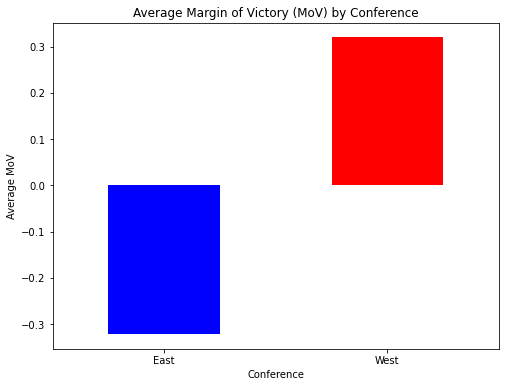

In [72]:
avg_mov_by_conference = df.groupby('conference')['mov'].mean()

# Create a bar graph to visualize the average MoV for Eastern and Western teams
plt.figure(figsize=(8, 6))
avg_mov_by_conference.plot(kind='bar', color=['blue', 'red'])
plt.title('Average Margin of Victory (MoV) by Conference')
plt.xlabel('Conference')
plt.ylabel('Average MoV')
plt.xticks(rotation=0)
plt.show()

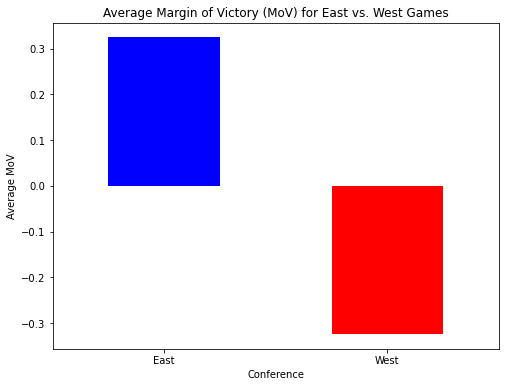

In [73]:
# Filter the DataFrame to include games where an East team plays a West team
east_vs_west_df = df[df['team'].isin(east_teams + west_teams)]

# Group the filtered data by the conference of the opponent
avg_mov_by_conference = east_vs_west_df.groupby('opponent_conference')['mov'].mean()

# Create a bar graph to visualize the average MoV for Eastern vs. Western teams
plt.figure(figsize=(8, 6))
avg_mov_by_conference.plot(kind='bar', color=['blue', 'red'])
plt.title('Average Margin of Victory (MoV) for East vs. West Games')
plt.xlabel('Conference')
plt.ylabel('Average MoV')
plt.xticks(rotation=0)
plt.show()


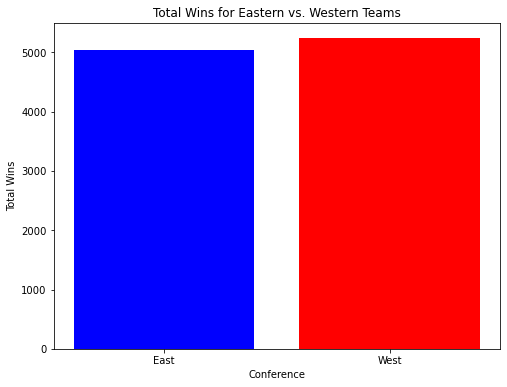

In [74]:
east_total_wins = df[df['conference'] == 'East']['won'].sum()
west_total_wins = df[df['conference'] == 'West']['won'].sum()

plt.figure(figsize=(8, 6))
plt.bar(['East', 'West'], [east_total_wins, west_total_wins], color=['blue', 'red'])
plt.title('Total Wins for Eastern vs. Western Teams')
plt.xlabel('Conference')
plt.ylabel('Total Wins')
plt.show()

In [75]:
correlation_matrix = year2024_mean.corr()
correlation_with_margin_of_victory = correlation_matrix['mov'].sort_values(ascending=False)
correlation_with_margin_of_victory

mov             1.000000
+/-_max         0.835532
won             0.826448
drtg_max_opp    0.778188
ortg            0.743919
                  ...   
drb_opp        -0.744170
+/-_max_opp    -0.828293
usg%                 NaN
usg%_opp             NaN
season               NaN
Name: mov, Length: 140, dtype: float64

/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


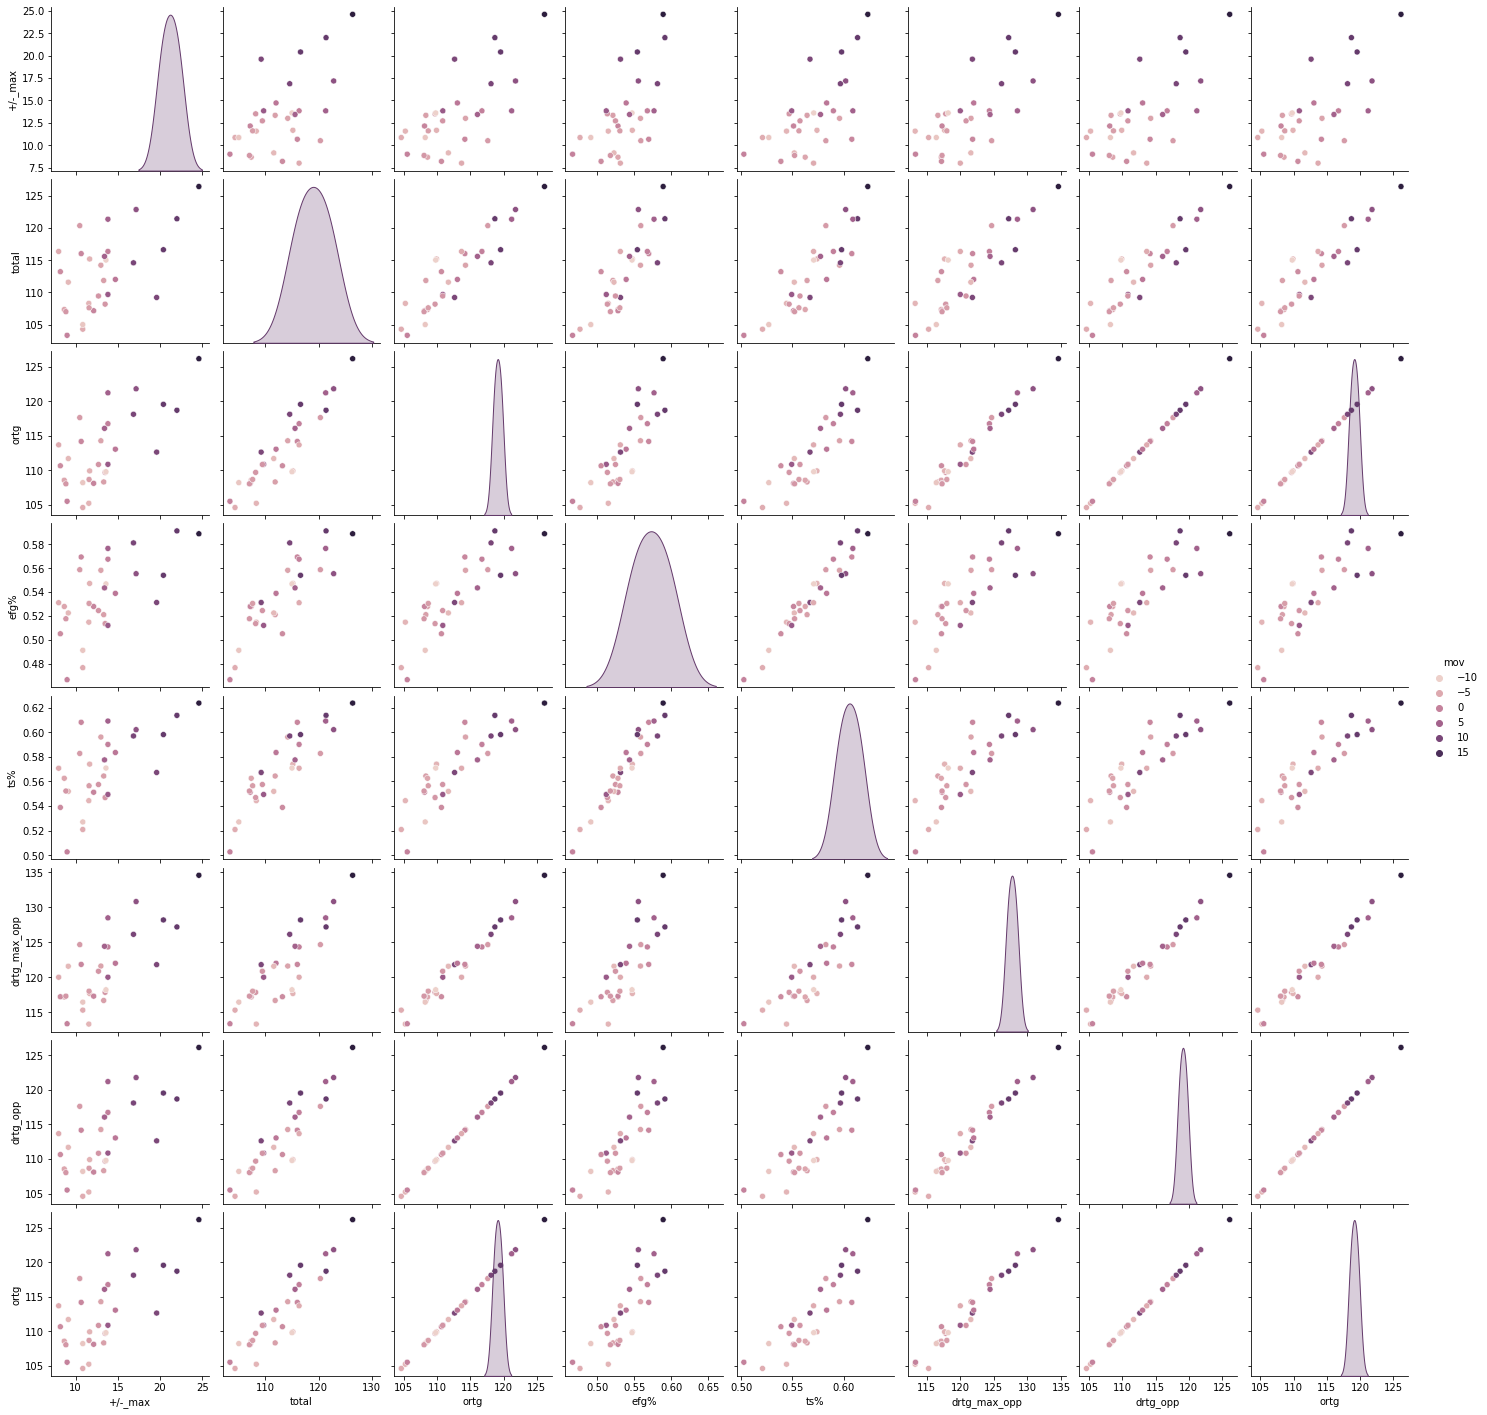

In [76]:
sns.pairplot(year2024_mean, vars=['+/-_max', 'total', 'ortg', 'efg%', 'ts%', 'drtg_max_opp', 'drtg_opp', 'ortg'], hue='mov')
plt.show()

In [77]:
correlation_matrix = avg_data.corr()
correlation_with_margin_of_victory = correlation_matrix['mov'].sort_values(ascending=False)
correlation_with_margin_of_victory

mov            1.000000
mov_next       0.999939
won            0.978688
+/-_max        0.968388
drtg_opp       0.821596
                 ...   
drtg          -0.700157
ortg_opp      -0.700157
+/-_max_opp   -0.986420
usg%                NaN
usg%_opp            NaN
Name: mov, Length: 140, dtype: float64

/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


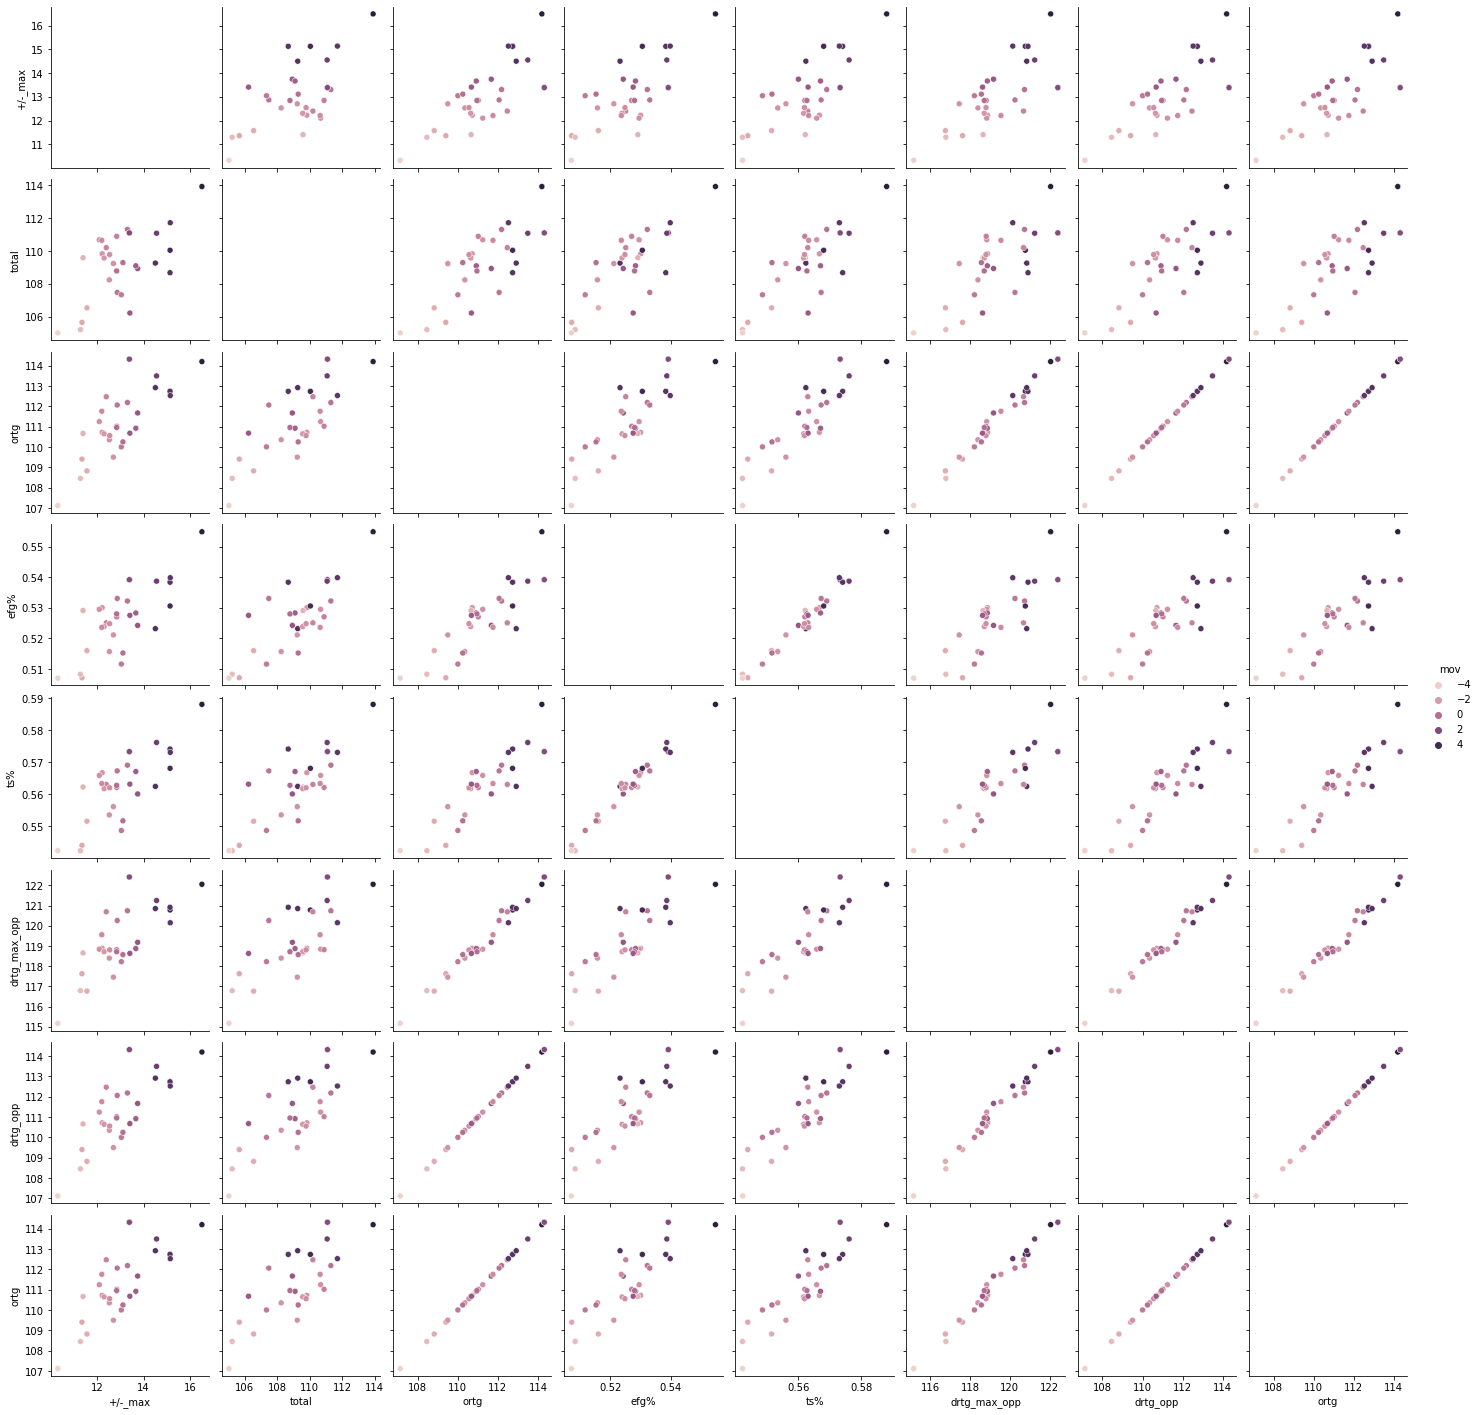

In [78]:
sns.pairplot(avg_data, vars=['+/-_max', 'total', 'ortg', 'efg%', 'ts%', 'drtg_max_opp', 'drtg_opp', 'ortg'], hue='mov')
plt.show()

In [79]:
correlation_matrix = df.corr()
correlation_with_margin_of_victory = correlation_matrix['mov'].sort_values(ascending=False)
correlation_with_margin_of_victory

mov            1.000000
+/-_max        0.828086
won            0.804774
ortg           0.629954
drtg_opp       0.629954
                 ...   
drtg          -0.629917
ortg_opp      -0.629917
+/-_max_opp   -0.828095
usg%                NaN
usg%_opp            NaN
Name: mov, Length: 140, dtype: float64

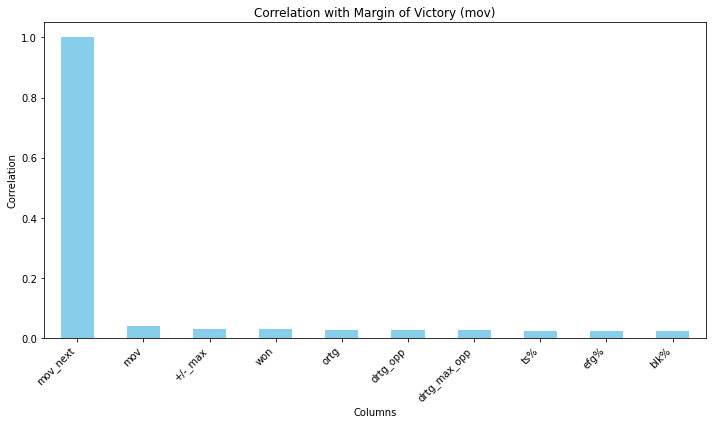

In [80]:
correlation_matrix = df.corr()
correlation_with_mov = correlation_matrix['mov_next'].sort_values(ascending=False)
correlation_with_mov=correlation_with_mov.head(10)
# Plotting the bar graph
plt.figure(figsize=(10, 6))
correlation_with_mov.plot(kind='bar', color='skyblue')
plt.title('Correlation with Margin of Victory (mov)')
plt.xlabel('Columns')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

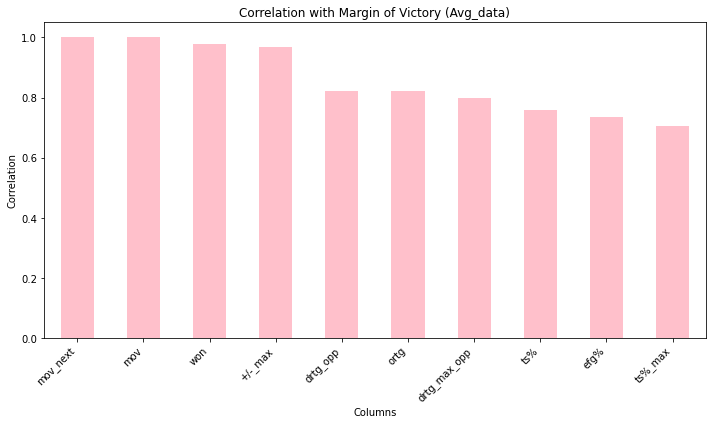

In [81]:
correlation_matrix = avg_data.corr()
correlation_with_mov = correlation_matrix['mov_next'].sort_values(ascending=False)
correlation_with_mov=correlation_with_mov.head(10)
# Plotting the bar graph
plt.figure(figsize=(10, 6))
correlation_with_mov.plot(kind='bar', color='Pink')
plt.title('Correlation with Margin of Victory (Avg_data)')
plt.xlabel('Columns')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/buckschaser/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


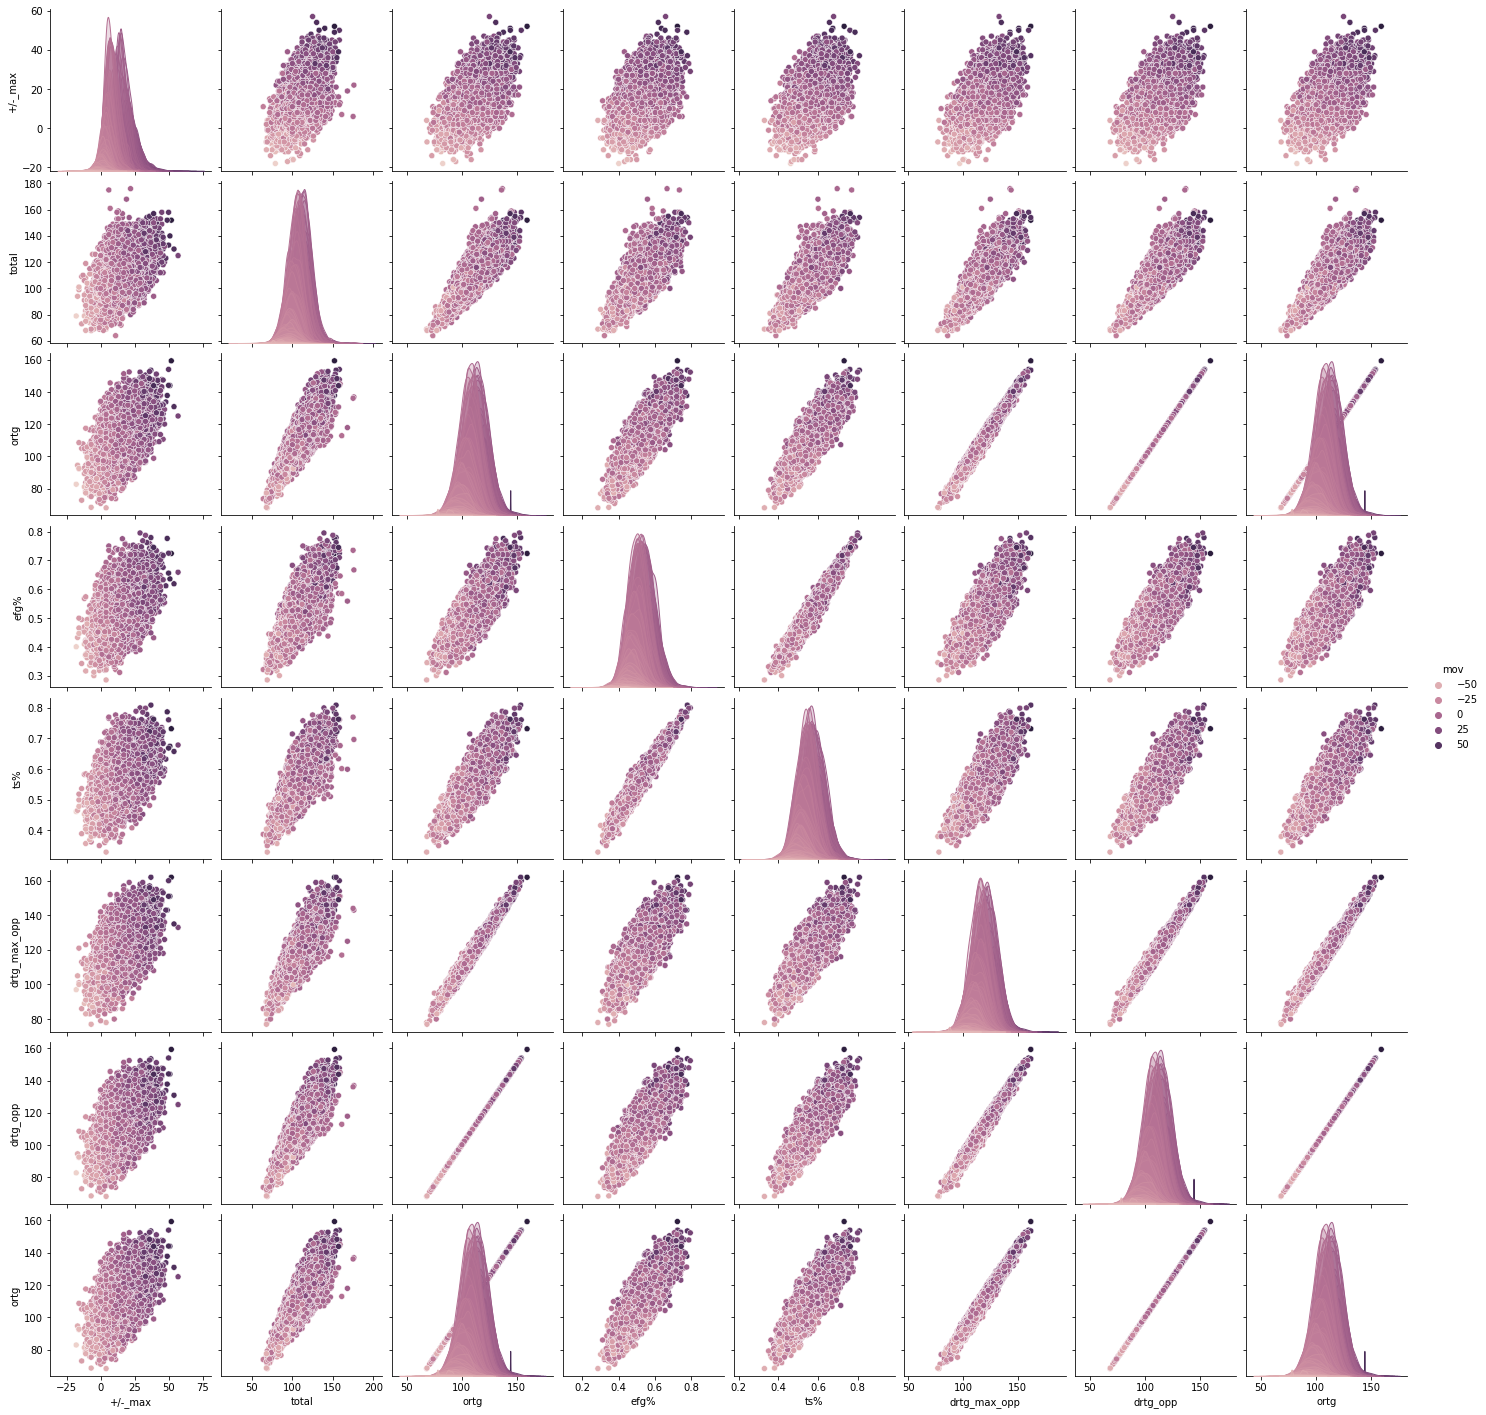

In [82]:
sns.pairplot(df, vars=['+/-_max', 'total', 'ortg', 'efg%', 'ts%', 'drtg_max_opp', 'drtg_opp', 'ortg'], hue='mov')
plt.show()

# random forests
## baseline model
Evaluate the model's performance on the testing set using appropriate regression metrics. Common metrics include Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2).

In [83]:
rows_with_nulls.drop(['team_opp', 'date', 'mov_next', 'won'], axis=1, inplace=True)

In [84]:
X= df.drop(['team', 'team_opp', 'date', 'conference', 'opponent_conference', 'won', 'mov_next'], axis=1)
y = df['mov_next']

In [85]:
X2= avg_data.drop(['mov_next'], axis=1)
y2 = avg_data['mov_next']

In [86]:
# Data preparation: X contains historical features, y contains historical MoV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model selection and training
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [87]:
pred=rf_regressor.predict(rows_with_nulls)

print("Predicted MoV for the next game:", pred)

Predicted MoV for the next game: [ 0.67  1.48  0.43  0.94  1.46  0.49 -4.52  2.1  -0.86 -2.1  -2.71  0.2
 -2.23 -1.53 -5.15 -1.86  0.5  -2.22 -0.52 -1.06 -0.17 -2.25 -1.1   0.46
 -0.51 -0.29 -2.3   1.22  1.19  0.12]


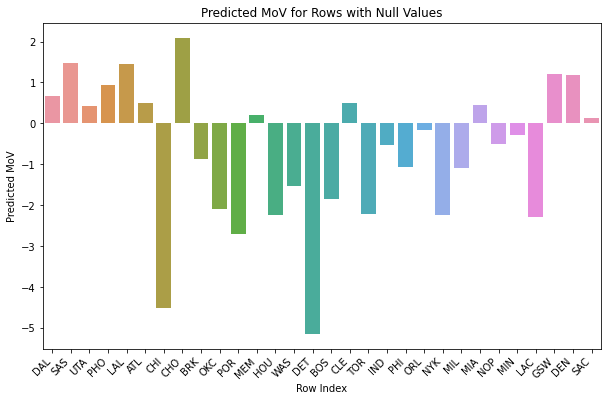

In [88]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.barplot(x=rows_with_nulls.index, y=pred)
plt.xlabel('Row Index')
plt.ylabel('Predicted MoV')
plt.title('Predicted MoV for Rows with Null Values')

# Tilt the x-axis ticks
plt.xticks(rotation=45, ha='right')  # Adjust the rotation angle if needed

plt.show()

In [89]:
# Predictions for the next game: Replace 'new_game_data' with relevant features
new_game_data = X_train
predicted_mov = rf_regressor.predict(new_game_data)

print("Predicted MoV for the next game:", predicted_mov)

Predicted MoV for the next game: [  8.61  -2.82 -10.9  ...  -6.85  14.3    6.97]


* MAE: In general, the lower the MAE, the better the model predicts
* MSE: the lower the value the better and 0 means the model is perfect
* RMSE: Based on a rule of thumb, it can be said that RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately.

In [90]:
y_pred = rf_regressor.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 4.327570872368901
Mean Squared Error (MSE): 29.69533494950724
Root Mean Squared Error (RMSE): 5.4493426162709975


In [91]:
feature_importances = rf_regressor.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the features by importance in descending order
sorted_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(sorted_feature_importance_df)

Feature Importances:
          Feature  Importance
59       ast%_max    0.015768
63       usg%_max    0.015607
127  ast%_max_opp    0.014591
56       orb%_max    0.014422
131  usg%_max_opp    0.014408
..            ...         ...
67           home    0.000796
0              mp    0.000204
68         mp_opp    0.000196
30           usg%    0.000000
98       usg%_opp    0.000000

[138 rows x 2 columns]


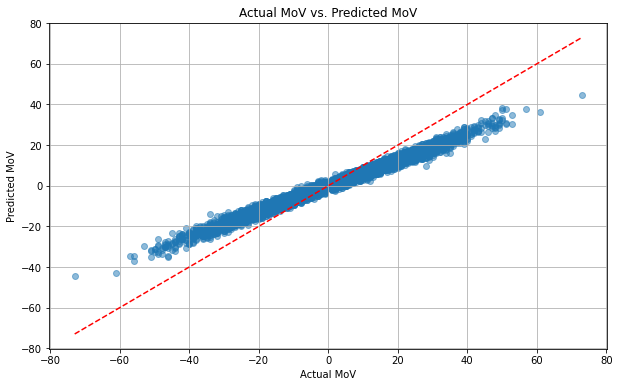

In [92]:
predicted_mov
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_train, predicted_mov, alpha=0.5)
plt.xlabel("Actual MoV")
plt.ylabel("Predicted MoV")
plt.title("Actual MoV vs. Predicted MoV")
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red')

plt.show()

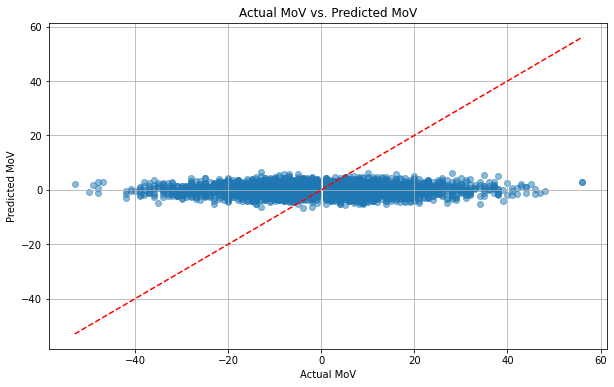

In [93]:
predicted_mov = rf_regressor.predict(X_test)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicted_mov, alpha=0.5)
plt.xlabel("Actual MoV")
plt.ylabel("Predicted MoV")
plt.title("Actual MoV vs. Predicted MoV")
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')

plt.show()

In [94]:
importance_scores = rf_regressor.feature_importances_
importance_scores

array([0.00020396, 0.00557224, 0.00798657, 0.00845544, 0.00579069,
       0.0075136 , 0.01385514, 0.00589328, 0.00508376, 0.01342704,
       0.00446229, 0.00690067, 0.00683036, 0.00716542, 0.00334319,
       0.00394187, 0.00428295, 0.00779882, 0.00414418, 0.00739148,
       0.00685457, 0.01208203, 0.00975637, 0.00610143, 0.00608145,
       0.00571249, 0.01297609, 0.01063905, 0.01267243, 0.00996938,
       0.        , 0.00509583, 0.00457797, 0.00534398, 0.00756559,
       0.00562114, 0.00375928, 0.00580935, 0.00474636, 0.00505112,
       0.00536816, 0.0011823 , 0.0039246 , 0.00592817, 0.00619086,
       0.00595167, 0.00301892, 0.0031176 , 0.00402634, 0.00319912,
       0.00828329, 0.00967752, 0.00871309, 0.00573318, 0.00676145,
       0.01036708, 0.01442155, 0.0138414 , 0.01326872, 0.01576771,
       0.01279997, 0.01329768, 0.01093589, 0.01560669, 0.01211904,
       0.00554284, 0.00423095, 0.0007957 , 0.0001955 , 0.0059173 ,
       0.00821999, 0.00841204, 0.00543687, 0.00674093, 0.01231

### lets run the same thing with our avg data 

In [95]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [96]:
rf_regressor.fit(X_train2, y_train2)

y_pred2 = rf_regressor.predict(X_train2)
mae2 = mean_absolute_error(y_train2, y_pred2)
mse2 = mean_squared_error(y_train2, y_pred2)
rmse2 = np.sqrt(mse)


print("Mean Absolute Error (MAE2):", mae2)
print("Mean Squared Error (MSE2):", mse2)
print("Root Mean Squared Error (RMSE2):", rmse2)

Mean Absolute Error (MAE2): 0.2500438695684039
Mean Squared Error (MSE2): 0.11759272217401433
Root Mean Squared Error (RMSE2): 5.4493426162709975


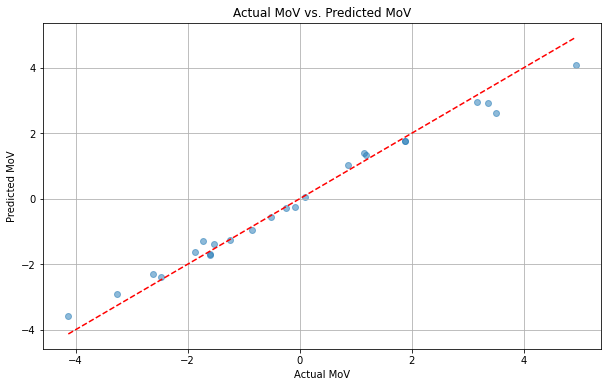

In [97]:
y_pred2
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_train2, y_pred2, alpha=0.5)
plt.xlabel("Actual MoV")
plt.ylabel("Predicted MoV")
plt.title("Actual MoV vs. Predicted MoV")
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_train2), max(y_train2)], [min(y_train2), max(y_train2)], linestyle='--', color='red')

plt.show()

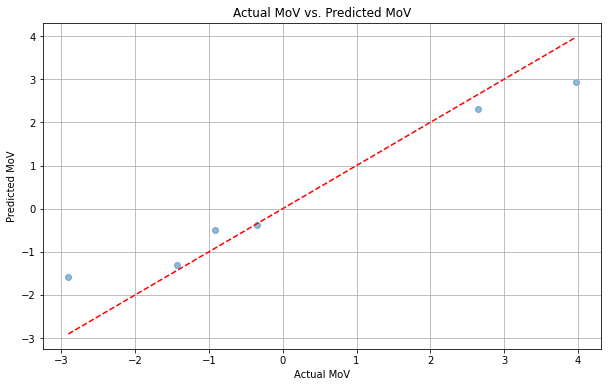

In [98]:
predicted_mov = rf_regressor.predict(X_test2)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test2, predicted_mov, alpha=0.5)
plt.xlabel("Actual MoV")
plt.ylabel("Predicted MoV")
plt.title("Actual MoV vs. Predicted MoV")
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test2), max(y_test2)], [min(y_test2), max(y_test2)], linestyle='--', color='red')

plt.show()

# XGB boost

In [99]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

In [100]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [101]:
y_predX = xgb_model.predict(X_train)
y_predX

array([ 4.876879 , -2.3238819, -7.3944263, ..., -7.628791 , 12.59645  ,
        3.9950864], dtype=float32)

In [102]:
y_predX2 = xgb_model.predict(rows_with_nulls)
print("Predicted MoV for the next game:", y_predX2)

Predicted MoV for the next game: [  1.5896705    7.234288    -1.0187304    6.075317    -6.50913
   0.2624419   -2.0078762   -1.3972954    2.0952241   -0.5090811
   3.0509286    3.6273506    1.6850085    3.1499534   -2.4438417
  13.592485    -2.3538632  -10.731728     1.6926798    3.407093
  -1.1757715    5.454809    -1.682895     0.9960835   -5.776748
  -4.5646214   -6.134257     7.1377215    0.40116084  -0.96570253]


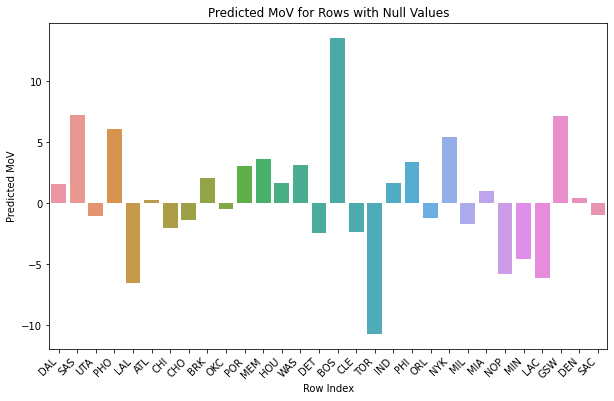

In [103]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.barplot(x=rows_with_nulls.index, y=y_predX2)
plt.xlabel('Row Index')
plt.ylabel('Predicted MoV')
plt.title('Predicted MoV for Rows with Null Values')

# Tilt the x-axis ticks
plt.xticks(rotation=45, ha='right')  # Adjust the rotation angle if needed

plt.show()

In [104]:
mseX = mean_squared_error(y_train, y_predX)

In [105]:
maeX = mean_absolute_error(y_train, y_predX)

rmseX = np.sqrt(mseX)

In [106]:
print("Mean Absolute Error (MAE):", maeX)
print("Mean Squared Error (MSE):", mseX)
print("Root Mean Squared Error (RMSE):", rmseX)

Mean Absolute Error (MAE): 6.541342475993281
Mean Squared Error (MSE): 71.74380015123036
Root Mean Squared Error (RMSE): 8.470171199641149


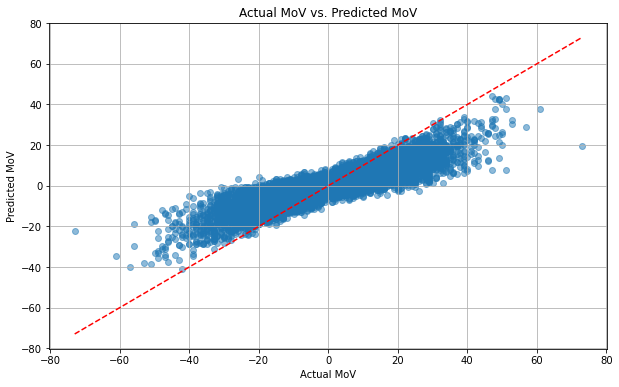

In [107]:
predicted_movX= xgb_model.predict(X_train)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_train, predicted_movX, alpha=0.5)
plt.xlabel("Actual MoV")
plt.ylabel("Predicted MoV")
plt.title("Actual MoV vs. Predicted MoV")
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red')

plt.show()

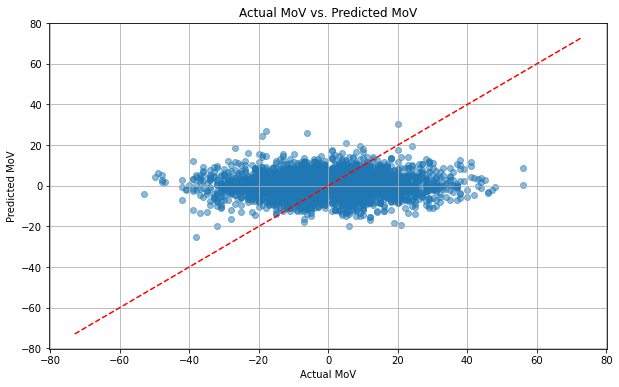

In [108]:
predicted_movX_test= xgb_model.predict(X_test)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicted_movX_test, alpha=0.5)
plt.xlabel("Actual MoV")
plt.ylabel("Predicted MoV")
plt.title("Actual MoV vs. Predicted MoV")
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red')

plt.show()

In [109]:
importance_scores = xgb_model.feature_importances_
importance_scores

array([0.00035293, 0.00143174, 0.00302117, 0.00406334, 0.00252414,
       0.00599333, 0.00606223, 0.00357799, 0.00631112, 0.00638652,
       0.00642695, 0.00496901, 0.00732501, 0.0081244 , 0.00377206,
       0.0061093 , 0.00653339, 0.00657512, 0.00932721, 0.00854369,
       0.00743401, 0.0082065 , 0.00760328, 0.00839339, 0.00795829,
       0.00960997, 0.00850786, 0.00822142, 0.00886519, 0.0086351 ,
       0.        , 0.00932101, 0.00735136, 0.00709891, 0.00892354,
       0.00695261, 0.00731771, 0.00898779, 0.00672876, 0.00678199,
       0.00707883, 0.00837679, 0.00601306, 0.00642942, 0.00874075,
       0.00871877, 0.00761196, 0.00806435, 0.00698782, 0.00919893,
       0.00832673, 0.00773192, 0.00904906, 0.00933984, 0.00749   ,
       0.00747334, 0.00782384, 0.00773859, 0.00950838, 0.00900557,
       0.00803412, 0.00928664, 0.0091818 , 0.00841159, 0.00765634,
       0.00968685, 0.        , 0.00592589, 0.        , 0.01015012,
       0.01038647, 0.0082009 , 0.00775819, 0.0082983 , 0.00794

### lets do the same with the avg data 

In [110]:
xgb_model.fit(X_train2, y_train2)
y_predX2 = xgb_model.predict(X_train2)
y_predX2

array([-1.597744  ,  0.08810574,  3.3634999 , -1.7213955 , -1.6000826 ,
        1.1911066 ,  1.8872422 , -0.5161159 , -1.5383797 , -0.08636475,
       -2.480616  ,  4.928673  ,  1.1413512 , -0.25039375,  0.86574394,
       -1.24917   , -1.8676267 ,  3.174985  , -0.8421477 ,  1.8872422 ,
       -2.6205192 ,  3.5130048 , -4.13087   , -3.2687714 ], dtype=float32)

In [111]:
mseX2 = mean_squared_error(y_train2, y_predX2)
maeX2 = mean_absolute_error(y_train2, y_predX2)
rmseX2 = np.sqrt(mseX2)

print("Mean Absolute Error (MAE):", maeX2)
print("Mean Squared Error (MSE):", mseX2)
print("Root Mean Squared Error (RMSE):", rmseX2)

Mean Absolute Error (MAE): 0.00021086187580679773
Mean Squared Error (MSE): 1.434503282262193e-07
Root Mean Squared Error (RMSE): 0.0003787483705921641


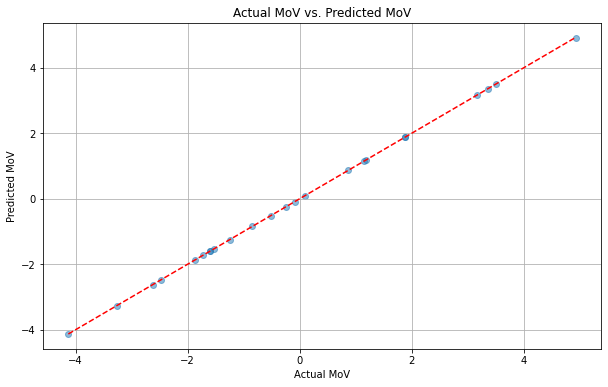

In [112]:
predicted_movX= xgb_model.predict(X_train2)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_train2, predicted_movX, alpha=0.5)
plt.xlabel("Actual MoV")
plt.ylabel("Predicted MoV")
plt.title("Actual MoV vs. Predicted MoV")
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_train2), max(y_train2)], [min(y_train2), max(y_train2)], linestyle='--', color='red')

plt.show()

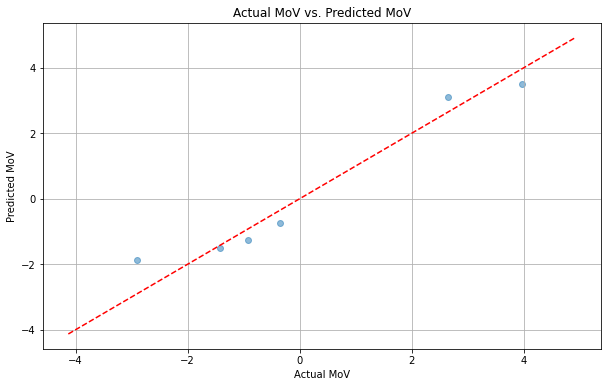

In [113]:
predicted_movX_test= xgb_model.predict(X_test2)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test2, predicted_movX_test, alpha=0.5)
plt.xlabel("Actual MoV")
plt.ylabel("Predicted MoV")
plt.title("Actual MoV vs. Predicted MoV")
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_train2), max(y_train2)], [min(y_train2), max(y_train2)], linestyle='--', color='red')

plt.show()

In [114]:
importance_scores = xgb_model.feature_importances_
importance_scores

array([4.75977111e-04, 7.14266486e-03, 2.62536458e-04, 2.99055337e-05,
       6.20566718e-02, 0.00000000e+00, 9.83999826e-07, 2.89867586e-07,
       0.00000000e+00, 1.19211441e-02, 2.31096237e-07, 8.09065398e-07,
       0.00000000e+00, 0.00000000e+00, 8.55045766e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.99181778e-03, 0.00000000e+00,
       5.72649128e-07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.42897333e-04, 0.00000000e+00, 4.24312311e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.50479877e-02,
       2.31629722e-02, 0.00000000e+00, 0.00000000e+00, 3.95673896e-06,
       0.00000000e+00, 1.00861058e-07, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.60714193e-06, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.57832718e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.26087201e-07,
      

# XG boost prevent data leakage 

In [115]:
params = {
    'objective': 'reg:squarederror',
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100
}

model = xgb.XGBRegressor(**params)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [116]:
y_predX22 = model.predict(X_test)

In [117]:
y_predX2 = model.predict(X_train)
mseX2 = mean_squared_error(y_train, y_predX2)
maeX2 = mean_absolute_error(y_train, y_predX2)

rmseX2 = np.sqrt(mseX2)
print(f"Mean Squared Error: {mseX2}")

Mean Squared Error: 195.67926453683782


In [118]:
print("Mean Absolute Error (MAE):", maeX2)
print("Mean Squared Error (MSE):", mseX2)
print("Root Mean Squared Error (RMSE):", rmseX2)

Mean Absolute Error (MAE): 11.250595830222277
Mean Squared Error (MSE): 195.67926453683782
Root Mean Squared Error (RMSE): 13.988540472001995


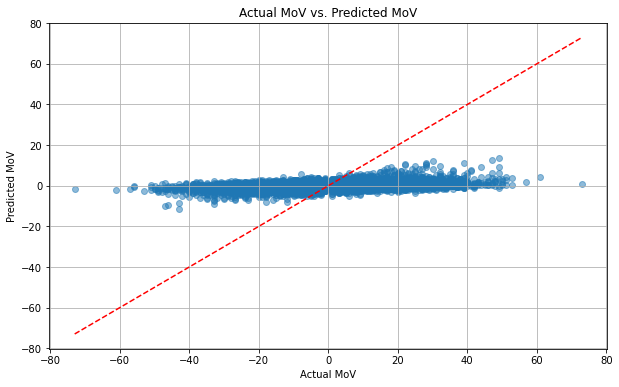

In [119]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_predX2, alpha=0.5)
plt.xlabel("Actual MoV")
plt.ylabel("Predicted MoV")
plt.title("Actual MoV vs. Predicted MoV")
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red')

plt.show()

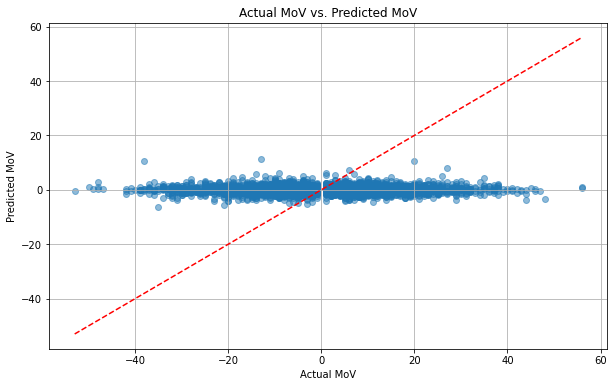

In [120]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predX22, alpha=0.5)
plt.xlabel("Actual MoV")
plt.ylabel("Predicted MoV")
plt.title("Actual MoV vs. Predicted MoV")
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')

plt.show()

In [121]:
importance_scores = model.feature_importances_
importance_scores

array([0.00018069, 0.00204556, 0.00451798, 0.00484289, 0.0075647 ,
       0.0094221 , 0.00852059, 0.00262654, 0.00348694, 0.00654382,
       0.00948203, 0.00512621, 0.01162897, 0.00909252, 0.00529245,
       0.        , 0.        , 0.00354681, 0.01109789, 0.00846471,
       0.01034408, 0.00636787, 0.00705919, 0.0064649 , 0.00755277,
       0.01269729, 0.00708169, 0.00574192, 0.00673902, 0.00600577,
       0.        , 0.01145339, 0.01014294, 0.00960174, 0.0141124 ,
       0.00498639, 0.01200781, 0.00765462, 0.        , 0.01031704,
       0.00056915, 0.00686204, 0.01157457, 0.        , 0.00950812,
       0.01148295, 0.        , 0.00660793, 0.00710382, 0.01141212,
       0.00703938, 0.00639984, 0.00862793, 0.01129374, 0.0088733 ,
       0.00932681, 0.00950321, 0.00153556, 0.01092645, 0.00852638,
       0.00676047, 0.00945136, 0.0059425 , 0.0103398 , 0.00737807,
       0.01243477, 0.        , 0.00912318, 0.        , 0.01071439,
       0.00742507, 0.00470159, 0.00797734, 0.00954537, 0.00989

### once again we will do the same with the avg data 

In [122]:
model.fit(X_train2, y_train2)

y_predX2 = model.predict(X_train2)
mseX2 = mean_squared_error(y_train2, y_predX2)
maeX2 = mean_absolute_error(y_train2, y_predX2)
print("Mean Absolute Error (MAE):", maeX2)
print("Mean Squared Error (MSE):", mseX2)
print("Root Mean Squared Error (RMSE):", rmseX2)

Mean Absolute Error (MAE): 0.0036716604495134943
Mean Squared Error (MSE): 6.611782225660925e-05
Root Mean Squared Error (RMSE): 13.988540472001995


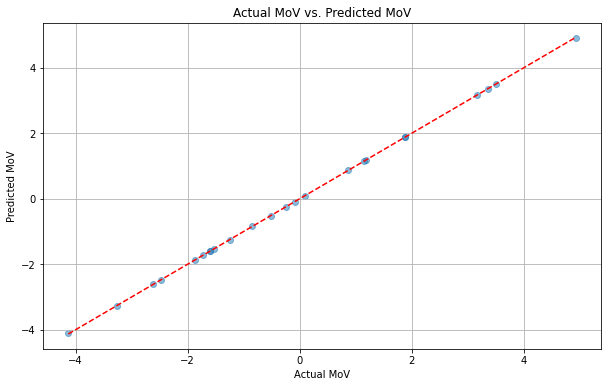

In [123]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train2, y_predX2, alpha=0.5)
plt.xlabel("Actual MoV")
plt.ylabel("Predicted MoV")
plt.title("Actual MoV vs. Predicted MoV")
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_train2), max(y_train2)], [min(y_train2), max(y_train2)], linestyle='--', color='red')

plt.show()

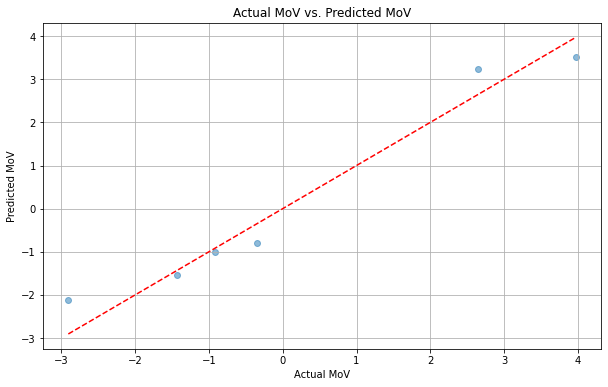

In [124]:
yg=model.predict(X_test2)
plt.figure(figsize=(10, 6))
plt.scatter(y_test2, yg, alpha=0.5)
plt.xlabel("Actual MoV")
plt.ylabel("Predicted MoV")
plt.title("Actual MoV vs. Predicted MoV")
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test2), max(y_test2)], [min(y_test2), max(y_test2)], linestyle='--', color='red')

plt.show()

# Pipeline with XGboost

In [125]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize your features
    ('xgb', xgb.XGBRegressor(  # XGBoost as the final estimator
        learning_rate=0.1,
        n_estimators=100
    ))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions
y_predpipe = pipeline.predict(X_test)

# Evaluate the model
msepipe = mean_squared_error(y_test, y_predpipe)
print("Mean Squared Error on Test Set:", msepipe)

Mean Squared Error on Test Set: 212.25466748470555


In [126]:

# Calculate Mean Absolute Error (MAE)
maepipe = mean_absolute_error(y_test, y_predpipe)

# Calculate Mean Squared Error (MSE)
msepipe = mean_squared_error(y_test, y_predpipe)

# Calculate Root Mean Squared Error (RMSE)
rmsepipe = np.sqrt(msepipe)
print("Mean Squared Error on Test Set:", msepipe)
print("Mean Absolute Error (MAE):", maepipe)
print("Mean Squared Error (MSE):", msepipe)
print("Root Mean Squared Error (RMSE):", rmsepipe)

Mean Squared Error on Test Set: 212.25466748470555
Mean Absolute Error (MAE): 11.616958127629438
Mean Squared Error (MSE): 212.25466748470555
Root Mean Squared Error (RMSE): 14.568962471113224


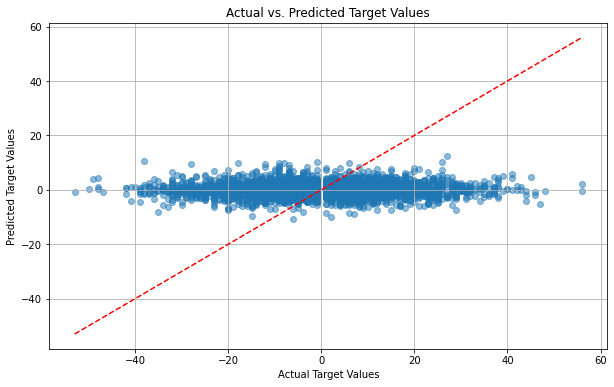

In [127]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predpipe, alpha=0.5)
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values")
plt.title("Actual vs. Predicted Target Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')

plt.grid(True)
plt.show()

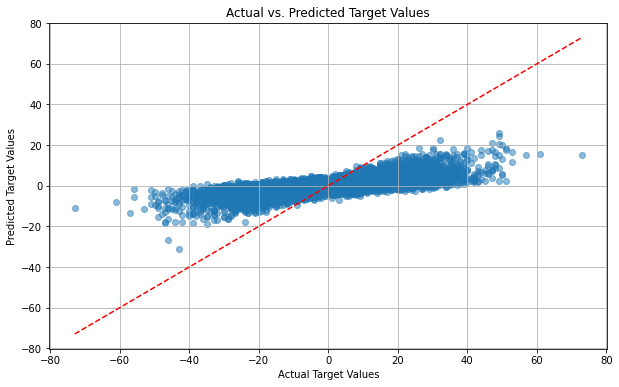

In [128]:
y_predpipe = pipeline.predict(X_train)

plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_predpipe, alpha=0.5)
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values")
plt.title("Actual vs. Predicted Target Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red')

plt.grid(True)
plt.show()

### lets use avg data 

In [129]:
pipeline.fit(X_train2, y_train2)

# Make predictions
y_predpipe2 = pipeline.predict(X_train2)
y_predpipe2

array([-1.5979974 ,  0.08821583,  3.360036  , -1.7208347 , -1.599827  ,
        1.1910654 ,  1.8867923 , -0.5160264 , -1.5381505 , -0.08634514,
       -2.47978   ,  4.9029107 ,  1.1412332 , -0.25028014,  0.86585736,
       -1.2492628 , -1.8669469 ,  3.1746016 , -0.8420347 ,  1.8867923 ,
       -2.6152802 ,  3.506271  , -4.105247  , -3.262372  ], dtype=float32)

In [130]:
maepipe2 = mean_absolute_error(y_train2, y_predpipe2)
msepipe2 = mean_squared_error(y_train2, y_predpipe2)
msepipe2 = mean_squared_error(y_train2, y_predpipe2)
print("Mean Squared Error on Test Set:", msepipe2)
print("Mean Absolute Error (MAE):", maepipe2)
print("Mean Squared Error (MSE):", msepipe2)

Mean Squared Error on Test Set: 6.597166257001752e-05
Mean Absolute Error (MAE): 0.003397004072090777
Mean Squared Error (MSE): 6.597166257001752e-05


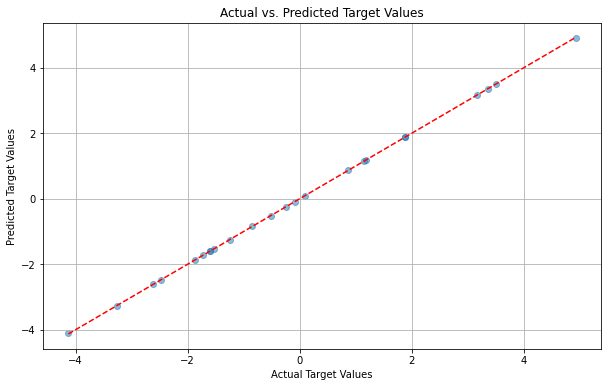

In [131]:
y_predpipe = pipeline.predict(X_train2)

plt.figure(figsize=(10, 6))
plt.scatter(y_train2, y_predpipe, alpha=0.5)
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values")
plt.title("Actual vs. Predicted Target Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_train2), max(y_train2)], [min(y_train2), max(y_train2)], linestyle='--', color='red')

plt.grid(True)
plt.show()

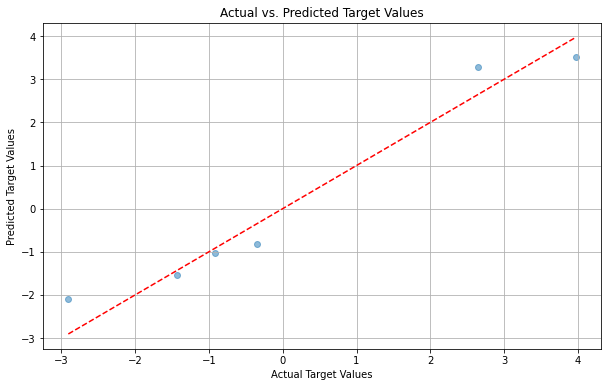

In [132]:
y_predpipe = pipeline.predict(X_test2)

plt.figure(figsize=(10, 6))
plt.scatter(y_test2, y_predpipe, alpha=0.5)
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values")
plt.title("Actual vs. Predicted Target Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test2), max(y_test2)], [min(y_test2), max(y_test2)], linestyle='--', color='red')

plt.grid(True)
plt.show()

# Pipeline with Random forest

In [133]:
preprocessing_steps = [
    ('scaler', StandardScaler()),  # Standardize your features
]

# Create a model pipeline'
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Combine the preprocessing and model into a single pipeline
pipeline = Pipeline(preprocessing_steps + [('model', model)])

# Train your model on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred80 = pipeline.predict(X_test)

In [134]:
mae80 = mean_absolute_error(y_test, y_pred80)

# Calculate Mean Squared Error (MSE)
mse80 = mean_squared_error(y_test, y_pred80)

# Calculate Root Mean Squared Error (RMSE)
rmse80 = np.sqrt(mse80)

print("Mean Absolute Error (MAE):", mae80)
print("Mean Squared Error (MSE):", mse80)
print("Root Mean Squared Error (RMSE):", rmse80)

Mean Absolute Error (MAE): 11.62756204379562
Mean Squared Error (MSE): 210.81368150851583
Root Mean Squared Error (RMSE): 14.519424282956809


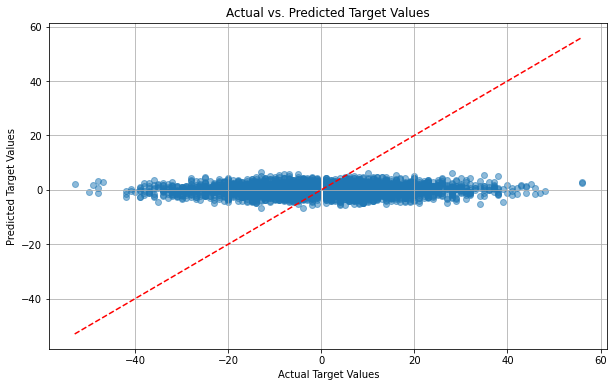

In [135]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred80, alpha=0.5)
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values")
plt.title("Actual vs. Predicted Target Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')

plt.grid(True)
plt.show()

# win classification 

In [136]:
def add_target(group):
    group["target"] = group["won"].shift(-1)
    return group

df = df.groupby("team", group_keys=False).apply(add_target)

In [137]:
df["target"][pd.isnull(df["target"])] = 2
df["target"] = df["target"].astype(int, errors="ignore")

<ipython-input-137-ac49a6f40115>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["target"][pd.isnull(df["target"])] = 2


In [138]:
from sklearn.linear_model import RidgeClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import TimeSeriesSplit
r = RidgeClassifier(alpha=1)

split = TimeSeriesSplit(n_splits=3)

sfs = SequentialFeatureSelector(r, 
                                n_features_to_select=30, 
                                direction="forward",
                                cv=split,
                                n_jobs=1
                               )

In [139]:
df

mp    fg    fga    fg%    3p   3pa    3p%    ft   fta    ft%   orb  \
0      240.0  39.0   81.0  0.481   6.0  20.0  0.300  14.0  18.0  0.778   6.0   
1      240.0  36.0  100.0  0.360   7.0  31.0  0.226  16.0  19.0  0.842  20.0   
2      240.0  37.0   85.0  0.435   8.0  19.0  0.421  17.0  23.0  0.739  11.0   
3      240.0  41.0   89.0  0.461   8.0  21.0  0.381  17.0  19.0  0.895  12.0   
4      240.0  27.0   86.0  0.314   6.0  26.0  0.231  15.0  20.0  0.750  12.0   
...      ...   ...    ...    ...   ...   ...    ...   ...   ...    ...   ...   
20575  240.0  46.0   88.0  0.523  14.0  38.0  0.368  25.0  29.0  0.862   8.0   
20577  240.0  42.0   82.0  0.512  14.0  29.0  0.483  21.0  23.0  0.913  11.0   
20580  240.0  44.0   81.0  0.543  14.0  34.0  0.412  17.0  20.0  0.850   6.0   
20587  240.0  40.0   78.0  0.513  10.0  31.0  0.323  18.0  20.0  0.900   9.0   
20588  265.0  38.0   91.0  0.418  11.0  35.0  0.314  27.0  34.0  0.794   9.0   

        drb   trb   ast   stl   blk   tov    pf    pts    ts%   efg%   3par  \
0      41.0  47.0  26.0   7.0   7.0  14.0  19.0   98.0  0.551  0.519  0.247   
1      31.0  51.0  18.0   7.0   3.0   9.0  15.0   95.0  0.438  0.395  0.310   
2      31.0  42.0  23.0   7.0   4.0  13.0  16.0   99.0  0.520  0.482  0.224   
3      38.0  50.0  22.0   8.0  11.0  11.0  18.0  107.0  0.550  0.506  0.236   
4      44.0  56.0  16.0   4.0   6.0  20.0  19.0   75.0  0.396  0.349  0.302   
...     ...   ...   ...   ...   ...   ...   ...    ...    ...    ...    ...   
20575  28.0  36.0  28.0  10.0   4.0  11.0  20.0  131.0  0.650  0.602  0.432   
20577  35.0  46.0  22.0   7.0   4.0  16.0  20.0  119.0  0.646  0.598  0.354   
20580  30.0  36.0  28.0   6.0   6.0  14.0  14.0  119.0  0.663  0.630  0.420   
20587  34.0  43.0  28.0   7.0   4.0  18.0  22.0  108.0  0.622  0.577  0.397   
20588  49.0  58.0  21.0   7.0   4.0  17.0  24.0  114.0  0.538  0.478  0.385   

         ftr  orb%  drb%  trb%  ast%  stl%  blk%  tov%   usg%   ortg   drtg  \
0      0.222  16.2  67.2  48.0  66.7   7.4  10.1  13.6  100.0  103.7  100.5   
1      0.190  32.8  83.8  52.0  50.0   7.4   4.9   7.7  100.0  100.5  103.7   
2      0.271  22.4  72.1  45.7  62.2   7.4   5.9  12.0  100.0  104.8  113.3   
3      0.213  27.9  77.6  54.3  53.7   8.5  16.7  10.2  100.0  113.3  104.8   
4      0.233  22.2  74.6  49.6  59.3   4.1  10.0  17.4  100.0   76.7   94.0   
...      ...   ...   ...   ...   ...   ...   ...   ...    ...    ...    ...   
20575  0.330  20.5  77.8  48.0  60.9  10.0   8.7   9.8  100.0  131.5  130.5   
20577  0.280  29.7  81.4  57.5  52.4   7.3   9.3  14.8  100.0  124.8  120.6   
20580  0.247  18.2  71.4  48.0  63.6   6.2  11.1  13.5  100.0  123.8  131.1   
20587  0.256  29.0  82.9  59.7  70.0   7.6   8.3  17.2  100.0  116.7  106.9   
20588  0.374  17.3  83.1  52.3  55.3   6.2   7.1  13.8  100.0  100.2  104.6   

       fg_max  fga_max  fg%_max  3p_max  3pa_max  3p%_max  ft_max  fta_max  \
0         7.0     13.0    0.667     2.0      6.0    1.000     6.0      9.0   
1         8.0     20.0    1.000     2.0      8.0    0.500     6.0      7.0   
2         9.0     15.0    0.643     4.0      6.0    0.667     4.0      9.0   
3         9.0     21.0    0.875     3.0      7.0    1.000     6.0      7.0   
4         7.0     14.0    0.667     2.0      5.0    0.667     5.0      6.0   
...       ...      ...      ...     ...      ...      ...     ...      ...   
20575    11.0     17.0    0.667     5.0     12.0    1.000    10.0     10.0   
20577    12.0     16.0    0.750     5.0      7.0    1.000     8.0      9.0   
20580     8.0     16.0    0.800     5.0      9.0    1.000     6.0      7.0   
20587    10.0     17.0    0.833     4.0      9.0    0.500    12.0     12.0   
20588     8.0     21.0    0.800     5.0     12.0    0.500     9.0     10.0   

       ft%_max  orb_max  drb_max  trb_max  ast_max  stl_max  blk_max  tov_max  \
0          1.0      2.0      9.0     11.0      6.0      3.0      2.0      4.0   
1          1.0      7.0     10.0     17.0      6.0  

In [140]:
removed_columns = ["season", "date", "won", "target", "team", "team_opp",'conference', 'opponent_conference']
selected_columns = df.columns[~df.columns.isin(removed_columns)]

In [141]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[selected_columns] = scaler.fit_transform(df[selected_columns])

In [142]:
df

mp        fg       fga       fg%        3p       3pa       3p%  \
0      0.00  0.434783  0.308824  0.507177  0.206897  0.242424  0.356295   
1      0.00  0.369565  0.588235  0.217703  0.241379  0.409091  0.268409   
2      0.00  0.391304  0.367647  0.397129  0.275862  0.227273  0.500000   
3      0.00  0.478261  0.426471  0.459330  0.275862  0.257576  0.452494   
4      0.00  0.173913  0.382353  0.107656  0.206897  0.333333  0.274347   
...     ...       ...       ...       ...       ...       ...       ...   
20575  0.00  0.586957  0.411765  0.607656  0.482759  0.515152  0.437055   
20577  0.00  0.500000  0.323529  0.581340  0.482759  0.378788  0.573634   
20580  0.00  0.543478  0.308824  0.655502  0.482759  0.454545  0.489311   
20587  0.00  0.456522  0.264706  0.583732  0.344828  0.409091  0.383610   
20588  0.25  0.413043  0.455882  0.356459  0.379310  0.469697  0.372922   

             ft       fta       ft%       orb       drb       trb       ast  \
0      0.302326  0.269841  0.740957  0.206897  0.568182  0.490196  0.441860   
1      0.348837  0.285714  0.815636  0.689655  0.340909  0.568627  0.255814   
2      0.372093  0.349206  0.695449  0.379310  0.340909  0.392157  0.372093   
3      0.372093  0.285714  0.877480  0.413793  0.500000  0.549020  0.348837   
4      0.325581  0.301587  0.708285  0.413793  0.636364  0.666667  0.209302   
...         ...       ...       ...       ...       ...       ...       ...   
20575  0.558140  0.444444  0.838973  0.275862  0.272727  0.274510  0.488372   
20577  0.465116  0.349206  0.898483  0.379310  0.431818  0.470588  0.348837   
20580  0.372093  0.301587  0.824971  0.206897  0.318182  0.274510  0.488372   
20587  0.395349  0.301587  0.883314  0.310345  0.409091  0.411765  0.488372   
20588  0.604651  0.523810  0.759627  0.310345  0.750000  0.705882  0.325581   

            stl   blk       tov        pf       pts       ts%      efg%  \
0      0.318182  0.35  0.448276  0.361111  0.303571  0.463466  0.457760   
1      0.318182  0.15  0.275862  0.250000  0.276786  0.227557  0.214145   
2      0.318182  0.20  0.413793  0.277778  0.312500  0.398747  0.385069   
3      0.363636  0.55  0.344828  0.333333  0.383929  0.461378  0.432220   
4      0.181818  0.30  0.655172  0.361111  0.098214  0.139875  0.123772   
...         ...   ...       ...       ...       ...       ...       ...   
20575  0.454545  0.20  0.344828  0.388889  0.598214  0.670146  0.620825   
20577  0.318182  0.20  0.517241  0.388889  0.491071  0.661795  0.612967   
20580  0.272727  0.30  0.448276  0.222222  0.491071  0.697286  0.675835   
20587  0.318182  0.20  0.586207  0.444444  0.392857  0.611691  0.571709   
20588  0.318182  0.20  0.551724  0.500000  0.446429  0.436326  0.377210   

           3par       ftr      orb%      drb%      trb%      ast%      stl%  \
0      0.312210  0.264484  0.290323  0.412186  0.445946  0.650930  0.341014   
1      0.409583  0.224181  0.587814  0.709677  0.554054  0.412017  0.341014   
2      0.276662  0.326196  0.401434  0.500000  0.383784  0.586552  0.341014   
3      0.295209  0.253149  0.500000  0.598566  0.616216  0.464950  0.391705   
4      0.397218  0.278338  0.397849  0.544803  0.489189  0.545064  0.188940   
...         ...       ...       ...       ...       ...       ...       ...   
20575  0.598145  0.400504  0.367384  0.602151  0.445946  0.567954  0.460829   
20577  0.477589  0.337531  0.532258  0.666667  0.702703  0.446352  0.336406   
20580  0.579598  0.295970  0.326165  0.487455  0.445946  0.606581  0.285714   
20587  0.544049  0.307305  0.519713  0.693548  0.762162  0.698140  0.350230   
20588  0.525502  0.455919  0.310036  0.697133  0.562162  0.487840  0.285714   

           blk%      tov%  usg%      ortg      drtg    fg_max   fga_max  \
0      0.250000  0.470149   0.0  0.389682  0.354555  0.190476  0.119048   
1      0.121287  0.250000   0.0  0.354555  0.389682  0.238095  0.285714   
2      0.146040  0.410448   0.0  0.401756  0.495060  0.285714  0.166667   
3      0.

In [143]:
sfs.fit(df[selected_columns], df["target"])


SequentialFeatureSelector(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
                          estimator=RidgeClassifier(alpha=1),
                          n_features_to_select=30, n_jobs=1)

In [144]:
predictors = list(selected_columns[sfs.get_support()])
predictors

['mp',
 'fg',
 'fga',
 'fg%',
 '3p',
 '3pa',
 '3p%',
 'ft%',
 'drb',
 'ast',
 'stl',
 'efg%',
 '3par',
 'ast%',
 'blk%',
 'usg%',
 'fg_max',
 'fga_max',
 '3p%_max',
 'ft%_max',
 'orb_max',
 'tov_max',
 'trb%_max',
 'stl%_max',
 'mp_opp',
 'trb_opp',
 'usg%_opp',
 'trb_max_opp',
 'ast%_max_opp',
 'mov_next']

In [145]:
def backtest(data, model, predictors, start=2, step=1):
    all_predictions = []
    
    seasons = sorted(data["season"].unique())
    
    for i in range(start, len(seasons), step):
        season = seasons[i]
        train = data[data["season"] < season]
        test = data[data["season"] == season]
        
        model.fit(train[predictors], train["target"])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [146]:
predictions = backtest(df, r, predictors)


In [147]:
accuracy_score(predictions["actual"], predictions["prediction"])


0.9975813831873448

In [148]:
df.groupby(["home"]).apply(lambda x: x[x["won"] == 1].shape[0] / x.shape[0])


home
0.0    0.427473
1.0    0.572597
dtype: float64

In [149]:
df


mp        fg       fga       fg%        3p       3pa       3p%  \
0      0.00  0.434783  0.308824  0.507177  0.206897  0.242424  0.356295   
1      0.00  0.369565  0.588235  0.217703  0.241379  0.409091  0.268409   
2      0.00  0.391304  0.367647  0.397129  0.275862  0.227273  0.500000   
3      0.00  0.478261  0.426471  0.459330  0.275862  0.257576  0.452494   
4      0.00  0.173913  0.382353  0.107656  0.206897  0.333333  0.274347   
...     ...       ...       ...       ...       ...       ...       ...   
20575  0.00  0.586957  0.411765  0.607656  0.482759  0.515152  0.437055   
20577  0.00  0.500000  0.323529  0.581340  0.482759  0.378788  0.573634   
20580  0.00  0.543478  0.308824  0.655502  0.482759  0.454545  0.489311   
20587  0.00  0.456522  0.264706  0.583732  0.344828  0.409091  0.383610   
20588  0.25  0.413043  0.455882  0.356459  0.379310  0.469697  0.372922   

             ft       fta       ft%       orb       drb       trb       ast  \
0      0.302326  0.269841  0.740957  0.206897  0.568182  0.490196  0.441860   
1      0.348837  0.285714  0.815636  0.689655  0.340909  0.568627  0.255814   
2      0.372093  0.349206  0.695449  0.379310  0.340909  0.392157  0.372093   
3      0.372093  0.285714  0.877480  0.413793  0.500000  0.549020  0.348837   
4      0.325581  0.301587  0.708285  0.413793  0.636364  0.666667  0.209302   
...         ...       ...       ...       ...       ...       ...       ...   
20575  0.558140  0.444444  0.838973  0.275862  0.272727  0.274510  0.488372   
20577  0.465116  0.349206  0.898483  0.379310  0.431818  0.470588  0.348837   
20580  0.372093  0.301587  0.824971  0.206897  0.318182  0.274510  0.488372   
20587  0.395349  0.301587  0.883314  0.310345  0.409091  0.411765  0.488372   
20588  0.604651  0.523810  0.759627  0.310345  0.750000  0.705882  0.325581   

            stl   blk       tov        pf       pts       ts%      efg%  \
0      0.318182  0.35  0.448276  0.361111  0.303571  0.463466  0.457760   
1      0.318182  0.15  0.275862  0.250000  0.276786  0.227557  0.214145   
2      0.318182  0.20  0.413793  0.277778  0.312500  0.398747  0.385069   
3      0.363636  0.55  0.344828  0.333333  0.383929  0.461378  0.432220   
4      0.181818  0.30  0.655172  0.361111  0.098214  0.139875  0.123772   
...         ...   ...       ...       ...       ...       ...       ...   
20575  0.454545  0.20  0.344828  0.388889  0.598214  0.670146  0.620825   
20577  0.318182  0.20  0.517241  0.388889  0.491071  0.661795  0.612967   
20580  0.272727  0.30  0.448276  0.222222  0.491071  0.697286  0.675835   
20587  0.318182  0.20  0.586207  0.444444  0.392857  0.611691  0.571709   
20588  0.318182  0.20  0.551724  0.500000  0.446429  0.436326  0.377210   

           3par       ftr      orb%      drb%      trb%      ast%      stl%  \
0      0.312210  0.264484  0.290323  0.412186  0.445946  0.650930  0.341014   
1      0.409583  0.224181  0.587814  0.709677  0.554054  0.412017  0.341014   
2      0.276662  0.326196  0.401434  0.500000  0.383784  0.586552  0.341014   
3      0.295209  0.253149  0.500000  0.598566  0.616216  0.464950  0.391705   
4      0.397218  0.278338  0.397849  0.544803  0.489189  0.545064  0.188940   
...         ...       ...       ...       ...       ...       ...       ...   
20575  0.598145  0.400504  0.367384  0.602151  0.445946  0.567954  0.460829   
20577  0.477589  0.337531  0.532258  0.666667  0.702703  0.446352  0.336406   
20580  0.579598  0.295970  0.326165  0.487455  0.445946  0.606581  0.285714   
20587  0.544049  0.307305  0.519713  0.693548  0.762162  0.698140  0.350230   
20588  0.525502  0.455919  0.310036  0.697133  0.562162  0.487840  0.285714   

           blk%      tov%  usg%      ortg      drtg    fg_max   fga_max  \
0      0.250000  0.470149   0.0  0.389682  0.354555  0.190476  0.119048   
1      0.121287  0.250000   0.0  0.354555  0.389682  0.238095  0.285714   
2      0.146040  0.410448   0.0  0.401756  0.495060  0.285714  0.166667   
3      0.

In [150]:
df_rolling = df[list(selected_columns) + ["won", "team", "season"]]

def find_team_averages(team):
    rolling = team.rolling(10).mean()
    return rolling

df_rolling = df_rolling.groupby(["team", "season"], group_keys=False).apply(find_team_averages)


In [151]:
df_rolling

mp  fg  fga  fg%  3p  3pa  3p%  ft  fta  ft%  orb  drb  trb  ast  stl  \
0     NaN NaN  NaN  NaN NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
227   NaN NaN  NaN  NaN NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
317   NaN NaN  NaN  NaN NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1051  NaN NaN  NaN  NaN NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1225  NaN NaN  NaN  NaN NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
...    ..  ..  ...  ...  ..  ...  ...  ..  ...  ...  ...  ...  ...  ...  ...   
17896 NaN NaN  NaN  NaN NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
18478 NaN NaN  NaN  NaN NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
18745 NaN NaN  NaN  NaN NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
19829 NaN NaN  NaN  NaN NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
20500 NaN NaN  NaN  NaN NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

       blk  tov  pf  pts  ts%  efg%  3par  ftr  orb%  drb%  trb%  ast%  stl%  \
0      NaN  NaN NaN  NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   
227    NaN  NaN NaN  NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   
317    NaN  NaN NaN  NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   
1051   NaN  NaN NaN  NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   
1225   NaN  NaN NaN  NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   
...    ...  ...  ..  ...  ...   ...   ...  ...   ...   ...   ...   ...   ...   
17896  NaN  NaN NaN  NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   
18478  NaN  NaN NaN  NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   
18745  NaN  NaN NaN  NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   
19829  NaN  NaN NaN  NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   
20500  NaN  NaN NaN  NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   

       blk%  tov%  usg%  ortg  drtg  fg_max  fga_max  fg%_max  3p_max  \
0       NaN   NaN   NaN   NaN   NaN     NaN      NaN      NaN     NaN   
227     NaN   NaN   NaN   NaN   NaN     NaN      NaN      NaN     NaN   
317     NaN   NaN   NaN   NaN   NaN     NaN      NaN      NaN     NaN   
1051    NaN   NaN   NaN   NaN   NaN     NaN      NaN      NaN     NaN   
1225    NaN   NaN   NaN   NaN   NaN     NaN      NaN      NaN     NaN   
...     ...   ...   ...   ...   ...     ...      ...      ...     ...   
17896   NaN   NaN   NaN   NaN   NaN     NaN      NaN      NaN     NaN   
18478   NaN   NaN   NaN   NaN   NaN     NaN      NaN      NaN     NaN   
18745   NaN   NaN   NaN   NaN   NaN     NaN      NaN      NaN     NaN   
19829   NaN   NaN   NaN   NaN   NaN     NaN      NaN      NaN     NaN   
20500   NaN   NaN   NaN   NaN   NaN     NaN      NaN      NaN     NaN   

       3pa_max  3p%_max  ft_max  fta_max  ft%_max  orb_max  drb_max  trb_max  \
0          NaN      NaN     NaN      NaN      NaN      NaN      NaN      NaN   
227        NaN      NaN     NaN      NaN      NaN      NaN      NaN      NaN   
317        NaN      NaN     NaN      NaN      NaN      NaN      NaN      NaN   
1051       NaN      NaN     NaN      NaN      NaN      NaN      NaN      NaN   
1225       NaN      NaN     NaN      NaN      NaN      NaN      NaN      NaN   
...        ...      ...     ...      ...      ...      ...      ...      ...   
17896      NaN      NaN     NaN      NaN      NaN      NaN      NaN      NaN   
18478      NaN      NaN     NaN      NaN      NaN      NaN      NaN      NaN   
18745      NaN      NaN     NaN      NaN      NaN      NaN      NaN      NaN   
19829      NaN      NaN     NaN      NaN      NaN      NaN      NaN      NaN   
20500      NaN      NaN     NaN      NaN      NaN      NaN      NaN      NaN   

       ast_max  stl_max  blk_max  tov_max  pf_max  pts_max  +/-_max  ts%_max  \
0          NaN      NaN      NaN      NaN     NaN      NaN      NaN      NaN   
227        NaN      NaN      NaN      NaN     NaN      NaN      NaN      NaN   
317    

In [152]:
rolling_cols = [f"{col}_10" for col in df_rolling.columns]
df_rolling.columns = rolling_cols
df = pd.concat([df, df_rolling], axis=1)

In [153]:
df = df.dropna()
df

mp        fg       fga       fg%        3p       3pa       3p%  \
891    0.00  0.413043  0.264706  0.521531  0.275862  0.272727  0.432304   
918    0.00  0.260870  0.235294  0.332536  0.275862  0.363636  0.339667   
935    0.00  0.652174  0.529412  0.576555  0.206897  0.333333  0.274347   
960    0.00  0.543478  0.544118  0.442584  0.724138  0.606061  0.566508   
972    0.00  0.456522  0.455882  0.409091  0.517241  0.590909  0.414489   
...     ...       ...       ...       ...       ...       ...       ...   
20575  0.00  0.586957  0.411765  0.607656  0.482759  0.515152  0.437055   
20577  0.00  0.500000  0.323529  0.581340  0.482759  0.378788  0.573634   
20580  0.00  0.543478  0.308824  0.655502  0.482759  0.454545  0.489311   
20587  0.00  0.456522  0.264706  0.583732  0.344828  0.409091  0.383610   
20588  0.25  0.413043  0.455882  0.356459  0.379310  0.469697  0.372922   

             ft       fta       ft%       orb       drb       trb       ast  \
891    0.325581  0.301587  0.708285  0.379310  0.363636  0.411765  0.395349   
918    0.372093  0.349206  0.695449  0.275862  0.340909  0.333333  0.162791   
935    0.279070  0.206349  0.917153  0.482759  0.250000  0.372549  0.581395   
960    0.209302  0.174603  0.805134  0.310345  0.522727  0.509804  0.488372   
972    0.255814  0.222222  0.766628  0.551724  0.522727  0.647059  0.302326   
...         ...       ...       ...       ...       ...       ...       ...   
20575  0.558140  0.444444  0.838973  0.275862  0.272727  0.274510  0.488372   
20577  0.465116  0.349206  0.898483  0.379310  0.431818  0.470588  0.348837   
20580  0.372093  0.301587  0.824971  0.206897  0.318182  0.274510  0.488372   
20587  0.395349  0.301587  0.883314  0.310345  0.409091  0.411765  0.488372   
20588  0.604651  0.523810  0.759627  0.310345  0.750000  0.705882  0.325581   

            stl   blk       tov        pf       pts       ts%      efg%  \
891    0.454545  0.80  0.482759  0.361111  0.312500  0.503132  0.495088   
918    0.500000  0.45  0.551724  0.500000  0.205357  0.367432  0.343811   
935    0.500000  0.40  0.137931  0.305556  0.473214  0.509395  0.502947   
960    0.409091  0.20  0.310345  0.444444  0.491071  0.528184  0.542240   
972    0.454545  0.25  0.517241  0.416667  0.383929  0.457203  0.463654   
...         ...   ...       ...       ...       ...       ...       ...   
20575  0.454545  0.20  0.344828  0.388889  0.598214  0.670146  0.620825   
20577  0.318182  0.20  0.517241  0.388889  0.491071  0.661795  0.612967   
20580  0.272727  0.30  0.448276  0.222222  0.491071  0.697286  0.675835   
20587  0.318182  0.20  0.586207  0.444444  0.392857  0.611691  0.571709   
20588  0.318182  0.20  0.551724  0.500000  0.446429  0.436326  0.377210   

           3par       ftr      orb%      drb%      trb%      ast%      stl%  \
891    0.366306  0.307305  0.505376  0.378136  0.470270  0.600858  0.516129   
918    0.499227  0.366499  0.358423  0.415771  0.372973  0.343348  0.529954   
935    0.349304  0.168766  0.659498  0.516129  0.627027  0.630901  0.562212   
960    0.632148  0.141058  0.322581  0.605735  0.445946  0.606581  0.405530   
972    0.661515  0.192695  0.609319  0.605735  0.681081  0.412017  0.483871   
...         ...       ...       ...       ...       ...       ...       ...   
20575  0.598145  0.400504  0.367384  0.602151  0.445946  0.567954  0.460829   
20577  0.477589  0.337531  0.532258  0.666667  0.702703  0.446352  0.336406   
20580  0.579598  0.295970  0.326165  0.487455  0.445946  0.606581  0.285714   
20587  0.544049  0.307305  0.519713  0.693548  0.762162  0.698140  0.350230   
20588  0.525502  0.455919  0.310036  0.697133  0.562162  0.487840  0.285714   

           blk%      tov%  usg%      ortg      drtg    fg_max   fga_max  \
891    0.824257  0.511194   0.0  0.467618  0.418222  0.428571  0.309524   
918    0.341584  0.578358   0.0  0.253568  0.288694  0.190476  0.166667   
935    0.287129  0.138060   0.0  0.670692  0.476400  0.523810  0.333333   
960    0.

In [154]:
def shift_col(team, col_name):
    next_col = team[col_name].shift(-1)
    return next_col

def add_col(df, col_name):
    return df.groupby("team", group_keys=False).apply(lambda x: shift_col(x, col_name))

df["home_next"] = add_col(df, "home")
df["team_opp_next"] = add_col(df, "team_opp")
df["date_next"] = add_col(df, "date")

In [155]:
df

mp        fg       fga       fg%        3p       3pa       3p%  \
891    0.00  0.413043  0.264706  0.521531  0.275862  0.272727  0.432304   
918    0.00  0.260870  0.235294  0.332536  0.275862  0.363636  0.339667   
935    0.00  0.652174  0.529412  0.576555  0.206897  0.333333  0.274347   
960    0.00  0.543478  0.544118  0.442584  0.724138  0.606061  0.566508   
972    0.00  0.456522  0.455882  0.409091  0.517241  0.590909  0.414489   
...     ...       ...       ...       ...       ...       ...       ...   
20575  0.00  0.586957  0.411765  0.607656  0.482759  0.515152  0.437055   
20577  0.00  0.500000  0.323529  0.581340  0.482759  0.378788  0.573634   
20580  0.00  0.543478  0.308824  0.655502  0.482759  0.454545  0.489311   
20587  0.00  0.456522  0.264706  0.583732  0.344828  0.409091  0.383610   
20588  0.25  0.413043  0.455882  0.356459  0.379310  0.469697  0.372922   

             ft       fta       ft%       orb       drb       trb       ast  \
891    0.325581  0.301587  0.708285  0.379310  0.363636  0.411765  0.395349   
918    0.372093  0.349206  0.695449  0.275862  0.340909  0.333333  0.162791   
935    0.279070  0.206349  0.917153  0.482759  0.250000  0.372549  0.581395   
960    0.209302  0.174603  0.805134  0.310345  0.522727  0.509804  0.488372   
972    0.255814  0.222222  0.766628  0.551724  0.522727  0.647059  0.302326   
...         ...       ...       ...       ...       ...       ...       ...   
20575  0.558140  0.444444  0.838973  0.275862  0.272727  0.274510  0.488372   
20577  0.465116  0.349206  0.898483  0.379310  0.431818  0.470588  0.348837   
20580  0.372093  0.301587  0.824971  0.206897  0.318182  0.274510  0.488372   
20587  0.395349  0.301587  0.883314  0.310345  0.409091  0.411765  0.488372   
20588  0.604651  0.523810  0.759627  0.310345  0.750000  0.705882  0.325581   

            stl   blk       tov        pf       pts       ts%      efg%  \
891    0.454545  0.80  0.482759  0.361111  0.312500  0.503132  0.495088   
918    0.500000  0.45  0.551724  0.500000  0.205357  0.367432  0.343811   
935    0.500000  0.40  0.137931  0.305556  0.473214  0.509395  0.502947   
960    0.409091  0.20  0.310345  0.444444  0.491071  0.528184  0.542240   
972    0.454545  0.25  0.517241  0.416667  0.383929  0.457203  0.463654   
...         ...   ...       ...       ...       ...       ...       ...   
20575  0.454545  0.20  0.344828  0.388889  0.598214  0.670146  0.620825   
20577  0.318182  0.20  0.517241  0.388889  0.491071  0.661795  0.612967   
20580  0.272727  0.30  0.448276  0.222222  0.491071  0.697286  0.675835   
20587  0.318182  0.20  0.586207  0.444444  0.392857  0.611691  0.571709   
20588  0.318182  0.20  0.551724  0.500000  0.446429  0.436326  0.377210   

           3par       ftr      orb%      drb%      trb%      ast%      stl%  \
891    0.366306  0.307305  0.505376  0.378136  0.470270  0.600858  0.516129   
918    0.499227  0.366499  0.358423  0.415771  0.372973  0.343348  0.529954   
935    0.349304  0.168766  0.659498  0.516129  0.627027  0.630901  0.562212   
960    0.632148  0.141058  0.322581  0.605735  0.445946  0.606581  0.405530   
972    0.661515  0.192695  0.609319  0.605735  0.681081  0.412017  0.483871   
...         ...       ...       ...       ...       ...       ...       ...   
20575  0.598145  0.400504  0.367384  0.602151  0.445946  0.567954  0.460829   
20577  0.477589  0.337531  0.532258  0.666667  0.702703  0.446352  0.336406   
20580  0.579598  0.295970  0.326165  0.487455  0.445946  0.606581  0.285714   
20587  0.544049  0.307305  0.519713  0.693548  0.762162  0.698140  0.350230   
20588  0.525502  0.455919  0.310036  0.697133  0.562162  0.487840  0.285714   

           blk%      tov%  usg%      ortg      drtg    fg_max   fga_max  \
891    0.824257  0.511194   0.0  0.467618  0.418222  0.428571  0.309524   
918    0.341584  0.578358   0.0  0.253568  0.288694  0.190476  0.166667   
935    0.287129  0.138060   0.0  0.670692  0.476400  0.523810  0.333333   
960    0.

In [156]:
full = df.merge(df[rolling_cols + ["team_opp_next", "date_next", "team"]], 
left_on=["team", "date_next"], right_on=["team_opp_next", "date_next"])
full

mp        fg       fga       fg%        3p       3pa       3p%  \
0      0.0  0.456522  0.426471  0.430622  0.379310  0.409091  0.421615   
1      0.0  0.260870  0.308824  0.272727  0.448276  0.439394  0.467933   
2      0.0  0.521739  0.338235  0.595694  0.413793  0.348485  0.527316   
3      0.0  0.391304  0.308824  0.449761  0.482759  0.530303  0.426366   
4      0.0  0.456522  0.558824  0.332536  0.379310  0.500000  0.352732   
...    ...       ...       ...       ...       ...       ...       ...   
17799  0.0  0.478261  0.352941  0.523923  0.551724  0.575758  0.452494   
17800  0.0  0.413043  0.632353  0.239234  0.413793  0.590909  0.331354   
17801  0.0  0.434783  0.411765  0.416268  0.275862  0.378788  0.327791   
17802  0.0  0.391304  0.382353  0.385167  0.827586  0.787879  0.509501   
17803  0.0  0.521739  0.485294  0.461722  0.310345  0.469697  0.305226   

             ft       fta       ft%       orb       drb       trb       ast  \
0      0.069767  0.079365  0.611435  0.379310  0.340909  0.392157  0.255814   
1      0.302326  0.365079  0.513419  0.413793  0.431818  0.490196  0.372093   
2      0.348837  0.380952  0.579930  0.275862  0.590909  0.549020  0.418605   
3      0.372093  0.333333  0.735123  0.310345  0.545455  0.529412  0.325581   
4      0.093023  0.095238  0.666278  0.413793  0.295455  0.372549  0.511628   
...         ...       ...       ...       ...       ...       ...       ...   
17799  0.186047  0.126984  1.000000  0.172414  0.272727  0.215686  0.348837   
17800  0.395349  0.333333  0.787631  0.827586  0.272727  0.588235  0.348837   
17801  0.302326  0.269841  0.740957  0.379310  0.227273  0.294118  0.465116   
17802  0.255814  0.222222  0.766628  0.241379  0.363636  0.333333  0.418605   
17803  0.581395  0.523810  0.725788  0.620690  0.545455  0.705882  0.395349   

            stl   blk       tov        pf       pts       ts%      efg%  \
0      0.500000  0.35  0.413793  0.416667  0.276786  0.394572  0.442043   
1      0.181818  0.20  0.344828  0.305556  0.223214  0.327766  0.347741   
2      0.136364  0.25  0.482759  0.444444  0.446429  0.578288  0.597250   
3      0.363636  0.15  0.758621  0.361111  0.366071  0.521921  0.504912   
4      0.136364  0.25  0.310345  0.250000  0.285714  0.304802  0.349705   
...         ...   ...       ...       ...       ...       ...       ...   
17799  0.318182  0.25  0.379310  0.222222  0.383929  0.582463  0.583497   
17800  0.500000  0.30  0.310345  0.472222  0.375000  0.294363  0.277014   
17801  0.409091  0.25  0.310345  0.416667  0.321429  0.400835  0.398821   
17802  0.409091  0.05  0.448276  0.416667  0.410714  0.553236  0.557957   
17803  0.318182  0.30  0.448276  0.388889  0.508929  0.482255  0.442043   

           3par       ftr      orb%      drb%      trb%      ast%      stl%  \
0      0.468315  0.069270  0.428315  0.365591  0.356757  0.340486  0.552995   
1      0.559505  0.357683  0.413978  0.666667  0.486486  0.758226  0.202765   
2      0.432767  0.363980  0.367384  0.743728  0.683784  0.527897  0.138249   
3      0.673879  0.327456  0.394265  0.732975  0.654054  0.509299  0.359447   
4      0.514683  0.074307  0.405018  0.783154  0.437838  0.733906  0.142857   
...         ...       ...       ...       ...       ...       ...       ...   
17799  0.703246  0.119647  0.263441  0.494624  0.370270  0.464950  0.350230   
17800  0.574961  0.254408  0.661290  0.172043  0.348649  0.525036  0.525346   
17801  0.440495  0.243073  0.419355  0.501792  0.354054  0.686695  0.456221   
17802  0.936631  0.204030  0.284946  0.679211  0.418919  0.663805  0.423963   
17803  0.511592  0.445844  0.672043  0.586022  0.716216  0.494993  0.313364   

           blk%      tov%  usg%      ortg      drtg    fg_max   fga_max  \
0      0.294554  0.425373   0.0  0.392975  0.452250  0.285714  0.428571   
1      0.163366  0.361940   0.0  0.332602  0.442371  0.428571  0.214286   
2      0.193069  0.477612   0.0  0.491767  0.306257  0.238095  0.261905   
3      0.136139  0.7

In [157]:
full[["team_x", "team_opp_next_x", "team_y", "team_opp_next_y", "date_next"]]


team_x team_opp_next_x team_y team_opp_next_y   date_next
0        IND             DET    DET             IND  2017-11-08
1        DET             IND    IND             DET  2017-11-08
2        DET             MIL    MIL             DET  2017-12-06
3        DAL             GSW    GSW             DAL  2022-01-05
4        PHI             BRK    BRK             PHI  2016-03-15
...      ...             ...    ...             ...         ...
17799    CLE             OKC    OKC             CLE  2023-01-27
17800    OKC             CLE    CLE             OKC  2023-01-27
17801    CLE             MIA    MIA             CLE  2023-01-31
17802    MIA             TOR    TOR             MIA  2022-10-22
17803    IND             LAC    LAC             IND  2022-12-31

[17804 rows x 5 columns]

In [158]:
removed_columns = list(full.columns[full.dtypes == "object"]) + removed_columns
removed_columns

['team_x',
 'team_opp',
 'date',
 'conference',
 'opponent_conference',
 'team_opp_next_x',
 'date_next',
 'team_opp_next_y',
 'team_y',
 'season',
 'date',
 'won',
 'target',
 'team',
 'team_opp',
 'conference',
 'opponent_conference']

In [159]:
selected_columns = full.columns[~full.columns.isin(removed_columns)]
sfs.fit(full[selected_columns], full["target"])

SequentialFeatureSelector(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
                          estimator=RidgeClassifier(alpha=1),
                          n_features_to_select=30, n_jobs=1)

In [160]:
predictors = list(selected_columns[sfs.get_support()])
predictors

['mp',
 'fg',
 'fga',
 'fg%',
 '3p',
 '3pa',
 '3p%',
 'ft',
 'fta',
 'ft%',
 'orb',
 'drb',
 'trb',
 'tov',
 'pf',
 'pts',
 'ts%',
 'efg%',
 '3par',
 'ftr',
 'orb%',
 'trb%',
 'tov%',
 'usg%',
 'ortg',
 'fg_max',
 'fga_max',
 '3p_max',
 '3pa_max',
 'mov_next']

In [161]:
predictions = backtest(full, r, predictors)

In [162]:
accuracy_score(predictions["actual"], predictions["prediction"])

0.9994693351527557

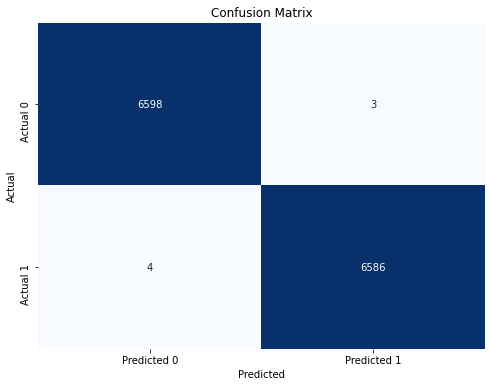

In [163]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(predictions["actual"], predictions["prediction"])

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [164]:
predictions

actual  prediction
0           1           1
2           1           1
8           0           0
9           1           1
22          1           1
...       ...         ...
17799       0           0
17800       1           1
17801       0           0
17802       1           1
17803       1           1

[13191 rows x 2 columns]

In [165]:
full

mp        fg       fga       fg%        3p       3pa       3p%  \
0      0.0  0.456522  0.426471  0.430622  0.379310  0.409091  0.421615   
1      0.0  0.260870  0.308824  0.272727  0.448276  0.439394  0.467933   
2      0.0  0.521739  0.338235  0.595694  0.413793  0.348485  0.527316   
3      0.0  0.391304  0.308824  0.449761  0.482759  0.530303  0.426366   
4      0.0  0.456522  0.558824  0.332536  0.379310  0.500000  0.352732   
...    ...       ...       ...       ...       ...       ...       ...   
17799  0.0  0.478261  0.352941  0.523923  0.551724  0.575758  0.452494   
17800  0.0  0.413043  0.632353  0.239234  0.413793  0.590909  0.331354   
17801  0.0  0.434783  0.411765  0.416268  0.275862  0.378788  0.327791   
17802  0.0  0.391304  0.382353  0.385167  0.827586  0.787879  0.509501   
17803  0.0  0.521739  0.485294  0.461722  0.310345  0.469697  0.305226   

             ft       fta       ft%       orb       drb       trb       ast  \
0      0.069767  0.079365  0.611435  0.379310  0.340909  0.392157  0.255814   
1      0.302326  0.365079  0.513419  0.413793  0.431818  0.490196  0.372093   
2      0.348837  0.380952  0.579930  0.275862  0.590909  0.549020  0.418605   
3      0.372093  0.333333  0.735123  0.310345  0.545455  0.529412  0.325581   
4      0.093023  0.095238  0.666278  0.413793  0.295455  0.372549  0.511628   
...         ...       ...       ...       ...       ...       ...       ...   
17799  0.186047  0.126984  1.000000  0.172414  0.272727  0.215686  0.348837   
17800  0.395349  0.333333  0.787631  0.827586  0.272727  0.588235  0.348837   
17801  0.302326  0.269841  0.740957  0.379310  0.227273  0.294118  0.465116   
17802  0.255814  0.222222  0.766628  0.241379  0.363636  0.333333  0.418605   
17803  0.581395  0.523810  0.725788  0.620690  0.545455  0.705882  0.395349   

            stl   blk       tov        pf       pts       ts%      efg%  \
0      0.500000  0.35  0.413793  0.416667  0.276786  0.394572  0.442043   
1      0.181818  0.20  0.344828  0.305556  0.223214  0.327766  0.347741   
2      0.136364  0.25  0.482759  0.444444  0.446429  0.578288  0.597250   
3      0.363636  0.15  0.758621  0.361111  0.366071  0.521921  0.504912   
4      0.136364  0.25  0.310345  0.250000  0.285714  0.304802  0.349705   
...         ...   ...       ...       ...       ...       ...       ...   
17799  0.318182  0.25  0.379310  0.222222  0.383929  0.582463  0.583497   
17800  0.500000  0.30  0.310345  0.472222  0.375000  0.294363  0.277014   
17801  0.409091  0.25  0.310345  0.416667  0.321429  0.400835  0.398821   
17802  0.409091  0.05  0.448276  0.416667  0.410714  0.553236  0.557957   
17803  0.318182  0.30  0.448276  0.388889  0.508929  0.482255  0.442043   

           3par       ftr      orb%      drb%      trb%      ast%      stl%  \
0      0.468315  0.069270  0.428315  0.365591  0.356757  0.340486  0.552995   
1      0.559505  0.357683  0.413978  0.666667  0.486486  0.758226  0.202765   
2      0.432767  0.363980  0.367384  0.743728  0.683784  0.527897  0.138249   
3      0.673879  0.327456  0.394265  0.732975  0.654054  0.509299  0.359447   
4      0.514683  0.074307  0.405018  0.783154  0.437838  0.733906  0.142857   
...         ...       ...       ...       ...       ...       ...       ...   
17799  0.703246  0.119647  0.263441  0.494624  0.370270  0.464950  0.350230   
17800  0.574961  0.254408  0.661290  0.172043  0.348649  0.525036  0.525346   
17801  0.440495  0.243073  0.419355  0.501792  0.354054  0.686695  0.456221   
17802  0.936631  0.204030  0.284946  0.679211  0.418919  0.663805  0.423963   
17803  0.511592  0.445844  0.672043  0.586022  0.716216  0.494993  0.313364   

           blk%      tov%  usg%      ortg      drtg    fg_max   fga_max  \
0      0.294554  0.425373   0.0  0.392975  0.452250  0.285714  0.428571   
1      0.163366  0.361940   0.0  0.332602  0.442371  0.428571  0.214286   
2      0.193069  0.477612   0.0  0.491767  0.306257  0.238095  0.261905   
3      0.136139  0.7

In [166]:
actual_outcomes = full["won_10_y"]
predicted_outcomes = predictions["prediction"]

# Check the lengths of the arrays
print("Length of date_next:", len(full["date_next"]))
print("Length of actual_outcomes:", len(actual_outcomes))
print("Length of predicted_outcomes:", len(predicted_outcomes))


Length of date_next: 17804
Length of actual_outcomes: 17804
Length of predicted_outcomes: 13191
